<a href="https://www.kaggle.com/code/dataranch/global-temperature-deep-model-dive?scriptVersionId=106682432" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Global Temperatures Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.
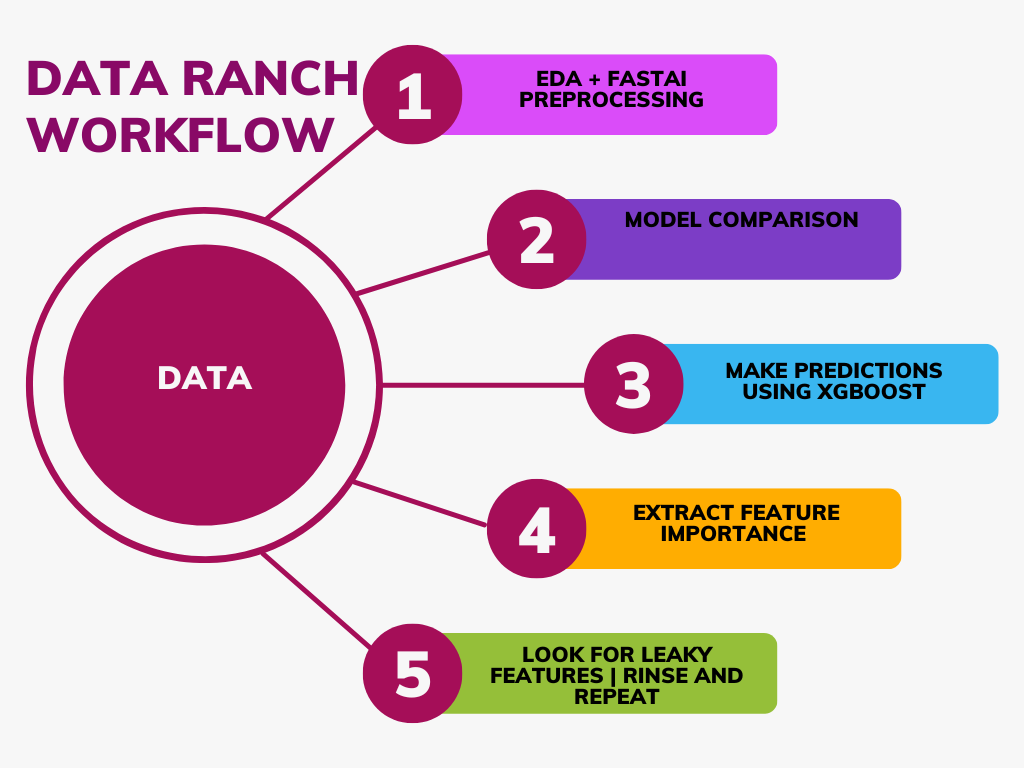

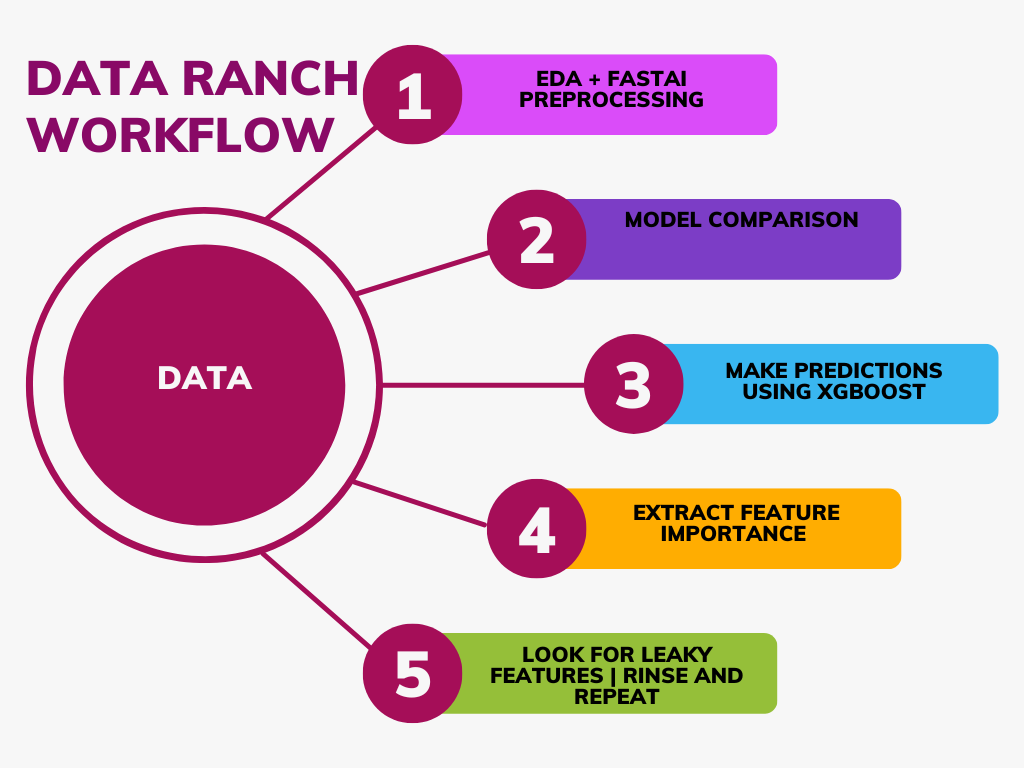

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is in

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.2 MB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'latest-global-temperatures'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/latest-global-temperatures
CSV!


In [9]:
df

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,...,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Troposphere
0,1978,12.00,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29,Lower
1,1979,1.00,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92,Lower
2,1979,2.00,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-2.01,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30,Lower
3,1979,3.00,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.56,-0.47,-0.65,-0.52,-1.25,-0.18,-0.70,-0.39,0.23,Lower
4,1979,4.00,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.84,-0.81,-0.88,-0.26,0.26,-0.51,-0.72,-0.46,-1.12,Lower
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isna().sum()

Year            9
Mo              9
Globe           9
Land            9
Ocean           9
NH              9
Land.1          9
Ocean.1         9
SH              9
Land.2          9
Ocean.2         9
Trpcs           9
Land.3          9
Ocean.3         9
NoExt           9
Land.4          9
Ocean.4         9
SoExt           9
Land.5          9
Ocean.5         9
NoPol           9
Land.6          9
Ocean.6         9
SoPol           9
Land.7          9
Ocean.7         9
USA48           9
USA49           9
AUST           11
Troposphere     9
dtype: int64

<AxesSubplot:>

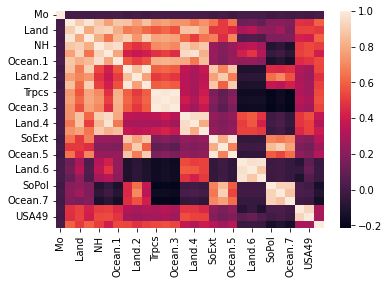

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,Year,Mo,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Troposphere
0,1978,12.00,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,-0.50,-0.60,-0.62,-0.59,-0.37,-0.44,-0.30,-0.46,-0.55,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29,Lower
1,1979,1.00,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,-0.34,-0.47,-0.54,-0.45,-0.73,-0.93,-0.55,-0.23,0.12,-0.29,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92,Lower
2,1979,2.00,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,-0.37,-0.36,-0.25,-0.39,-0.54,-0.67,-0.42,-0.41,-0.69,-0.36,-2.01,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30,Lower
3,1979,3.00,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,-0.26,-0.36,-0.43,-0.34,-0.53,-0.53,-0.52,-0.26,-0.59,-0.21,-0.56,-0.47,-0.65,-0.52,-1.25,-0.18,-0.70,-0.39,0.23,Lower
4,1979,4.00,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,-0.31,-0.35,-0.37,-0.34,-0.54,-0.72,-0.38,-0.33,-0.43,-0.31,-0.84,-0.81,-0.88,-0.26,0.26,-0.51,-0.72,-0.46,-1.12,Lower


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
Mo,2096.00,6.48,3.45,1.00,3.00,6.00,9.00,12.00
Globe,2096.00,0.01,0.31,-0.74,-0.19,-0.02,0.13,1.83
Land,2096.00,0.01,0.37,-1.02,-0.22,-0.02,0.19,1.88
Ocean,2096.00,0.01,0.31,-0.73,-0.18,-0.03,0.15,1.86
NH,2096.00,0.01,0.36,-1.46,-0.21,-0.01,0.19,1.97
Land.1,2096.00,0.01,0.42,-1.27,-0.26,-0.02,0.22,2.14
Ocean.1,2096.00,0.01,0.36,-1.62,-0.22,-0.02,0.19,2.12
SH,2096.00,0.01,0.35,-1.05,-0.20,-0.03,0.15,2.10
Land.2,2096.00,0.01,0.48,-2.24,-0.27,-0.03,0.22,2.70
Ocean.2,2096.00,0.01,0.34,-1.04,-0.19,-0.03,0.15,2.12


In [14]:
df.columns

Index(['Year', 'Mo', 'Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH',
       'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4',
       'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6',
       'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST', 'Troposphere'],
      dtype='object')

Target Variable: AUST
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.68it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.5199126661652493, 'Adjusted R-Squared': 0.48412209371998516, 'RMSE': 0.4428392266228922, 'Time taken': 0.37244582176208496}


 10%|▉         | 4/42 [00:00<00:05,  6.47it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6021750962322853, 'Adjusted R-Squared': 0.5725171985220958, 'RMSE': 0.403117769903608, 'Time taken': 0.2671396732330322}
{'Model': 'BayesianRidge', 'R-Squared': 0.765660096513101, 'Adjusted R-Squared': 0.7481900265873425, 'RMSE': 0.30939200218202706, 'Time taken': 0.0318293571472168}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.4106129061366024, 'Adjusted R-Squared': 0.36667402253239023, 'RMSE': 0.49066634480880855, 'Time taken': 0.08906364440917969}
{'Model': 'DummyRegressor', 'R-Squared': -0.00030419027732975223, 'Adjusted R-Squared': -0.07487699623630806, 'RMSE': 0.63922244, 'Time taken': 0.01807403564453125}
{'Model': 'ElasticNet', 'R-Squared': -0.00030419027732975223, 'Adjusted R-Squared': -0.07487699623630806, 'RMSE': 0.63922244, 'Time taken': 0.019937992095947266}


 17%|█▋        | 7/42 [00:01<00:05,  6.77it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.759419743671596, 'Adjusted R-Squared': 0.7414844546394014, 'RMSE': 0.3134844, 'Time taken': 0.38828349113464355}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.26083630207098085, 'Adjusted R-Squared': 0.20573155338218507, 'RMSE': 0.549485547741711, 'Time taken': 0.041734933853149414}


 21%|██▏       | 9/42 [00:02<00:09,  3.35it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.6233388159563231, 'Adjusted R-Squared': 0.595258676271833, 'RMSE': 0.39224859190393674, 'Time taken': 1.1006224155426025}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:08,  3.65it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.2226072508042638, 'Adjusted R-Squared': 0.1646525214297745, 'RMSE': 0.5635159362179558, 'Time taken': 0.43370771408081055}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4802136236784794, 'Adjusted R-Squared': 0.44146348251312184, 'RMSE': 0.4607850772269198, 'Time taken': 0.05947399139404297}


 31%|███       | 13/42 [00:03<00:09,  2.92it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6620475258590736, 'Adjusted R-Squared': 0.6368531254732461, 'RMSE': 0.3715470134321151, 'Time taken': 0.9072263240814209}


 33%|███▎      | 14/42 [00:04<00:11,  2.48it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6820342728581872, 'Adjusted R-Squared': 0.6583298870301344, 'RMSE': 0.36039280748832525, 'Time taken': 0.6645617485046387}


 38%|███▊      | 16/42 [00:04<00:08,  3.25it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.7631920825232897, 'Adjusted R-Squared': 0.7455380218373653, 'RMSE': 0.31101695769300747, 'Time taken': 0.22661685943603516}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.4722149061471307, 'Adjusted R-Squared': 0.4328684595616983, 'RMSE': 0.46431693, 'Time taken': 0.11460232734680176}


 45%|████▌     | 19/42 [00:05<00:04,  5.27it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.7646872166602328, 'Adjusted R-Squared': 0.7471446184163941, 'RMSE': 0.3100336, 'Time taken': 0.13747072219848633}
{'Model': 'Lars', 'R-Squared': -1635.0401791651097, 'Adjusted R-Squared': -1757.0071848098094, 'RMSE': 25.851333011520286, 'Time taken': 0.04161834716796875}
{'Model': 'LarsCV', 'R-Squared': 0.42090845652126785, 'Adjusted R-Squared': 0.3777371075215681, 'RMSE': 0.48636192762663405, 'Time taken': 0.11590266227722168}
{'Model': 'Lasso', 'R-Squared': -0.00030419027732975223, 'Adjusted R-Squared': -0.07487699623630806, 'RMSE': 0.63922244, 'Time taken': 0.02199101448059082}


 50%|█████     | 21/42 [00:05<00:03,  5.30it/s]

{'Model': 'LassoCV', 'R-Squared': 0.7632294462612741, 'Adjusted R-Squared': 0.745578171046819, 'RMSE': 0.31099242, 'Time taken': 0.3469705581665039}
{'Model': 'LassoLars', 'R-Squared': -0.0003041866204072097, 'Adjusted R-Squared': -0.07487699230676137, 'RMSE': 0.6392224256948591, 'Time taken': 0.025697708129882812}


 55%|█████▍    | 23/42 [00:05<00:03,  6.05it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7616719933643902, 'Adjusted R-Squared': 0.7439046098362856, 'RMSE': 0.3120135823902471, 'Time taken': 0.21254444122314453}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7616719933643902, 'Adjusted R-Squared': 0.7439046098362856, 'RMSE': 0.3120135823902471, 'Time taken': 0.030144691467285156}
{'Model': 'LinearRegression', 'R-Squared': 0.7677508968799045, 'Adjusted R-Squared': 0.7504366963902316, 'RMSE': 0.3080087, 'Time taken': 0.016789674758911133}


 62%|██████▏   | 26/42 [00:05<00:02,  7.37it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.7612621400000177, 'Adjusted R-Squared': 0.7434642018509188, 'RMSE': 0.3122817524779281, 'Time taken': 0.23749208450317383}


 64%|██████▍   | 27/42 [00:07<00:06,  2.34it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.7457226041036303, 'Adjusted R-Squared': 0.7267661915560861, 'RMSE': 0.32228481029745687, 'Time taken': 1.861149787902832}


 67%|██████▋   | 28/42 [00:08<00:05,  2.38it/s]

{'Model': 'NuSVR', 'R-Squared': 0.6459411737083804, 'Adjusted R-Squared': 0.6195460426994936, 'RMSE': 0.38029767670823145, 'Time taken': 0.38989734649658203}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.43062351201408644, 'Adjusted R-Squared': 0.388176421650098, 'RMSE': 0.4822649775042975, 'Time taken': 0.016335248947143555}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.763216596947377, 'Adjusted R-Squared': 0.7455643638149192, 'RMSE': 0.31100085899366764, 'Time taken': 0.037300825119018555}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5441435442577434, 'Adjusted R-Squared': 0.5101593868887834, 'RMSE': 0.4315190911051372, 'Time taken': 0.024820327758789062}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [00:08<00:01,  4.75it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.3988322161428829, 'Adjusted R-Squared': 0.3540150805854114, 'RMSE': 0.49554583, 'Time taken': 0.20110011100769043}


 81%|████████  | 34/42 [00:11<00:04,  1.76it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6331443768117433, 'Adjusted R-Squared': 0.6057952429493797, 'RMSE': 0.38710925073826924, 'Time taken': 2.730079412460327}
{'Model': 'Ridge', 'R-Squared': 0.7647837167795137, 'Adjusted R-Squared': 0.7472483126319711, 'RMSE': 0.30997, 'Time taken': 0.023783206939697266}
{'Model': 'RidgeCV', 'R-Squared': 0.7647845095245888, 'Adjusted R-Squared': 0.7472491644762933, 'RMSE': 0.30996946899823835, 'Time taken': 0.02321171760559082}
{'Model': 'SGDRegressor', 'R-Squared': 0.7192265458925355, 'Adjusted R-Squared': 0.6982948487996912, 'RMSE': 0.3386600607702746, 'Time taken': 0.027559518814086914}


 90%|█████████ | 38/42 [00:11<00:01,  2.82it/s]

{'Model': 'SVR', 'R-Squared': 0.64851113142147, 'Adjusted R-Squared': 0.6223075910904228, 'RMSE': 0.37891495598831754, 'Time taken': 0.29125380516052246}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7677508968799045, 'Adjusted R-Squared': 0.7504366963902316, 'RMSE': 0.3080087, 'Time taken': 0.016755342483520508}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4802136236784794, 'Adjusted R-Squared': 0.44146348251312184, 'RMSE': 0.4607850772269198, 'Time taken': 0.027669668197631836}


 98%|█████████▊| 41/42 [00:12<00:00,  3.28it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.652147018050608, 'Adjusted R-Squared': 0.6262145335351007, 'RMSE': 0.37695006, 'Time taken': 0.5555598735809326}


100%|██████████| 42/42 [00:12<00:00,  3.34it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.676314639185678, 'Adjusted R-Squared': 0.6521838539321682, 'RMSE': 0.3636197707582793, 'Time taken': 0.3414316177368164}
Project: latest-global-temperatures
latest-global-temperatures
Target: AUST
AUST
Target Standard Deviation: 0.6093681454658508
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearRegression                             0.75       0.77  0.31        0.02
TransformedTargetRegressor                   0.75       0.77  0.31        0.02
BayesianRidge                                0.75       0.77  0.31        0.03
RidgeCV                                      0.75       0.76  0.31        0.02
Ridge                                        0.75       0.76  0.31        0.02
KernelRidge                                  0.75       0.76  0.31        0.14
LassoCV                                      0.75       0.76  0.31        0.35

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.196360,1.874327,1.369061,00:01
1,2.673831,0.919745,0.959034,00:01
2,1.671222,0.450407,0.671124,00:01
3,1.092262,0.382123,0.618161,00:01
4,0.755520,0.349504,0.591188,00:01
5,0.581123,0.323149,0.568462,00:01
6,0.469478,0.288130,0.536777,00:01
7,0.389778,0.300738,0.548396,00:01


Better model found at epoch 0 with _rmse value: 1.369060754776001.
Better model found at epoch 1 with _rmse value: 0.9590335488319397.
Better model found at epoch 2 with _rmse value: 0.6711240410804749.
Better model found at epoch 3 with _rmse value: 0.6181612014770508.
Better model found at epoch 4 with _rmse value: 0.591188371181488.
Better model found at epoch 5 with _rmse value: 0.5684616565704346.
Better model found at epoch 6 with _rmse value: 0.5367770791053772.
No improvement since epoch 6: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,AUST_pred
0,37.00,12.00,2.00,-0.04,-0.43,0.18,-0.67,-1.08,-0.32,0.64,1.00,0.51,0.11,0.05,0.12,-0.98,-1.26,-0.59,0.73,1.23,0.53,-0.08,-0.22,0.04,0.98,1.17,0.91,-0.17,-0.49,-0.02,0.27
1,40.00,2.00,4.00,-0.01,0.33,-0.17,0.10,0.46,-0.18,-0.15,-0.08,-0.15,-0.42,-0.12,-0.50,0.38,0.54,0.20,0.06,0.00,0.08,-0.41,-0.22,-0.56,0.10,0.08,0.11,0.32,0.55,-0.11,-0.04
2,41.00,5.00,4.00,1.04,0.84,1.07,0.93,0.58,1.11,0.89,1.00,0.80,1.05,0.86,1.09,0.67,0.39,0.87,0.46,0.76,0.34,0.36,0.30,0.39,0.47,0.59,0.41,-0.66,-0.30,1.03,0.27
3,16.00,12.00,4.00,-0.48,-0.37,-0.52,-0.56,-0.60,-0.45,-0.32,0.26,-0.47,-0.48,-0.62,-0.44,-0.45,-0.47,-0.36,-0.12,0.53,-0.30,-0.69,-0.72,-0.63,1.02,1.31,0.88,0.99,0.63,-1.14,-0.02
4,6.00,12.00,4.00,-0.10,0.17,-0.24,-0.12,0.05,-0.23,-0.09,0.32,-0.21,-0.44,-0.22,-0.50,0.07,0.11,0.03,0.17,0.46,0.08,0.18,0.25,0.11,0.33,0.49,0.23,0.09,-0.01,0.36,0.00
5,13.00,5.00,2.00,-0.17,-0.24,-0.11,-0.15,-0.36,0.04,-0.15,0.11,-0.21,0.11,0.20,0.08,-0.28,-0.51,-0.02,-0.21,0.14,-0.30,-0.06,-0.28,0.14,0.15,0.40,-0.03,-0.16,-0.12,0.63,0.01
6,28.00,5.00,2.00,0.21,0.06,0.27,0.38,0.08,0.56,0.02,0.03,0.02,0.13,0.28,0.08,0.41,-0.04,0.80,-0.03,-0.03,-0.01,0.08,0.00,0.15,-0.52,-0.51,-0.58,0.11,-0.12,0.76,0.01
7,20.00,10.00,3.00,-0.04,-0.53,0.18,0.54,0.12,0.78,-0.62,-1.56,-0.33,0.78,0.78,0.78,0.16,-0.08,0.40,-1.11,-2.12,-0.72,-0.25,-0.44,-0.06,-2.01,-2.41,-1.89,0.61,0.26,-0.13,0.05
8,34.00,6.00,5.00,-0.89,-0.86,-0.84,-0.83,-0.92,-0.70,-0.74,-0.38,-0.79,-0.67,-0.78,-0.63,-0.69,-0.79,-0.54,-0.53,-0.11,-0.63,-0.11,-0.11,-0.10,0.14,0.18,0.11,-0.09,-0.09,-0.15,-0.09


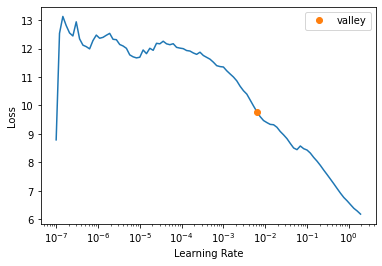

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.08      -0.08
1    0.19       0.20
2   -0.29      -0.15
3    0.00       0.22
4    0.52       0.21
XGBoost RMSE:  0.37700877


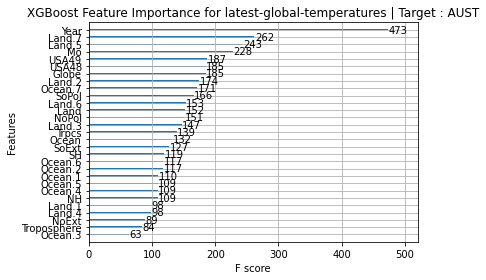

Target Variable: USA49
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.70it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8198757095890528, 'Adjusted R-Squared': 0.8064474205866943, 'RMSE': 0.31004490359590947, 'Time taken': 0.3699371814727783}


 10%|▉         | 4/42 [00:00<00:05,  6.90it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8374538492110887, 'Adjusted R-Squared': 0.8253360127769539, 'RMSE': 0.2945281437397908, 'Time taken': 0.2525327205657959}
{'Model': 'BayesianRidge', 'R-Squared': 0.5727074220130318, 'Adjusted R-Squared': 0.5408527054021781, 'RMSE': 0.4775305162831807, 'Time taken': 0.019018173217773438}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.768678352232819, 'Adjusted R-Squared': 0.7514332936589161, 'RMSE': 0.35135536884873825, 'Time taken': 0.08326888084411621}
{'Model': 'DummyRegressor', 'R-Squared': -0.00014730085942393778, 'Adjusted R-Squared': -0.07470841069213163, 'RMSE': 0.7305845, 'Time taken': 0.018820762634277344}
{'Model': 'ElasticNet', 'R-Squared': 0.22526647145138357, 'Adjusted R-Squared': 0.1675099873179392, 'RMSE': 0.64300543, 'Time taken': 0.02072453498840332}


 17%|█▋        | 7/42 [00:01<00:04,  8.49it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6023632120238749, 'Adjusted R-Squared': 0.5727193383701278, 'RMSE': 0.4606613, 'Time taken': 0.2520177364349365}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7507059752775287, 'Adjusted R-Squared': 0.7321210736915347, 'RMSE': 0.36474923528905484, 'Time taken': 0.03840065002441406}


 21%|██▏       | 9/42 [00:02<00:08,  3.68it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8492420685774292, 'Adjusted R-Squared': 0.8380030454122505, 'RMSE': 0.2836472258420374, 'Time taken': 1.065535545349121}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.06it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.22490545203301915, 'Adjusted R-Squared': 0.16712205385553214, 'RMSE': 0.6431552165950186, 'Time taken': 0.38208842277526855}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6594302770015054, 'Adjusted R-Squared': 0.6340407603769389, 'RMSE': 0.4263256604752551, 'Time taken': 0.028020858764648438}


 31%|███       | 13/42 [00:03<00:09,  3.14it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8384162785886934, 'Adjusted R-Squared': 0.8263701913883646, 'RMSE': 0.2936549044285538, 'Time taken': 0.9064857959747314}


 33%|███▎      | 14/42 [00:04<00:11,  2.36it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.8509894834664403, 'Adjusted R-Squared': 0.8398807303058408, 'RMSE': 0.28199857619292723, 'Time taken': 0.8780653476715088}


 38%|███▊      | 16/42 [00:04<00:08,  3.16it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.6305668031857861, 'Adjusted R-Squared': 0.6030255108782997, 'RMSE': 0.44402396897102475, 'Time taken': 0.20914149284362793}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5863800649519002, 'Adjusted R-Squared': 0.5555446456295483, 'RMSE': 0.46982834, 'Time taken': 0.10887360572814941}


 45%|████▌     | 19/42 [00:05<00:04,  4.98it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.5738233911095392, 'Adjusted R-Squared': 0.5420518701382708, 'RMSE': 0.4769065, 'Time taken': 0.17171597480773926}
{'Model': 'Lars', 'R-Squared': -18.545709454192625, 'Adjusted R-Squared': -20.00284460630467, 'RMSE': 3.229714808996095, 'Time taken': 0.04865765571594238}
{'Model': 'LarsCV', 'R-Squared': 0.8111556048531674, 'Adjusted R-Squared': 0.7970772309219125, 'RMSE': 0.3174610916323354, 'Time taken': 0.1256716251373291}
{'Model': 'Lasso', 'R-Squared': -0.00014730085942393778, 'Adjusted R-Squared': -0.07470841069213163, 'RMSE': 0.7305845, 'Time taken': 0.03236556053161621}


 50%|█████     | 21/42 [00:05<00:03,  5.65it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5947545771111051, 'Adjusted R-Squared': 0.5645434787466375, 'RMSE': 0.46504772, 'Time taken': 0.23929476737976074}
{'Model': 'LassoLars', 'R-Squared': -0.0001473005720842302, 'Adjusted R-Squared': -0.07470841038337062, 'RMSE': 0.7305844748037329, 'Time taken': 0.02634406089782715}


 60%|█████▉    | 25/42 [00:05<00:02,  8.11it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5646902845887385, 'Adjusted R-Squared': 0.5322378893524233, 'RMSE': 0.481989564525153, 'Time taken': 0.1954646110534668}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6047367440260093, 'Adjusted R-Squared': 0.5752698174881026, 'RMSE': 0.4592843819472854, 'Time taken': 0.0897378921508789}
{'Model': 'LinearRegression', 'R-Squared': 0.5354314878569385, 'Adjusted R-Squared': 0.5007978455634969, 'RMSE': 0.49792433, 'Time taken': 0.02866840362548828}
{'Model': 'LinearSVR', 'R-Squared': 0.6765115954181355, 'Adjusted R-Squared': 0.6523954932770711, 'RMSE': 0.415496925472806, 'Time taken': 0.25908875465393066}


 64%|██████▍   | 27/42 [00:07<00:06,  2.27it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.5920947206402604, 'Adjusted R-Squared': 0.5616853296340073, 'RMSE': 0.46657140519161655, 'Time taken': 1.9618141651153564}


 67%|██████▋   | 28/42 [00:08<00:06,  2.29it/s]

{'Model': 'NuSVR', 'R-Squared': 0.801169291753586, 'Adjusted R-Squared': 0.7863464368971695, 'RMSE': 0.3257468203755096, 'Time taken': 0.4180777072906494}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.802543559969831, 'Adjusted R-Squared': 0.7878231569855767, 'RMSE': 0.3246191280658717, 'Time taken': 0.016077518463134766}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7949956700430291, 'Adjusted R-Squared': 0.7797125708945659, 'RMSE': 0.3307653230726754, 'Time taken': 0.03838300704956055}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6599174064518798, 'Adjusted R-Squared': 0.6345642053904519, 'RMSE': 0.42602065670454176, 'Time taken': 0.027467966079711914}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [00:08<00:01,  4.53it/s]

{'Model': 'RANSACRegressor', 'R-Squared': -0.19630226749500723, 'Adjusted R-Squared': -0.2854867553031182, 'RMSE': 0.7990224, 'Time taken': 0.19675731658935547}


 81%|████████  | 34/42 [00:11<00:04,  1.77it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8484073126348675, 'Adjusted R-Squared': 0.8371060583068756, 'RMSE': 0.28443142786813613, 'Time taken': 2.675348997116089}
{'Model': 'Ridge', 'R-Squared': 0.5738321083041453, 'Adjusted R-Squared': 0.5420612372008554, 'RMSE': 0.47690165, 'Time taken': 0.014800071716308594}
{'Model': 'RidgeCV', 'R-Squared': 0.56384643246873, 'Adjusted R-Squared': 0.531331127948404, 'RMSE': 0.4824565090714937, 'Time taken': 0.0234067440032959}
{'Model': 'SGDRegressor', 'R-Squared': 0.7387668446480266, 'Adjusted R-Squared': 0.7192918793390106, 'RMSE': 0.3733813344945445, 'Time taken': 0.025484323501586914}


 90%|█████████ | 38/42 [00:11<00:01,  2.85it/s]

{'Model': 'SVR', 'R-Squared': 0.7995126635630015, 'Adjusted R-Squared': 0.7845663068620428, 'RMSE': 0.32710104270804513, 'Time taken': 0.2674539089202881}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5354314878569385, 'Adjusted R-Squared': 0.5007978455634969, 'RMSE': 0.49792433, 'Time taken': 0.016424179077148438}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6594302770015054, 'Adjusted R-Squared': 0.6340407603769389, 'RMSE': 0.4263256604752551, 'Time taken': 0.027910232543945312}


 98%|█████████▊| 41/42 [00:12<00:00,  3.29it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.8386141647331322, 'Adjusted R-Squared': 0.8265828299703066, 'RMSE': 0.29347503, 'Time taken': 0.5690159797668457}


100%|██████████| 42/42 [00:12<00:00,  3.34it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.849160153332299, 'Adjusted R-Squared': 0.8379150233750667, 'RMSE': 0.28372427610549317, 'Time taken': 0.36979031562805176}
Project: latest-global-temperatures
latest-global-temperatures
Target: USA49
USA49
Target Standard Deviation: 0.6913952827453613
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.84       0.85  0.28        0.88
ExtraTreesRegressor                          0.84       0.85  0.28        1.07
LGBMRegressor                                0.84       0.85  0.28        0.37
RandomForestRegressor                        0.84       0.85  0.28        2.68
XGBRegressor                                 0.83       0.84  0.29        0.57
GradientBoostingRegressor                    0.83       0.84  0.29        0.91
BaggingRegressor                             0.83       0.84  0.29        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,18.881275,7.815072,2.795545,00:01
1,9.454669,1.806338,1.344001,00:01
2,5.160099,1.362448,1.167240,00:01
3,3.100364,0.563840,0.750893,00:01
4,1.979681,0.383608,0.619361,00:01
5,1.321188,0.614865,0.784133,00:01


Better model found at epoch 0 with _rmse value: 2.7955451011657715.
Better model found at epoch 1 with _rmse value: 1.3440006971359253.
Better model found at epoch 2 with _rmse value: 1.1672395467758179.
Better model found at epoch 3 with _rmse value: 0.7508928775787354.
Better model found at epoch 4 with _rmse value: 0.6193608641624451.
No improvement since epoch 4: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,AUST,USA49,USA49_pred
0,38.00,13.00,4.00,0.06,0.30,-0.04,-0.21,-0.28,-0.14,0.33,1.24,0.04,-0.06,0.01,-0.08,-0.25,-0.28,-0.15,0.43,1.40,0.10,-0.30,-0.10,-0.46,0.94,1.25,0.79,-1.05,0.02,-0.56,-0.08
1,19.00,13.00,5.00,0.39,0.13,0.48,-0.40,-0.47,-0.30,1.10,1.28,0.98,0.26,0.14,0.29,-0.68,-0.56,-0.74,1.17,1.36,1.02,-1.07,-1.21,-0.92,1.26,1.25,1.34,0.43,0.15,-0.35,0.01
2,26.00,10.00,5.00,-0.55,-0.30,-0.63,-0.15,-0.11,-0.17,-0.81,-0.55,-0.86,-0.25,-0.24,-0.25,-0.03,-0.05,0.03,-0.88,-0.54,-0.92,0.11,0.09,0.12,-0.79,-0.68,-0.94,-0.21,-0.32,-0.04,-0.13
3,47.00,3.00,3.00,0.10,-0.73,0.51,-1.31,-1.92,-0.72,1.53,1.88,1.36,2.94,2.94,2.91,-3.49,-2.94,-3.71,0.16,0.71,-0.02,-6.30,-14.53,-0.05,-0.16,-0.11,-0.52,-2.25,-0.01,1.43,0.32
4,45.00,2.00,3.00,0.52,0.43,0.54,0.24,0.66,-0.11,0.70,-0.17,0.89,-0.08,-0.24,-0.02,0.31,0.76,-0.22,0.93,-0.00,1.13,-2.11,-1.84,-2.27,0.01,-0.08,0.07,2.18,0.32,1.52,0.18
5,39.00,4.00,2.00,-0.13,-0.22,-0.08,0.07,0.20,-0.06,-0.27,-0.94,-0.04,-0.29,-0.28,-0.29,0.21,0.29,0.10,-0.11,-0.93,0.14,0.39,0.43,0.35,-0.24,-0.43,-0.13,-0.74,-0.80,-0.29,-0.20
6,21.00,10.00,3.00,-0.93,-0.30,-1.14,-1.01,-0.23,-1.49,-0.61,-0.28,-0.66,-1.82,-1.73,-1.82,-0.15,0.23,-0.54,0.23,0.50,0.12,-0.35,-0.08,-0.57,0.54,0.65,0.48,0.85,-0.87,0.50,0.17
7,37.00,13.00,5.00,0.29,-0.16,0.48,-0.95,-1.17,-0.69,1.47,1.86,1.30,-0.08,-0.05,-0.08,-1.19,-1.30,-0.97,1.81,2.21,1.56,0.03,-0.09,0.13,2.11,2.35,2.10,-0.71,-0.58,-0.17,-0.05
8,42.00,9.00,5.00,0.29,-0.11,0.48,-0.04,-0.09,-0.00,0.59,-0.09,0.75,-0.08,-0.03,-0.08,-0.00,-0.07,0.05,0.75,-0.10,0.95,0.00,-0.04,0.03,0.50,0.04,0.84,-0.08,-0.42,-0.02,-0.02


<Figure size 432x288 with 0 Axes>

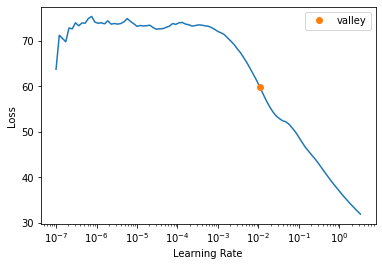

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.11       0.16
1   -0.04      -0.03
2    0.03       0.07
3    1.42       1.22
4    0.20       0.04
XGBoost RMSE:  0.29355872


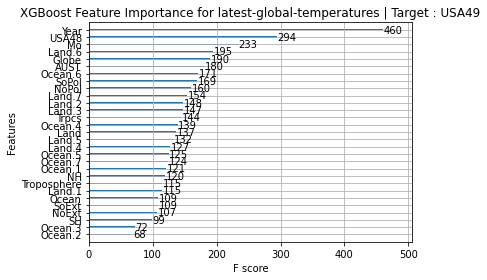

Target Variable: USA48
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:14,  2.88it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8550969025643638, 'Adjusted R-Squared': 0.8442943580254603, 'RMSE': 0.27526734283318643, 'Time taken': 0.34710049629211426}


 10%|▉         | 4/42 [00:00<00:05,  6.50it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.901749713024119, 'Adjusted R-Squared': 0.8944251415014954, 'RMSE': 0.22666411549352147, 'Time taken': 0.24118900299072266}
{'Model': 'BayesianRidge', 'R-Squared': 0.9131306219019064, 'Adjusted R-Squared': 0.9066544985989637, 'RMSE': 0.21313227089218156, 'Time taken': 0.03213024139404297}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.821516668429363, 'Adjusted R-Squared': 0.8082107131194698, 'RMSE': 0.3055024433966961, 'Time taken': 0.11771321296691895}
{'Model': 'DummyRegressor', 'R-Squared': -0.0010454705380635865, 'Adjusted R-Squared': -0.0756735390357599, 'RMSE': 0.72350705, 'Time taken': 0.01696944236755371}
{'Model': 'ElasticNet', 'R-Squared': 0.25057744280985705, 'Adjusted R-Squared': 0.1947078948445251, 'RMSE': 0.6260071, 'Time taken': 0.014020681381225586}


 17%|█▋        | 7/42 [00:01<00:04,  8.19it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8965284138627716, 'Adjusted R-Squared': 0.8888145938165515, 'RMSE': 0.23260894, 'Time taken': 0.262770414352417}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.8047285717316603, 'Adjusted R-Squared': 0.7901710616551003, 'RMSE': 0.3195473405986089, 'Time taken': 0.03757953643798828}


 21%|██▏       | 9/42 [00:02<00:09,  3.67it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9099988809044317, 'Adjusted R-Squared': 0.9032892859075898, 'RMSE': 0.21694008746273377, 'Time taken': 1.055079698562622}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.04it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.31505525397522227, 'Adjusted R-Squared': 0.2639925351199047, 'RMSE': 0.5984717093289099, 'Time taken': 0.3858981132507324}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6922829166600274, 'Adjusted R-Squared': 0.6693425685447081, 'RMSE': 0.40113601871425936, 'Time taken': 0.027797698974609375}


 31%|███       | 13/42 [00:03<00:09,  3.14it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8959938777342955, 'Adjusted R-Squared': 0.888240207950991, 'RMSE': 0.23320900091276459, 'Time taken': 0.9021060466766357}


 33%|███▎      | 14/42 [00:04<00:10,  2.66it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9027970209146587, 'Adjusted R-Squared': 0.8955505263298904, 'RMSE': 0.225452805426578, 'Time taken': 0.6225030422210693}


 36%|███▌      | 15/42 [00:04<00:09,  2.88it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9160817599966672, 'Adjusted R-Squared': 0.9098256444180126, 'RMSE': 0.20948071114784408, 'Time taken': 0.24112176895141602}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6483780670577963, 'Adjusted R-Squared': 0.6221646067613338, 'RMSE': 0.42879906, 'Time taken': 0.07064127922058105}


 45%|████▌     | 19/42 [00:04<00:04,  5.06it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9055389058508727, 'Adjusted R-Squared': 0.8984968191405265, 'RMSE': 0.22225028, 'Time taken': 0.15085387229919434}
{'Model': 'Lars', 'R-Squared': -119.63535287957886, 'Adjusted R-Squared': -128.62873394258088, 'RMSE': 7.942425605170441, 'Time taken': 0.04266023635864258}
{'Model': 'LarsCV', 'R-Squared': 0.8596202931885464, 'Adjusted R-Squared': 0.8491549680020885, 'RMSE': 0.27093681530417807, 'Time taken': 0.12404513359069824}
{'Model': 'Lasso', 'R-Squared': -0.0010454705380635865, 'Adjusted R-Squared': -0.0756735390357599, 'RMSE': 0.72350705, 'Time taken': 0.026523828506469727}


 50%|█████     | 21/42 [00:04<00:03,  5.69it/s]

{'Model': 'LassoCV', 'R-Squared': 0.8945212033240344, 'Adjusted R-Squared': 0.8866577454741552, 'RMSE': 0.23485425, 'Time taken': 0.23371267318725586}
{'Model': 'LassoLars', 'R-Squared': -0.0010454744018693063, 'Adjusted R-Squared': -0.07567354318761277, 'RMSE': 0.723507036802487, 'Time taken': 0.01886463165283203}


 60%|█████▉    | 25/42 [00:05<00:02,  7.02it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8930970259875134, 'Adjusted R-Squared': 0.8851273955341403, 'RMSE': 0.23643444646181286, 'Time taken': 0.3877217769622803}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9140356024933669, 'Adjusted R-Squared': 0.907626945609839, 'RMSE': 0.21201918852416649, 'Time taken': 0.05873918533325195}
{'Model': 'LinearRegression', 'R-Squared': 0.9126345380912393, 'Adjusted R-Squared': 0.9061214316764473, 'RMSE': 0.21373996, 'Time taken': 0.04050278663635254}
{'Model': 'LinearSVR', 'R-Squared': 0.9162009271801786, 'Adjusted R-Squared': 0.909953695530372, 'RMSE': 0.20933192290565814, 'Time taken': 0.3628358840942383}


 64%|██████▍   | 27/42 [00:07<00:07,  2.11it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9173304234605542, 'Adjusted R-Squared': 0.9111673959036288, 'RMSE': 0.20791638359486514, 'Time taken': 2.056297779083252}


 67%|██████▋   | 28/42 [00:08<00:06,  2.14it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8299312971043209, 'Adjusted R-Squared': 0.8172526534437176, 'RMSE': 0.2982140190598121, 'Time taken': 0.4345858097076416}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8988168670273898, 'Adjusted R-Squared': 0.8912736514587376, 'RMSE': 0.23002228713579814, 'Time taken': 0.015870332717895508}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8988168670273898, 'Adjusted R-Squared': 0.8912736514587376, 'RMSE': 0.23002228713579814, 'Time taken': 0.036360979080200195}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7746483572012216, 'Adjusted R-Squared': 0.7578483632650659, 'RMSE': 0.34327819686446764, 'Time taken': 0.029059886932373047}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [00:08<00:02,  4.20it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8245167698605723, 'Adjusted R-Squared': 0.8114344724979929, 'RMSE': 0.30292398, 'Time taken': 0.2103879451751709}


 81%|████████  | 34/42 [00:11<00:04,  1.88it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9072965651758425, 'Adjusted R-Squared': 0.9003855121940929, 'RMSE': 0.2201728524817054, 'Time taken': 2.3408665657043457}
{'Model': 'Ridge', 'R-Squared': 0.9061216263841344, 'Adjusted R-Squared': 0.8991229815644426, 'RMSE': 0.22156371, 'Time taken': 0.015822172164916992}
{'Model': 'RidgeCV', 'R-Squared': 0.9044306128457845, 'Adjusted R-Squared': 0.8973059027494549, 'RMSE': 0.223550299811087, 'Time taken': 0.023340702056884766}
{'Model': 'SGDRegressor', 'R-Squared': 0.9020262100461692, 'Adjusted R-Squared': 0.8947222514120791, 'RMSE': 0.22634495048115813, 'Time taken': 0.024070262908935547}


 90%|█████████ | 38/42 [00:11<00:01,  3.01it/s]

{'Model': 'SVR', 'R-Squared': 0.8283595590173101, 'Adjusted R-Squared': 0.8155637420802972, 'RMSE': 0.2995888645200189, 'Time taken': 0.26848387718200684}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9126345380912393, 'Adjusted R-Squared': 0.9061214316764473, 'RMSE': 0.21373996, 'Time taken': 0.016742706298828125}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6922829166600274, 'Adjusted R-Squared': 0.6693425685447081, 'RMSE': 0.40113601871425936, 'Time taken': 0.026670217514038086}


 98%|█████████▊| 41/42 [00:11<00:00,  3.44it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.907994889147601, 'Adjusted R-Squared': 0.9011358963077049, 'RMSE': 0.21934201, 'Time taken': 0.5625946521759033}


100%|██████████| 42/42 [00:12<00:00,  3.41it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9041901968405249, 'Adjusted R-Squared': 0.8970475637001013, 'RMSE': 0.22383130669830872, 'Time taken': 0.35651063919067383}
Project: latest-global-temperatures
latest-global-temperatures
Target: USA48
USA48
Target Standard Deviation: 0.7187826633453369
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
MLPRegressor                                 0.91       0.92  0.21        2.06
LinearSVR                                    0.91       0.92  0.21        0.36
HuberRegressor                               0.91       0.92  0.21        0.24
LassoLarsIC                                  0.91       0.91  0.21        0.06
BayesianRidge                                0.91       0.91  0.21        0.03
LinearRegression                             0.91       0.91  0.21        0.04
TransformedTargetRegressor                   0.91       0.91  0.21       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.135733,0.903711,0.950637,00:01
1,2.107713,0.582830,0.763433,00:01
2,1.335146,0.454937,0.674490,00:01
3,0.916847,0.380110,0.616531,00:01
4,0.644594,0.200092,0.447317,00:01
5,0.494997,0.134078,0.366167,00:01
6,0.385228,0.096717,0.310994,00:01
7,0.288729,0.082739,0.287643,00:01
8,0.229027,0.078194,0.279632,00:01
9,0.187789,0.095638,0.309253,00:01


Better model found at epoch 0 with _rmse value: 0.9506372809410095.
Better model found at epoch 1 with _rmse value: 0.7634330987930298.
Better model found at epoch 2 with _rmse value: 0.6744902729988098.
Better model found at epoch 3 with _rmse value: 0.6165305376052856.
Better model found at epoch 4 with _rmse value: 0.44731655716896057.
Better model found at epoch 5 with _rmse value: 0.36616677045822144.
Better model found at epoch 6 with _rmse value: 0.31099411845207214.
Better model found at epoch 7 with _rmse value: 0.2876431345939636.
Better model found at epoch 8 with _rmse value: 0.27963167428970337.
No improvement since epoch 8: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA49,AUST,USA48,USA48_pred
0,43.00,3.00,2.00,0.19,-0.01,0.28,0.11,-0.13,0.29,0.25,0.21,0.23,-0.20,0.31,-0.36,0.34,-0.23,0.91,0.34,0.13,0.38,0.69,0.35,0.95,0.13,0.01,0.21,1.41,0.39,0.78,0.80
1,40.00,7.00,2.00,0.50,0.46,0.50,0.51,0.44,0.50,0.37,0.30,0.37,0.60,0.68,0.58,0.34,0.32,0.34,0.09,-0.03,0.12,0.08,0.15,0.00,-0.68,-0.58,-0.82,1.14,0.71,0.87,0.65
2,5.00,2.00,2.00,-0.78,-1.32,-0.48,-0.81,-1.45,-0.25,-0.53,-0.43,-0.55,-0.43,-0.45,-0.41,-0.88,-1.49,-0.14,-0.36,-0.28,-0.38,0.35,0.37,0.32,0.39,0.27,0.48,-1.09,-0.55,-0.74,-0.87
3,27.00,6.00,2.00,0.35,0.36,0.31,-0.03,-0.41,0.26,0.62,1.75,0.26,0.25,0.19,0.26,-0.18,-0.54,0.22,0.61,1.99,0.16,0.23,0.11,0.32,1.03,1.76,0.60,-0.45,0.90,-0.55,-0.32
4,29.00,8.00,4.00,-1.04,-1.53,-0.73,-0.97,-1.19,-0.73,-0.84,-1.53,-0.58,-0.80,-0.84,-0.80,-0.83,-1.10,-0.47,-0.55,-1.37,-0.26,-0.04,-0.17,0.07,-0.70,-1.14,-0.46,-0.59,-0.68,-0.61,-0.43
5,13.00,12.00,2.00,-0.91,-1.00,-0.79,-0.99,-0.77,-1.08,-0.56,-1.03,-0.40,-1.08,-0.84,-1.12,-0.79,-0.65,-0.83,-0.00,-0.71,0.19,-0.56,-0.29,-0.77,-0.26,-0.50,-0.14,-1.00,-0.54,-0.40,-0.79
6,37.00,12.00,2.00,0.03,0.49,-0.19,-0.05,0.20,-0.25,0.11,0.82,-0.09,0.20,0.15,0.22,-0.20,0.16,-0.54,0.02,0.96,-0.26,0.30,0.14,0.44,0.44,0.69,0.29,-0.22,0.58,-0.16,-0.27
7,35.00,13.00,3.00,0.38,0.33,0.40,1.08,0.91,1.09,-0.42,-0.97,-0.23,2.49,1.72,2.69,0.13,0.63,-0.40,-2.11,-2.21,-1.91,-0.57,-0.19,-0.89,-2.32,-2.42,-2.46,-0.75,0.58,-0.50,-0.48
8,17.00,11.00,4.00,-0.72,-0.97,-0.57,-1.05,-0.93,-1.05,-0.20,-0.66,-0.06,-0.57,-0.64,-0.55,-1.07,-0.85,-1.19,0.09,-0.46,0.24,-0.48,-0.34,-0.57,0.13,-0.11,0.29,-0.62,-1.16,-0.32,-0.47


<Figure size 432x288 with 0 Axes>

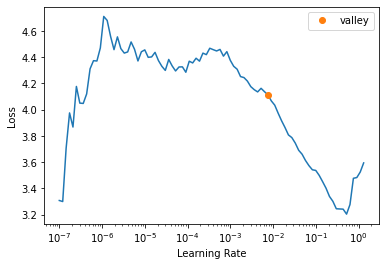

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    1.50       1.48
1    0.30       0.30
2   -1.49      -1.18
3    1.00       1.00
4   -0.20       0.04
XGBoost RMSE:  0.21930753


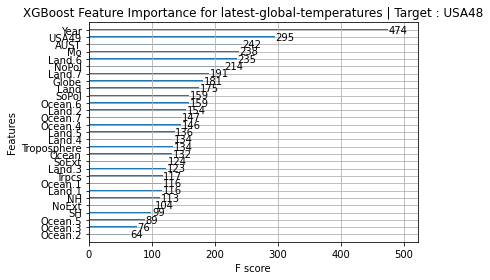

Target Variable: Ocean.7
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:13,  3.01it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9147109989144455, 'Adjusted R-Squared': 0.9083526929209209, 'RMSE': 0.3257811218363331, 'Time taken': 0.331587553024292}


 12%|█▏        | 5/42 [00:00<00:03,  9.54it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9728797530352438, 'Adjusted R-Squared': 0.9708579351381282, 'RMSE': 0.18370721804533796, 'Time taken': 0.2265625}
{'Model': 'BayesianRidge', 'R-Squared': 0.9083574675993245, 'Adjusted R-Squared': 0.9015255050296083, 'RMSE': 0.33769757452719995, 'Time taken': 0.01859879493713379}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8104052593614124, 'Adjusted R-Squared': 0.7962709470773017, 'RMSE': 0.4857273335669031, 'Time taken': 0.07985472679138184}
{'Model': 'DummyRegressor', 'R-Squared': -0.0007448130382379237, 'Adjusted R-Squared': -0.07535046748067731, 'RMSE': 1.1159406, 'Time taken': 0.01767420768737793}
{'Model': 'ElasticNet', 'R-Squared': 0.5500884367436121, 'Adjusted R-Squared': 0.5165474718735986, 'RMSE': 0.7482435, 'Time taken': 0.02027750015258789}


 17%|█▋        | 7/42 [00:00<00:04,  8.27it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8680358777320413, 'Adjusted R-Squared': 0.8581979354549956, 'RMSE': 0.40523538, 'Time taken': 0.2666659355163574}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9641879064501716, 'Adjusted R-Squared': 0.9615181102729351, 'RMSE': 0.21110292733851008, 'Time taken': 0.03624606132507324}


 21%|██▏       | 9/42 [00:02<00:08,  3.68it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.976601761709299, 'Adjusted R-Squared': 0.9748574200372416, 'RMSE': 0.17063612507588805, 'Time taken': 1.0245764255523682}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.12it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.24775692299182694, 'Adjusted R-Squared': 0.19167710491152612, 'RMSE': 0.9675167675265748, 'Time taken': 0.365126371383667}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.814566789784728, 'Adjusted R-Squared': 0.8007427201285766, 'RMSE': 0.4803669934968855, 'Time taken': 0.055644989013671875}


 31%|███       | 13/42 [00:03<00:09,  3.11it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9767075406710071, 'Adjusted R-Squared': 0.9749710848341413, 'RMSE': 0.17024998151279433, 'Time taken': 0.9085409641265869}


 36%|███▌      | 15/42 [00:04<00:09,  2.92it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9729224097407186, 'Adjusted R-Squared': 0.9709037719064791, 'RMSE': 0.18356268712488777, 'Time taken': 0.6331498622894287}
{'Model': 'HuberRegressor', 'R-Squared': 0.9996883861999046, 'Adjusted R-Squared': 0.9996651553510544, 'RMSE': 0.019691905446489067, 'Time taken': 0.1947178840637207}


 40%|████      | 17/42 [00:04<00:06,  3.83it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7981985381994899, 'Adjusted R-Squared': 0.7831542132837707, 'RMSE': 0.5011198, 'Time taken': 0.08990120887756348}
{'Model': 'KernelRidge', 'R-Squared': 0.9083877872648194, 'Adjusted R-Squared': 0.901558085030063, 'RMSE': 0.3376417, 'Time taken': 0.16440820693969727}


 45%|████▌     | 19/42 [00:04<00:04,  4.95it/s]

{'Model': 'Lars', 'R-Squared': -2711.42999343509, 'Adjusted R-Squared': -2913.6419980870633, 'RMSE': 58.09766386298909, 'Time taken': 0.05793428421020508}
{'Model': 'LarsCV', 'R-Squared': 0.791067849073892, 'Adjusted R-Squared': 0.7754919303673184, 'RMSE': 0.5098965084868698, 'Time taken': 0.12489652633666992}
{'Model': 'Lasso', 'R-Squared': 0.10992515762402266, 'Adjusted R-Squared': 0.04356996371938682, 'RMSE': 1.0524286, 'Time taken': 0.05294656753540039}


 50%|█████     | 21/42 [00:04<00:03,  5.35it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9083695761076506, 'Adjusted R-Squared': 0.9015385162287864, 'RMSE': 0.33767524, 'Time taken': 0.2596004009246826}
{'Model': 'LassoLars', 'R-Squared': -0.0007448234834204204, 'Adjusted R-Squared': -0.07535047870454936, 'RMSE': 1.115940595773748, 'Time taken': 0.026595592498779297}


 57%|█████▋    | 24/42 [00:05<00:02,  6.69it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9062257649503246, 'Adjusted R-Squared': 0.8992348836741277, 'RMSE': 0.34160259846731167, 'Time taken': 0.18227553367614746}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9181430248012326, 'Adjusted R-Squared': 0.9120405767787023, 'RMSE': 0.3191591110184891, 'Time taken': 0.0998079776763916}
{'Model': 'LinearRegression', 'R-Squared': 0.8980786121199844, 'Adjusted R-Squared': 0.8904803595530938, 'RMSE': 0.35613286, 'Time taken': 0.05017566680908203}


 62%|██████▏   | 26/42 [00:05<00:02,  5.70it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9996744036232632, 'Adjusted R-Squared': 0.9996501303715271, 'RMSE': 0.020128860135419008, 'Time taken': 0.3952927589416504}


 64%|██████▍   | 27/42 [00:07<00:08,  1.87it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9841694108572477, 'Adjusted R-Squared': 0.9829892384018755, 'RMSE': 0.14035501641448062, 'Time taken': 1.9703214168548584}


 74%|███████▍  | 31/42 [00:08<00:03,  3.34it/s]

{'Model': 'NuSVR', 'R-Squared': 0.90677867472343, 'Adjusted R-Squared': 0.8998290129418862, 'RMSE': 0.34059403438896196, 'Time taken': 0.5595028400421143}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.928847638876387, 'Adjusted R-Squared': 0.923543221209074, 'RMSE': 0.2975596633306343, 'Time taken': 0.017580032348632812}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.932801696384105, 'Adjusted R-Squared': 0.927792054212226, 'RMSE': 0.2891735425148907, 'Time taken': 0.06483292579650879}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9920602904757647, 'Adjusted R-Squared': 0.9914683841102048, 'RMSE': 0.0993989295699123, 'Time taken': 0.056815147399902344}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [00:08<00:01,  4.50it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.9996920104430796, 'Adjusted R-Squared': 0.9996690497820239, 'RMSE': 0.019577056, 'Time taken': 0.09024786949157715}


 88%|████████▊ | 37/42 [00:10<00:01,  2.66it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9762063417625685, 'Adjusted R-Squared': 0.9744325214826571, 'RMSE': 0.17207192217616188, 'Time taken': 2.330242872238159}
{'Model': 'Ridge', 'R-Squared': 0.9086473540560577, 'Adjusted R-Squared': 0.9018370025589515, 'RMSE': 0.33716306, 'Time taken': 0.022420406341552734}
{'Model': 'RidgeCV', 'R-Squared': 0.9143522555914698, 'Adjusted R-Squared': 0.9079672052371064, 'RMSE': 0.326465554539959, 'Time taken': 0.046738624572753906}
{'Model': 'SGDRegressor', 'R-Squared': 0.9172045565011592, 'Adjusted R-Squared': 0.9110321455462327, 'RMSE': 0.3209834339464617, 'Time taken': 0.0571742057800293}


 93%|█████████▎| 39/42 [00:11<00:00,  3.34it/s]

{'Model': 'SVR', 'R-Squared': 0.9007626134502609, 'Adjusted R-Squared': 0.8933644535275297, 'RMSE': 0.35141238196667623, 'Time taken': 0.23023343086242676}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8980786121199844, 'Adjusted R-Squared': 0.8904803595530938, 'RMSE': 0.35613286, 'Time taken': 0.01569652557373047}
{'Model': 'TweedieRegressor', 'R-Squared': 0.814566789784728, 'Adjusted R-Squared': 0.8007427201285766, 'RMSE': 0.4803669934968855, 'Time taken': 0.054654598236083984}


 98%|█████████▊| 41/42 [00:11<00:00,  3.31it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9853648559028957, 'Adjusted R-Squared': 0.9842738040293326, 'RMSE': 0.13495155, 'Time taken': 0.5592243671417236}


100%|██████████| 42/42 [00:12<00:00,  3.44it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9702101622880144, 'Adjusted R-Squared': 0.9679893260575578, 'RMSE': 0.19253667572124838, 'Time taken': 0.37895774841308594}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.7
Ocean.7
Target Standard Deviation: 1.1853123903274536
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.02        0.09
HuberRegressor                               1.00       1.00  0.02        0.19
LinearSVR                                    1.00       1.00  0.02        0.40
PassiveAggressiveRegressor                   0.99       0.99  0.10        0.06
XGBRegressor                                 0.98       0.99  0.13        0.56
MLPRegressor                                 0.98       0.98  0.14        1.97
GradientBoostingRegressor                    0.97       0.98  0.17   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.762158,1.897003,1.377317,00:01
1,3.370031,3.780574,1.944370,00:01


Better model found at epoch 0 with _rmse value: 1.3773170709609985.
No improvement since epoch 0: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,USA48,USA49,AUST,Ocean.7,Ocean.7_pred
0,3.00,12.00,4.00,-1.00,-0.97,-0.94,-0.97,-0.97,-0.89,-0.77,-0.55,-0.79,-0.79,-0.77,-0.79,-0.84,-0.91,-0.72,-0.46,-0.19,-0.51,-0.32,-0.63,-0.05,0.27,0.29,-1.35,-1.41,-1.73,0.33,0.35
1,38.00,9.00,3.00,-0.19,0.43,-0.46,-0.16,0.06,-0.31,-0.15,0.96,-0.47,0.09,0.10,0.06,-0.33,0.04,-0.67,-0.17,1.07,-0.56,0.24,0.41,0.08,0.64,1.53,-0.94,-0.57,-1.45,0.08,-0.07
2,25.00,1.00,4.00,-1.39,-1.36,-1.33,-1.26,-0.97,-1.37,-1.16,-1.48,-1.03,-0.72,-0.33,-0.83,-1.21,-1.02,-1.27,-1.07,-1.48,-0.86,-1.21,-1.24,-1.14,-0.97,-1.17,-0.04,-0.53,-0.97,-1.08,-1.76
3,20.00,7.00,5.00,-0.97,-0.56,-1.11,-0.86,-0.79,-0.81,-0.85,0.13,-1.11,-0.25,-0.01,-0.32,-1.02,-0.89,-1.04,-0.87,0.17,-1.12,-0.39,-0.44,-0.33,0.36,0.69,-0.76,-0.80,-1.22,0.19,0.34
4,11.00,5.00,3.00,0.91,0.51,1.03,0.23,0.41,0.08,1.32,0.46,1.53,-0.15,-0.03,-0.17,0.33,0.43,0.18,1.76,0.64,1.99,0.41,0.55,0.28,0.59,0.73,-0.27,0.02,-0.99,0.64,0.09
5,21.00,2.00,5.00,-1.13,-0.73,-1.27,-1.11,-0.62,-1.34,-0.88,-0.55,-0.91,-0.43,-0.35,-0.45,-1.21,-0.61,-1.71,-0.82,-0.48,-0.86,-2.32,-2.03,-2.49,-0.31,-0.24,0.99,1.11,-0.76,-0.46,-2.42
6,21.00,9.00,5.00,-0.29,-0.42,-0.23,-0.97,-0.75,-1.03,0.45,0.38,0.42,-0.68,-0.71,-0.66,-0.89,-0.65,-1.04,0.91,0.81,0.88,-0.22,-0.12,-0.31,0.82,0.84,-0.52,-0.47,0.14,1.04,0.22
7,25.00,5.00,3.00,0.03,-0.31,0.19,0.26,-0.50,0.78,-0.20,0.17,-0.33,1.64,1.35,1.72,-0.62,-0.91,-0.24,-1.20,-0.45,-1.36,-0.08,-0.22,0.04,-0.65,-0.72,-1.19,-0.87,-0.25,-0.77,-3.04
8,31.00,5.00,2.00,-0.71,-0.86,-0.62,-0.30,-0.25,-0.31,-0.94,-1.58,-0.71,-0.70,-0.92,-0.62,-0.01,-0.05,0.01,-0.73,-1.38,-0.49,0.04,-0.01,0.08,-0.69,-0.85,0.27,0.32,-1.37,-0.75,-0.19


<Figure size 432x288 with 0 Axes>

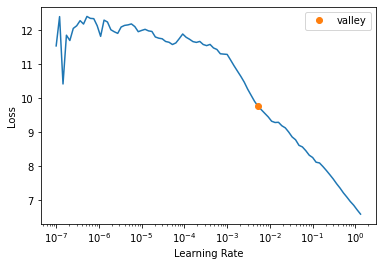

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.47      -0.48
1    0.98       0.95
2   -0.40      -0.46
3   -0.35      -0.28
4    0.10       0.11
XGBoost RMSE:  0.13476215


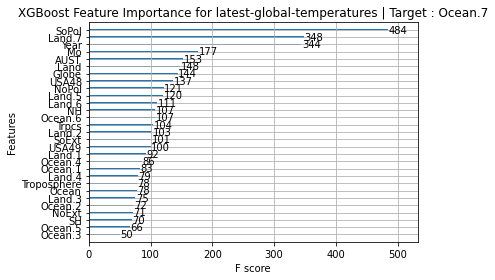

Target Variable: Land.7
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:14,  2.83it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9065853006963833, 'Adjusted R-Squared': 0.8996212228562679, 'RMSE': 0.4682565029854342, 'Time taken': 0.35366368293762207}


 12%|█▏        | 5/42 [00:00<00:03,  9.26it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9659066076328402, 'Adjusted R-Squared': 0.9633649408496843, 'RMSE': 0.28288590936389124, 'Time taken': 0.2299950122833252}
{'Model': 'BayesianRidge', 'R-Squared': -2.896694520989934, 'Adjusted R-Squared': -3.1871935983902118, 'RMSE': 3.0242966456571723, 'Time taken': 0.018927574157714844}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9244645144194179, 'Adjusted R-Squared': 0.9188333342604542, 'RMSE': 0.42106749830721857, 'Time taken': 0.07953882217407227}
{'Model': 'DummyRegressor', 'R-Squared': -0.004899328328801467, 'Adjusted R-Squared': -0.07981470242015165, 'RMSE': 1.53581, 'Time taken': 0.017799854278564453}
{'Model': 'ElasticNet', 'R-Squared': 0.7530045783319911, 'Adjusted R-Squared': 0.7345910378991576, 'RMSE': 0.76141363, 'Time taken': 0.02312183380126953}


 17%|█▋        | 7/42 [00:00<00:04,  8.09it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.5199264647340707, 'Adjusted R-Squared': -0.6332371780432944, 'RMSE': 1.8888066, 'Time taken': 0.26857995986938477}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9070418209256339, 'Adjusted R-Squared': 0.9001117767272878, 'RMSE': 0.46711091036964464, 'Time taken': 0.04015374183654785}


 21%|██▏       | 9/42 [00:02<00:09,  3.65it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9788354798381962, 'Adjusted R-Squared': 0.9772576621397584, 'RMSE': 0.2228847838946792, 'Time taken': 1.0266351699829102}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.10it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.2454956054893156, 'Adjusted R-Squared': 0.18924720589854482, 'RMSE': 1.3307825396734485, 'Time taken': 0.36281299591064453}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8577496570032495, 'Adjusted R-Squared': 0.8471448756487359, 'RMSE': 0.5778337021333974, 'Time taken': 0.059282541275024414}


 31%|███       | 13/42 [00:03<00:09,  3.05it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9666327664582796, 'Adjusted R-Squared': 0.9641452349088968, 'RMSE': 0.2798570860700132, 'Time taken': 0.9365131855010986}


 33%|███▎      | 14/42 [00:04<00:12,  2.30it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9631965188958174, 'Adjusted R-Squared': 0.960452814648976, 'RMSE': 0.2939142595291787, 'Time taken': 0.8848183155059814}


 38%|███▊      | 16/42 [00:04<00:08,  3.06it/s]

{'Model': 'HuberRegressor', 'R-Squared': -2.842103213071679, 'Adjusted R-Squared': -3.128532501449773, 'RMSE': 3.003037262342724, 'Time taken': 0.23189592361450195}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8416518168762699, 'Adjusted R-Squared': 0.829846939471159, 'RMSE': 0.60965306, 'Time taken': 0.11550259590148926}


 45%|████▌     | 19/42 [00:04<00:04,  5.10it/s]

{'Model': 'KernelRidge', 'R-Squared': -1.807188096041223, 'Adjusted R-Squared': -2.0164643294221882, 'RMSE': 2.5669177, 'Time taken': 0.1451430320739746}
{'Model': 'Lars', 'R-Squared': -29.872636935142104, 'Adjusted R-Squared': -32.17419598686221, 'RMSE': 8.512616531602143, 'Time taken': 0.05049014091491699}
{'Model': 'LarsCV', 'R-Squared': 0.8186377232818698, 'Adjusted R-Squared': 0.8051171422411866, 'RMSE': 0.6524536827861518, 'Time taken': 0.09621644020080566}
{'Model': 'Lasso', 'R-Squared': 0.5814283885849237, 'Adjusted R-Squared': 0.5502238211529515, 'RMSE': 0.9911995, 'Time taken': 0.03236794471740723}


 50%|█████     | 21/42 [00:05<00:03,  5.29it/s]

{'Model': 'LassoCV', 'R-Squared': -2.119606311413875, 'Adjusted R-Squared': -2.352173362907454, 'RMSE': 2.7059896, 'Time taken': 0.31726622581481934}
{'Model': 'LassoLars', 'R-Squared': -0.004899347840206181, 'Adjusted R-Squared': -0.07981472338613416, 'RMSE': 1.5358099946041985, 'Time taken': 0.03805851936340332}


 55%|█████▍    | 23/42 [00:05<00:03,  5.89it/s]

{'Model': 'LassoLarsCV', 'R-Squared': -2.8945371813105063, 'Adjusted R-Squared': -3.1848754287603898, 'RMSE': 3.023459354151895, 'Time taken': 0.22882843017578125}
{'Model': 'LassoLarsIC', 'R-Squared': -1.5852834845666064, 'Adjusted R-Squared': -1.7780167006396952, 'RMSE': 2.4633736593770874, 'Time taken': 0.05154871940612793}
{'Model': 'LinearRegression', 'R-Squared': -2.896908708340724, 'Adjusted R-Squared': -3.1874237534355334, 'RMSE': 3.02438, 'Time taken': 0.04244661331176758}


 62%|██████▏   | 26/42 [00:06<00:02,  5.97it/s]

{'Model': 'LinearSVR', 'R-Squared': -2.885252021083642, 'Adjusted R-Squared': -3.174898058645147, 'RMSE': 3.0198530132758656, 'Time taken': 0.396486759185791}


 64%|██████▍   | 27/42 [00:09<00:09,  1.58it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.337557861740562, 'Adjusted R-Squared': 0.28817271518651655, 'RMSE': 1.2469532816383708, 'Time taken': 2.9228076934814453}


 79%|███████▊  | 33/42 [00:09<00:02,  3.84it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8082885581795795, 'Adjusted R-Squared': 0.7939964455502936, 'RMSE': 0.6708110748734566, 'Time taken': 0.38945627212524414}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6563774797494544, 'Adjusted R-Squared': 0.6307603766973571, 'RMSE': 0.8980841189674827, 'Time taken': 0.016274690628051758}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -2.898689084836845, 'Adjusted R-Squared': -3.189336857228281, 'RMSE': 3.025070555571286, 'Time taken': 0.036158084869384766}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.7727477947594714, 'Adjusted R-Squared': -1.979456499253108, 'RMSE': 2.5511229612305426, 'Time taken': 0.028089284896850586}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': -2.8969057278611112, 'Adjusted R-Squared': -3.1874205507607822, 'RMSE': 3.0243788, 'Time taken': 0.025812149047851562}


 83%|████████▎ | 35/42 [00:12<00:03,  1.99it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9718885617295016, 'Adjusted R-Squared': 0.9697928503931404, 'RMSE': 0.2568725756356526, 'Time taken': 2.4436452388763428}
{'Model': 'Ridge', 'R-Squared': -1.80643406172861, 'Adjusted R-Squared': -2.01565408175465, 'RMSE': 2.566573, 'Time taken': 0.015941143035888672}
{'Model': 'RidgeCV', 'R-Squared': -2.7563946653498874, 'Adjusted R-Squared': -3.0364343704787995, 'RMSE': 2.9693528961666273, 'Time taken': 0.023929357528686523}
{'Model': 'SGDRegressor', 'R-Squared': 0.8168760079747064, 'Adjusted R-Squared': 0.8032240908314325, 'RMSE': 0.6556149238863673, 'Time taken': 0.02511000633239746}


 90%|█████████ | 38/42 [00:12<00:01,  2.73it/s]

{'Model': 'SVR', 'R-Squared': 0.8080923814477896, 'Adjusted R-Squared': 0.7937856438179334, 'RMSE': 0.6711542048259971, 'Time taken': 0.2776789665222168}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -2.896908708340724, 'Adjusted R-Squared': -3.1874237534355334, 'RMSE': 3.02438, 'Time taken': 0.016823768615722656}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8577496570032495, 'Adjusted R-Squared': 0.8471448756487359, 'RMSE': 0.5778337021333974, 'Time taken': 0.028489351272583008}


 98%|█████████▊| 41/42 [00:12<00:00,  3.21it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9754156928302147, 'Adjusted R-Squared': 0.9735829295707705, 'RMSE': 0.24021782, 'Time taken': 0.5641424655914307}


100%|██████████| 42/42 [00:13<00:00,  3.16it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9639345182350997, 'Adjusted R-Squared': 0.9612458319338604, 'RMSE': 0.29095248866285317, 'Time taken': 0.36454010009765625}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.7
Land.7
Target Standard Deviation: 1.7439295053482056
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.98       0.98  0.22        1.03
XGBRegressor                                 0.97       0.98  0.24        0.56
RandomForestRegressor                        0.97       0.97  0.26        2.44
GradientBoostingRegressor                    0.96       0.97  0.28        0.94
BaggingRegressor                             0.96       0.97  0.28        0.23
LGBMRegressor                                0.96       0.96  0.29        0.36
HistGradientBoostingRegressor                0.96       0.96  0.29     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.741324,3.252332,1.803422,00:01
1,5.332769,5.936901,2.436576,00:01


Better model found at epoch 0 with _rmse value: 1.8034223318099976.
No improvement since epoch 0: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Ocean.7,USA48,USA49,AUST,Land.7,Land.7_pred
0,29.00,12.00,4.00,-0.28,-0.46,-0.16,-0.35,-0.75,-0.00,-0.16,0.29,-0.26,0.18,0.19,0.20,-0.56,-0.93,-0.11,-0.30,0.33,-0.46,-0.93,-1.09,-0.72,0.23,-0.04,-0.14,-0.25,-0.73,1.09,-0.51
1,8.00,1.00,3.00,5.42,4.10,5.65,3.38,3.10,3.27,6.11,4.21,6.33,4.30,4.72,4.14,1.98,2.13,1.59,4.94,2.69,5.24,-2.13,-1.73,-2.35,0.62,0.64,3.82,3.66,5.08,1.00,-7.54
2,7.00,11.00,3.00,5.59,4.38,5.75,3.96,2.98,4.32,5.76,5.12,5.64,4.54,4.67,4.46,2.52,2.04,2.72,4.50,3.63,4.42,-0.67,-0.49,-0.79,2.38,2.24,2.82,2.40,2.31,4.18,-2.71
3,45.00,7.00,5.00,0.38,0.39,0.30,0.26,0.30,0.19,0.37,0.39,0.34,0.23,0.39,0.18,0.22,0.25,0.19,0.32,0.25,0.31,0.21,0.31,0.11,-0.12,-0.35,0.09,0.16,-0.32,0.40,-0.01
4,34.00,8.00,5.00,-0.05,0.06,-0.09,0.40,0.03,0.66,-0.51,0.12,-0.67,0.59,0.56,0.59,0.20,-0.11,0.51,-0.97,-0.15,-1.14,-0.04,-0.16,0.07,-0.55,-0.69,0.03,0.08,0.45,-0.52,-0.19
5,23.00,1.00,4.00,1.13,0.31,1.43,0.76,-0.01,1.24,1.18,0.82,1.24,1.99,1.70,2.07,-0.19,-0.46,0.09,0.34,0.08,0.38,0.49,0.47,0.48,-0.14,-0.04,-0.07,0.05,0.68,-0.47,-0.36
6,14.00,5.00,5.00,-0.74,-0.71,-0.72,-1.15,-0.77,-1.33,-0.13,-0.28,-0.08,-1.04,-0.99,-1.07,-0.88,-0.58,-1.07,0.41,0.14,0.48,-0.07,-0.06,-0.07,0.43,0.67,-0.34,-0.31,0.65,0.11,-0.38
7,11.00,7.00,3.00,1.07,0.50,1.26,0.21,0.23,0.16,1.71,0.84,1.87,0.18,0.36,0.12,0.15,0.17,0.14,1.96,0.75,2.19,0.21,0.22,0.19,0.79,1.01,0.16,0.05,1.30,0.73,0.54
8,28.00,7.00,4.00,-0.25,-0.32,-0.19,-0.26,-0.26,-0.25,-0.16,-0.30,-0.11,-0.07,-0.12,-0.06,-0.29,-0.22,-0.33,-0.16,-0.32,-0.10,0.10,0.14,0.06,-0.31,-0.23,0.25,0.29,0.37,-0.73,-0.10


<Figure size 432x288 with 0 Axes>

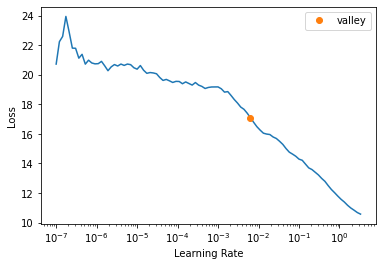

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.84       0.82
1   -1.07      -0.98
2   -3.59      -3.90
3    1.50       1.74
4   -1.57      -1.53
XGBoost RMSE:  0.23748566


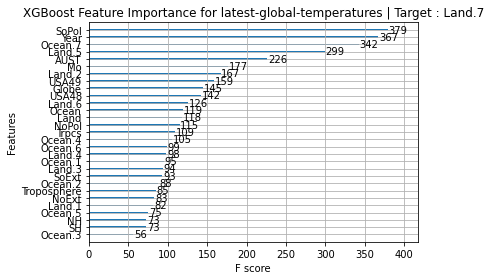

Target Variable: SoPol
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.69it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9441194332346106, 'Adjusted R-Squared': 0.9399535297996586, 'RMSE': 0.3468781017736604, 'Time taken': 0.3717679977416992}


 10%|▉         | 4/42 [00:00<00:05,  7.15it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9540849355475933, 'Adjusted R-Squared': 0.9506619615909871, 'RMSE': 0.31443007691543357, 'Time taken': 0.23208332061767578}
{'Model': 'BayesianRidge', 'R-Squared': 0.9794203307718659, 'Adjusted R-Squared': 0.9778861137857068, 'RMSE': 0.21050658114127532, 'Time taken': 0.02061772346496582}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9740132239881646, 'Adjusted R-Squared': 0.9720759064962797, 'RMSE': 0.23654985401194192, 'Time taken': 0.0786283016204834}
{'Model': 'DummyRegressor', 'R-Squared': -0.0016342127852349009, 'Adjusted R-Squared': -0.07630617209313151, 'RMSE': 1.4685917, 'Time taken': 0.019198179244995117}
{'Model': 'ElasticNet', 'R-Squared': 0.7350659319844632, 'Adjusted R-Squared': 0.7153150631606828, 'RMSE': 0.7552929, 'Time taken': 0.02038741111755371}


 17%|█▋        | 7/42 [00:00<00:03,  8.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9891555247932903, 'Adjusted R-Squared': 0.9883470677727386, 'RMSE': 0.15280963, 'Time taken': 0.23909425735473633}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9051872412210673, 'Adjusted R-Squared': 0.898118937867368, 'RMSE': 0.4518350055895417, 'Time taken': 0.037368059158325195}


 21%|██▏       | 9/42 [00:02<00:08,  3.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.97501010454833, 'Adjusted R-Squared': 0.9731471046303393, 'RMSE': 0.23196833346983703, 'Time taken': 1.014026403427124}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.31it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.1795474587981114, 'Adjusted R-Squared': 0.11838261639488579, 'RMSE': 1.3291476110945395, 'Time taken': 0.3442232608795166}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9315182554763177, 'Adjusted R-Squared': 0.9264129326197964, 'RMSE': 0.3840023572700413, 'Time taken': 0.057996273040771484}


 31%|███       | 13/42 [00:03<00:09,  3.19it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9768436895371697, 'Adjusted R-Squared': 0.9751173836157762, 'RMSE': 0.22329611372297, 'Time taken': 0.9087116718292236}


 33%|███▎      | 14/42 [00:03<00:10,  2.69it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9210359155335154, 'Adjusted R-Squared': 0.9151491328869137, 'RMSE': 0.41234552430884186, 'Time taken': 0.6191835403442383}


 36%|███▌      | 15/42 [00:04<00:09,  2.96it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999943370668798, 'Adjusted R-Squared': 0.9999939148944877, 'RMSE': 0.00349194342709604, 'Time taken': 0.2092735767364502}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8625445735954288, 'Adjusted R-Squared': 0.8522972538891754, 'RMSE': 0.54403573, 'Time taken': 0.06773161888122559}


 45%|████▌     | 19/42 [00:04<00:04,  5.24it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9796364563086088, 'Adjusted R-Squared': 0.9781183515089936, 'RMSE': 0.2093983, 'Time taken': 0.14363670349121094}
{'Model': 'Lars', 'R-Squared': -47.364065510910216, 'Adjusted R-Squared': -50.96961281120943, 'RMSE': 10.204879553565343, 'Time taken': 0.04934215545654297}
{'Model': 'LarsCV', 'R-Squared': 0.9860990149052081, 'Adjusted R-Squared': 0.9850626946796324, 'RMSE': 0.17300922935492358, 'Time taken': 0.1084909439086914}
{'Model': 'Lasso', 'R-Squared': 0.34154100419246836, 'Adjusted R-Squared': 0.2924528014201845, 'RMSE': 1.1907233, 'Time taken': 0.025873661041259766}


 55%|█████▍    | 23/42 [00:05<00:03,  5.95it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9909450132918731, 'Adjusted R-Squared': 0.9902699628689022, 'RMSE': 0.13963374, 'Time taken': 0.4149298667907715}
{'Model': 'LassoLars', 'R-Squared': -0.0016342150918309262, 'Adjusted R-Squared': -0.07630617457168465, 'RMSE': 1.4685916630035458, 'Time taken': 0.032196044921875}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9887418747870044, 'Adjusted R-Squared': 0.9879025801053157, 'RMSE': 0.155696740265838, 'Time taken': 0.16242027282714844}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9881121479512354, 'Adjusted R-Squared': 0.9872259070529984, 'RMSE': 0.15999196725311288, 'Time taken': 0.049254655838012695}
{'Model': 'LinearRegression', 'R-Squared': 0.9780840274379008, 'Adjusted R-Squared': 0.9764501888664332, 'RMSE': 0.21723354, 'Time taken': 0.02679896354675293}


 62%|██████▏   | 26/42 [00:05<00:02,  6.02it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999776882203525, 'Adjusted R-Squared': 0.9999760248743119, 'RMSE': 0.006931282324784237, 'Time taken': 0.41156482696533203}


 64%|██████▍   | 27/42 [00:08<00:08,  1.70it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9835351202654863, 'Adjusted R-Squared': 0.9823076613649698, 'RMSE': 0.18828935347101514, 'Time taken': 2.7454137802124023}


 74%|███████▍  | 31/42 [00:09<00:04,  2.63it/s]

{'Model': 'NuSVR', 'R-Squared': 0.7275703856073752, 'Adjusted R-Squared': 0.707260722837745, 'RMSE': 0.7659027707406142, 'Time taken': 0.9360718727111816}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9954311655054924, 'Adjusted R-Squared': 0.995090558306673, 'RMSE': 0.09918573040770488, 'Time taken': 0.01874709129333496}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9954311655054924, 'Adjusted R-Squared': 0.995090558306673, 'RMSE': 0.09918573040770488, 'Time taken': 0.06501340866088867}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9969326112183368, 'Adjusted R-Squared': 0.9967039369903978, 'RMSE': 0.08127011892080566, 'Time taken': 0.04193377494812012}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [00:09<00:02,  3.51it/s]

{'Model': 'RANSACRegressor', 'R-Squared': 0.9999938315507766, 'Adjusted R-Squared': 0.9999933716920941, 'RMSE': 0.0036444708, 'Time taken': 0.09199404716491699}


 88%|████████▊ | 37/42 [00:12<00:02,  2.47it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9665744976351316, 'Adjusted R-Squared': 0.9640826221374936, 'RMSE': 0.26827824359893043, 'Time taken': 2.340747833251953}
{'Model': 'Ridge', 'R-Squared': 0.9796398469887924, 'Adjusted R-Squared': 0.9781219949648206, 'RMSE': 0.20938087, 'Time taken': 0.02349543571472168}
{'Model': 'RidgeCV', 'R-Squared': 0.9830012624485233, 'Adjusted R-Squared': 0.9817340043791329, 'RMSE': 0.19131755285459734, 'Time taken': 0.04838871955871582}
{'Model': 'SGDRegressor', 'R-Squared': 0.9840254125095576, 'Adjusted R-Squared': 0.9828345049588562, 'RMSE': 0.18546472030744965, 'Time taken': 0.06460118293762207}


 93%|█████████▎| 39/42 [00:12<00:00,  3.20it/s]

{'Model': 'SVR', 'R-Squared': 0.7213432243004678, 'Adjusted R-Squared': 0.7005693258550014, 'RMSE': 0.7746067668825275, 'Time taken': 0.17215943336486816}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9780840274379008, 'Adjusted R-Squared': 0.9764501888664332, 'RMSE': 0.21723354, 'Time taken': 0.015908479690551758}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9315182554763177, 'Adjusted R-Squared': 0.9264129326197964, 'RMSE': 0.3840023572700413, 'Time taken': 0.05555319786071777}


 98%|█████████▊| 41/42 [00:12<00:00,  3.24it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9771972681099074, 'Adjusted R-Squared': 0.9754973215165585, 'RMSE': 0.22158478, 'Time taken': 0.5426111221313477}


100%|██████████| 42/42 [00:13<00:00,  3.16it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9236434283682027, 'Adjusted R-Squared': 0.9179510361385829, 'RMSE': 0.4054802383260713, 'Time taken': 0.38153719902038574}
Project: latest-global-temperatures
latest-global-temperatures
Target: SoPol
SoPol
Target Standard Deviation: 1.3657585382461548
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               1.00       1.00  0.00        0.21
RANSACRegressor                              1.00       1.00  0.00        0.09
LinearSVR                                    1.00       1.00  0.01        0.41
PassiveAggressiveRegressor                   1.00       1.00  0.08        0.04
OrthogonalMatchingPursuit                    1.00       1.00  0.10        0.02
OrthogonalMatchingPursuitCV                  1.00       1.00  0.10        0.07
LassoCV                                      0.99       0.99  0.14        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.587732,3.488038,1.867629,00:01
1,3.376985,1.360213,1.166281,00:01
2,2.459629,1.249273,1.117709,00:01
3,1.959671,0.977534,0.988703,00:01
4,1.505548,0.855477,0.924920,00:01
5,1.335590,0.997789,0.998894,00:01


Better model found at epoch 0 with _rmse value: 1.867629051208496.
Better model found at epoch 1 with _rmse value: 1.1662814617156982.
Better model found at epoch 2 with _rmse value: 1.117708683013916.
Better model found at epoch 3 with _rmse value: 0.9887032508850098.
Better model found at epoch 4 with _rmse value: 0.9249200224876404.
No improvement since epoch 4: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,Land.7,Ocean.7,USA48,USA49,AUST,SoPol,SoPol_pred
0,35.00,4.00,3.00,-0.58,-0.37,-0.62,-0.20,-0.04,-0.32,-0.80,-0.86,-0.74,-2.28,-2.08,-2.31,1.08,0.50,1.58,0.28,0.05,0.34,1.93,1.78,1.96,0.18,0.40,0.18,1.04,0.04,0.42,0.30
1,25.00,2.00,4.00,-1.39,-1.36,-1.33,-1.26,-0.96,-1.37,-1.18,-1.51,-1.03,-0.73,-0.33,-0.84,-1.20,-1.01,-1.26,-1.09,-1.53,-0.87,-1.20,-1.17,-1.16,-1.21,-0.97,-0.02,-0.53,-0.96,-1.37,-0.03
2,21.00,10.00,3.00,-0.94,-0.32,-1.14,-1.03,-0.26,-1.51,-0.60,-0.27,-0.65,-1.87,-1.78,-1.86,-0.17,0.20,-0.55,0.25,0.54,0.14,-0.38,-0.10,-0.60,0.70,0.54,0.88,0.74,-0.86,0.80,0.67
3,31.00,2.00,2.00,-0.00,-0.21,0.09,-0.20,-0.40,-0.01,0.17,0.26,0.15,-0.22,0.26,-0.37,-0.12,-0.58,0.36,0.37,0.34,0.34,-0.08,-0.89,0.66,-0.04,0.13,1.94,1.13,1.21,0.09,0.21
4,26.00,2.00,4.00,-0.81,-0.45,-0.91,-0.75,-0.31,-1.01,-0.63,-0.54,-0.62,-0.88,-0.87,-0.88,-0.53,-0.18,-0.82,-0.23,-0.04,-0.27,-0.18,-0.24,-0.11,0.05,-0.11,-0.14,0.05,0.00,-0.04,0.09
5,11.00,2.00,4.00,-0.78,-0.26,-0.98,-0.48,0.06,-0.79,-0.89,-0.77,-0.88,-0.49,-0.59,-0.47,-0.36,0.18,-0.87,-0.79,-0.50,-0.82,-0.44,-0.18,-0.64,-0.12,-0.31,0.95,0.91,-0.86,-0.29,-0.10
6,41.00,12.00,4.00,1.10,1.16,0.97,0.75,0.69,0.74,1.15,1.57,0.97,0.38,0.39,0.40,0.75,0.65,0.77,1.21,1.65,0.99,0.76,0.50,0.95,1.73,1.31,1.86,1.78,0.04,1.94,2.17
7,26.00,3.00,2.00,-0.23,-0.62,-0.01,-0.89,-1.06,-0.71,0.55,0.54,0.53,-0.43,-0.53,-0.39,-0.86,-1.01,-0.65,0.86,0.85,0.79,-0.23,-0.54,0.06,0.20,-0.11,-0.52,-0.18,1.53,0.03,0.15
8,47.00,7.00,2.00,0.16,0.86,-0.17,0.19,0.81,-0.29,0.09,0.56,-0.03,-0.80,-0.55,-0.88,0.72,1.05,0.28,0.58,0.89,0.43,0.24,0.28,0.18,1.02,0.31,0.65,0.64,0.18,0.80,0.73


<Figure size 432x288 with 0 Axes>

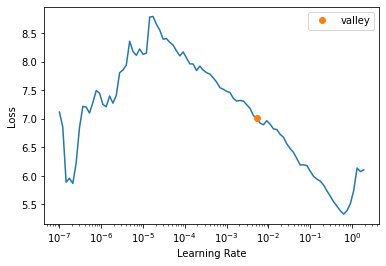

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    4.53       4.35
1    1.35       1.26
2    0.36       0.40
3    0.52       0.52
4   -0.08      -0.10
XGBoost RMSE:  0.2210787


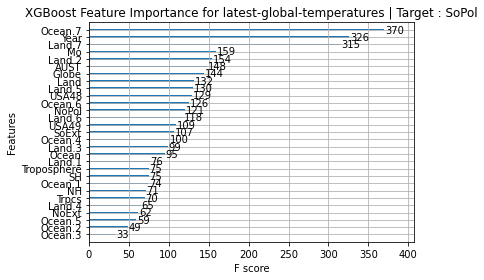

Target Variable: Ocean.6
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:14,  2.85it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9380420191547009, 'Adjusted R-Squared': 0.933423043718933, 'RMSE': 0.38371935460660916, 'Time taken': 0.3511025905609131}


 10%|▉         | 4/42 [00:00<00:05,  7.25it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9812654269673863, 'Adjusted R-Squared': 0.9798687621397622, 'RMSE': 0.2110021969694047, 'Time taken': 0.23753738403320312}
{'Model': 'BayesianRidge', 'R-Squared': 0.9998460775985772, 'Adjusted R-Squared': 0.9998346026637668, 'RMSE': 0.019125640690442404, 'Time taken': 0.019257068634033203}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9685528073340047, 'Adjusted R-Squared': 0.9662084150786991, 'RMSE': 0.27337325133562834, 'Time taken': 0.0802757740020752}
{'Model': 'DummyRegressor', 'R-Squared': -1.1818829835030797e-05, 'Adjusted R-Squared': -0.07456282845982276, 'RMSE': 1.5415856, 'Time taken': 0.018555641174316406}
{'Model': 'ElasticNet', 'R-Squared': 0.7047631175335044, 'Adjusted R-Squared': 0.6827531699974417, 'RMSE': 0.83762646, 'Time taken': 0.021610021591186523}


 17%|█▋        | 7/42 [00:00<00:03,  9.15it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9991972214708453, 'Adjusted R-Squared': 0.999137374228312, 'RMSE': 0.043678023, 'Time taken': 0.22202324867248535}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.827984110451951, 'Adjusted R-Squared': 0.8151603037761324, 'RMSE': 0.6393657384856212, 'Time taken': 0.040802001953125}


 21%|██▏       | 9/42 [00:01<00:08,  3.94it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9867163258529669, 'Adjusted R-Squared': 0.9857260262378924, 'RMSE': 0.17767412451688316, 'Time taken': 0.9932613372802734}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.33it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.16359374359755896, 'Adjusted R-Squared': 0.10123954967552606, 'RMSE': 1.4098526133368425, 'Time taken': 0.3594636917114258}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7973235858654568, 'Adjusted R-Squared': 0.7822140331407736, 'RMSE': 0.6940115261256413, 'Time taken': 0.06612658500671387}


 31%|███       | 13/42 [00:03<00:09,  3.20it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9817388091221585, 'Adjusted R-Squared': 0.9803774349950186, 'RMSE': 0.20831935648827318, 'Time taken': 0.8988742828369141}


 33%|███▎      | 14/42 [00:03<00:10,  2.73it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9669739461049685, 'Adjusted R-Squared': 0.9645118495420998, 'RMSE': 0.2801518017837983, 'Time taken': 0.5971882343292236}


 36%|███▌      | 15/42 [00:04<00:09,  2.97it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999735082661155, 'Adjusted R-Squared': 0.9999715333039494, 'RMSE': 0.007934512875552776, 'Time taken': 0.221907377243042}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7560461723234603, 'Adjusted R-Squared': 0.7378593831136411, 'RMSE': 0.76141053, 'Time taken': 0.06651449203491211}


 45%|████▌     | 19/42 [00:04<00:04,  5.11it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9994517721809142, 'Adjusted R-Squared': 0.999410901726535, 'RMSE': 0.03609488, 'Time taken': 0.16089844703674316}
{'Model': 'Lars', 'R-Squared': 0.9998264298414374, 'Adjusted R-Squared': 0.9998134901638068, 'RMSE': 0.020309657867127316, 'Time taken': 0.0664374828338623}
{'Model': 'LarsCV', 'R-Squared': 0.9995760925820107, 'Adjusted R-Squared': 0.9995444902295129, 'RMSE': 0.03173953687630649, 'Time taken': 0.11199069023132324}


 50%|█████     | 21/42 [00:04<00:03,  6.04it/s]

{'Model': 'Lasso', 'R-Squared': 0.5755396056080049, 'Adjusted R-Squared': 0.5438960286481904, 'RMSE': 1.0043467, 'Time taken': 0.029256820678710938}
{'Model': 'LassoCV', 'R-Squared': 0.9996084655716586, 'Adjusted R-Squared': 0.9995792766297, 'RMSE': 0.030503528, 'Time taken': 0.1797327995300293}


 55%|█████▍    | 23/42 [00:04<00:02,  7.19it/s]

{'Model': 'LassoLars', 'R-Squared': -1.1804289690386938e-05, 'Adjusted R-Squared': -0.07456281283570831, 'RMSE': 1.541585584596592, 'Time taken': 0.03467869758605957}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9995781863681196, 'Adjusted R-Squared': 0.9995467401076452, 'RMSE': 0.031661055039962485, 'Time taken': 0.1299877166748047}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9995222982968952, 'Adjusted R-Squared': 0.9994866855735275, 'RMSE': 0.03369329404625621, 'Time taken': 0.045851945877075195}
{'Model': 'LinearRegression', 'R-Squared': 0.9998461241432038, 'Adjusted R-Squared': 0.9998346526783013, 'RMSE': 0.01912275, 'Time taken': 0.022316694259643555}


 62%|██████▏   | 26/42 [00:05<00:02,  6.17it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999517140257644, 'Adjusted R-Squared': 0.9999481143001787, 'RMSE': 0.010712123634700468, 'Time taken': 0.5151960849761963}


 64%|██████▍   | 27/42 [00:08<00:09,  1.63it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9938215088707015, 'Adjusted R-Squared': 0.9933609015628618, 'RMSE': 0.12117312019040638, 'Time taken': 2.9429614543914795}


 79%|███████▊  | 33/42 [00:09<00:02,  3.85it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8425052050700444, 'Adjusted R-Squared': 0.8307639478644694, 'RMSE': 0.611784091956954, 'Time taken': 0.41166234016418457}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9715019399680723, 'Adjusted R-Squared': 0.9693774059297025, 'RMSE': 0.2602392063486542, 'Time taken': 0.016230344772338867}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9998123190262233, 'Adjusted R-Squared': 0.9997983273855047, 'RMSE': 0.021119090019702354, 'Time taken': 0.03557324409484863}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.999487546838911, 'Adjusted R-Squared': 0.9994493433898838, 'RMSE': 0.0348973272069453, 'Time taken': 0.024626731872558594}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999752483837697, 'Adjusted R-Squared': 0.9999734031475983, 'RMSE': 0.0076694963, 'Time taken': 0.0332643985748291}


 88%|████████▊ | 37/42 [00:11<00:01,  2.67it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9825984944159802, 'Adjusted R-Squared': 0.9813012099379942, 'RMSE': 0.20335670198004066, 'Time taken': 2.3096961975097656}
{'Model': 'Ridge', 'R-Squared': 0.9997675877446696, 'Adjusted R-Squared': 0.9997502613811616, 'RMSE': 0.023501446, 'Time taken': 0.023693084716796875}
{'Model': 'RidgeCV', 'R-Squared': 0.9997675446362275, 'Adjusted R-Squared': 0.9997502150589797, 'RMSE': 0.02350362574896164, 'Time taken': 0.04799675941467285}
{'Model': 'SGDRegressor', 'R-Squared': 0.9952625012397741, 'Adjusted R-Squared': 0.9949093200982663, 'RMSE': 0.10610592407389327, 'Time taken': 0.07875180244445801}


 93%|█████████▎| 39/42 [00:11<00:00,  3.23it/s]

{'Model': 'SVR', 'R-Squared': 0.8402007239930018, 'Adjusted R-Squared': 0.8282876674269274, 'RMSE': 0.6162436837862151, 'Time taken': 0.25467371940612793}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9998461241432038, 'Adjusted R-Squared': 0.9998346526783013, 'RMSE': 0.01912275, 'Time taken': 0.01597118377685547}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7973235858654568, 'Adjusted R-Squared': 0.7822140331407736, 'RMSE': 0.6940115261256413, 'Time taken': 0.05574321746826172}


 98%|█████████▊| 41/42 [00:12<00:00,  3.23it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9862126496141319, 'Adjusted R-Squared': 0.9851848008707125, 'RMSE': 0.18101121, 'Time taken': 0.5597074031829834}


100%|██████████| 42/42 [00:12<00:00,  3.30it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9674704584065518, 'Adjusted R-Squared': 0.9650453768995852, 'RMSE': 0.2780379315500156, 'Time taken': 0.36461353302001953}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.6
Ocean.6
Target Standard Deviation: 1.6362992525100708
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.01        0.03
HuberRegressor                               1.00       1.00  0.01        0.22
LinearSVR                                    1.00       1.00  0.01        0.52
LinearRegression                             1.00       1.00  0.02        0.02
TransformedTargetRegressor                   1.00       1.00  0.02        0.02
BayesianRidge                                1.00       1.00  0.02        0.02
Lars                                         1.00       1.00  0.02    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.008385,3.121204,1.766693,00:01
1,4.893287,1.760964,1.327013,00:01
2,3.584952,1.647164,1.283419,00:01
3,2.764514,1.717845,1.310666,00:01


Better model found at epoch 0 with _rmse value: 1.7666929960250854.
Better model found at epoch 1 with _rmse value: 1.3270132541656494.
Better model found at epoch 2 with _rmse value: 1.2834190130233765.
No improvement since epoch 2: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean.6,Ocean.6_pred
0,6.00,3.00,5.00,0.58,1.00,0.35,0.52,1.04,0.09,0.49,0.45,0.49,0.01,-0.12,0.05,0.73,1.20,0.16,0.54,0.52,0.51,0.61,0.86,0.51,0.44,0.58,-0.27,-0.57,0.55,0.54,0.74
1,20.00,9.00,2.00,0.45,0.94,0.18,0.49,0.70,0.29,0.28,1.01,0.08,0.29,0.51,0.22,0.53,0.70,0.33,0.13,0.78,-0.08,0.31,0.32,0.32,0.37,0.29,1.98,1.59,1.04,0.43,0.23
2,25.00,12.00,4.00,-0.49,-0.64,-0.37,-0.64,-0.91,-0.41,-0.17,0.18,-0.27,-0.42,-0.51,-0.38,-0.65,-0.88,-0.33,0.02,0.45,-0.10,0.32,0.25,0.84,0.83,0.89,-1.78,-1.30,-0.09,0.56,0.25
3,38.00,8.00,3.00,0.22,0.62,0.02,1.30,1.16,1.31,-0.95,-0.65,-0.98,1.45,1.45,1.44,0.80,0.83,0.70,-1.85,-1.31,-1.89,0.40,0.48,-0.61,-0.70,-0.61,0.46,0.39,-0.64,0.46,0.38
4,41.00,8.00,2.00,0.81,0.78,0.74,0.83,0.79,0.78,0.54,0.42,0.55,0.61,0.73,0.59,0.80,0.77,0.77,0.25,-0.02,0.33,0.16,0.28,0.08,-0.41,0.42,0.20,0.32,1.46,0.04,0.03
5,35.00,4.00,2.00,1.23,1.19,1.13,1.08,1.01,1.00,1.03,1.03,1.00,1.39,1.18,1.44,0.56,0.81,0.26,0.52,0.63,0.44,0.22,0.14,0.23,0.30,0.18,-0.34,-0.52,0.10,0.41,-0.31
6,44.00,6.00,5.00,0.32,0.32,0.31,0.63,0.45,0.70,-0.06,-0.09,-0.04,0.36,0.41,0.33,0.63,0.40,0.79,-0.27,-0.34,-0.24,0.52,0.52,-0.28,-0.39,-0.25,0.26,0.39,-0.00,0.79,0.58
7,6.00,10.00,3.00,2.17,1.68,2.27,1.83,1.67,1.78,1.98,0.99,2.15,0.81,0.94,0.76,1.98,1.60,2.16,1.90,0.66,2.12,0.57,0.76,0.21,0.43,0.05,1.34,1.76,-0.69,0.59,2.81
8,29.00,12.00,3.00,-0.07,0.83,-0.47,0.38,0.89,0.01,-0.52,0.38,-0.74,-0.29,-0.17,-0.31,0.63,1.02,0.16,-0.39,0.53,-0.64,1.12,1.17,0.37,0.71,0.15,-0.12,0.09,-0.17,1.59,1.83


<Figure size 432x288 with 0 Axes>

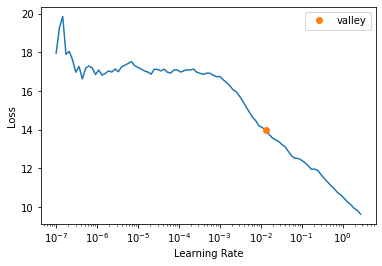

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.48       0.42
1   -0.85      -0.83
2   -0.30      -0.18
3    0.12       0.15
4   -0.44      -0.40
XGBoost RMSE:  0.18094529


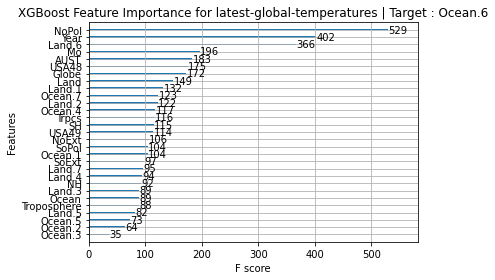

Target Variable: Land.6
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.71it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9396161090542211, 'Adjusted R-Squared': 0.9351144822227877, 'RMSE': 0.2762972518016423, 'Time taken': 0.3690354824066162}


 10%|▉         | 4/42 [00:00<00:05,  7.12it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9816486553928483, 'Adjusted R-Squared': 0.9802805602936004, 'RMSE': 0.15231755627772248, 'Time taken': 0.23634123802185059}
{'Model': 'BayesianRidge', 'R-Squared': 0.9997412889614052, 'Adjusted R-Squared': 0.9997220020202247, 'RMSE': 0.01808520757812278, 'Time taken': 0.018782615661621094}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9718307577126286, 'Adjusted R-Squared': 0.9697307370793798, 'RMSE': 0.18871377434310335, 'Time taken': 0.08132696151733398}
{'Model': 'DummyRegressor', 'R-Squared': -1.0069736735562884e-05, 'Adjusted R-Squared': -0.07456094897160792, 'RMSE': 1.1243932, 'Time taken': 0.03371858596801758}
{'Model': 'ElasticNet', 'R-Squared': 0.6753928552266857, 'Adjusted R-Squared': 0.6511933508605517, 'RMSE': 0.64061195, 'Time taken': 0.026520490646362305}


 17%|█▋        | 7/42 [00:00<00:03,  8.99it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9998672033466283, 'Adjusted R-Squared': 0.9998573033390504, 'RMSE': 0.012957153, 'Time taken': 0.20700597763061523}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9589973651786242, 'Adjusted R-Squared': 0.9559406134824291, 'RMSE': 0.22767843671138435, 'Time taken': 0.05619072914123535}


 21%|██▏       | 9/42 [00:02<00:08,  3.81it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9880278511574191, 'Adjusted R-Squared': 0.9871353259223681, 'RMSE': 0.12302746401217456, 'Time taken': 1.0156984329223633}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.26it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.20264862291386165, 'Adjusted R-Squared': 0.14320597526476653, 'RMSE': 1.0040165980125686, 'Time taken': 0.34859704971313477}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.87289942718467, 'Adjusted R-Squared': 0.8634240631444525, 'RMSE': 0.4008572770457623, 'Time taken': 0.030780553817749023}


 31%|███       | 13/42 [00:03<00:09,  3.21it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9767660110625871, 'Adjusted R-Squared': 0.9750339142009291, 'RMSE': 0.17138701200193243, 'Time taken': 0.9105982780456543}


 33%|███▎      | 14/42 [00:04<00:14,  1.98it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9682676079763989, 'Adjusted R-Squared': 0.9659019540723258, 'RMSE': 0.20029376194922127, 'Time taken': 1.3410704135894775}


 36%|███▌      | 15/42 [00:04<00:12,  2.24it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.999959370248201, 'Adjusted R-Squared': 0.9999563412949821, 'RMSE': 0.007167011524159041, 'Time taken': 0.22658705711364746}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.795497661757768, 'Adjusted R-Squared': 0.7802519861561621, 'RMSE': 0.50846976, 'Time taken': 0.08741259574890137}


 45%|████▌     | 19/42 [00:05<00:05,  4.16it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9994692659175535, 'Adjusted R-Squared': 0.9994296996234894, 'RMSE': 0.025903266, 'Time taken': 0.16401124000549316}
{'Model': 'Lars', 'R-Squared': -26.661127915558975, 'Adjusted R-Squared': -28.723268557078793, 'RMSE': 5.91358659376564, 'Time taken': 0.032232046127319336}
{'Model': 'LarsCV', 'R-Squared': 0.9643377974131109, 'Adjusted R-Squared': 0.9616791756264276, 'RMSE': 0.21233427299174878, 'Time taken': 0.12291240692138672}
{'Model': 'Lasso', 'R-Squared': 0.36237018566268986, 'Adjusted R-Squared': 0.3148348010462837, 'RMSE': 0.8978428, 'Time taken': 0.02382183074951172}


 50%|█████     | 21/42 [00:05<00:04,  5.08it/s]

{'Model': 'LassoCV', 'R-Squared': 0.999923236646102, 'Adjusted R-Squared': 0.9999175139282022, 'RMSE': 0.009851287, 'Time taken': 0.19111371040344238}
{'Model': 'LassoLars', 'R-Squared': -1.0067385935341733e-05, 'Adjusted R-Squared': -0.07456094644555522, 'RMSE': 1.1243931838975365, 'Time taken': 0.03202342987060547}


 55%|█████▍    | 23/42 [00:05<00:03,  5.87it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9997560019161905, 'Adjusted R-Squared': 0.9997378118276803, 'RMSE': 0.017563425625935995, 'Time taken': 0.19234657287597656}
{'Model': 'LassoLarsIC', 'R-Squared': 0.999956898473454, 'Adjusted R-Squared': 0.99995368524911, 'RMSE': 0.0073818011859058934, 'Time taken': 0.03483414649963379}
{'Model': 'LinearRegression', 'R-Squared': 0.9997410011441124, 'Adjusted R-Squared': 0.9997216927461156, 'RMSE': 0.018095264, 'Time taken': 0.027436017990112305}


 62%|██████▏   | 26/42 [00:06<00:02,  6.11it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999389881048624, 'Adjusted R-Squared': 0.9999344396602378, 'RMSE': 0.008782603484150981, 'Time taken': 0.39706969261169434}


 64%|██████▍   | 27/42 [00:08<00:07,  2.05it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.991734011259812, 'Adjusted R-Squared': 0.9911177807367645, 'RMSE': 0.1022264837622931, 'Time taken': 2.15207576751709}


 79%|███████▊  | 33/42 [00:08<00:01,  4.58it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8814494003796067, 'Adjusted R-Squared': 0.8726114379400401, 'RMSE': 0.3871398661940576, 'Time taken': 0.4465503692626953}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.962081530546932, 'Adjusted R-Squared': 0.9592547037753666, 'RMSE': 0.21894821942721893, 'Time taken': 0.016407012939453125}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9997435190876959, 'Adjusted R-Squared': 0.9997243984027169, 'RMSE': 0.018007090325548886, 'Time taken': 0.03518199920654297}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9987892530446825, 'Adjusted R-Squared': 0.9986989917035406, 'RMSE': 0.039123951417074504, 'Time taken': 0.025074005126953125}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.999964089126712, 'Adjusted R-Squared': 0.9999614119664926, 'RMSE': 0.006737969, 'Time taken': 0.02843499183654785}


 88%|████████▊ | 37/42 [00:11<00:01,  2.92it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9842548655144377, 'Adjusted R-Squared': 0.9830810637147429, 'RMSE': 0.1410877167923586, 'Time taken': 2.255789279937744}
{'Model': 'Ridge', 'R-Squared': 0.9998673658358809, 'Adjusted R-Squared': 0.9998574779418977, 'RMSE': 0.012949224, 'Time taken': 0.01449131965637207}
{'Model': 'RidgeCV', 'R-Squared': 0.9998673738447547, 'Adjusted R-Squared': 0.999857486547834, 'RMSE': 0.012948832350929841, 'Time taken': 0.04530668258666992}
{'Model': 'SGDRegressor', 'R-Squared': 0.9931357532094054, 'Adjusted R-Squared': 0.9926240227288726, 'RMSE': 0.09315634976351919, 'Time taken': 0.059227705001831055}


 93%|█████████▎| 39/42 [00:11<00:00,  3.48it/s]

{'Model': 'SVR', 'R-Squared': 0.8762643223843107, 'Adjusted R-Squared': 0.8670398117137323, 'RMSE': 0.3955154824719824, 'Time taken': 0.2613637447357178}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9997410011441124, 'Adjusted R-Squared': 0.9997216927461156, 'RMSE': 0.018095264, 'Time taken': 0.016022682189941406}
{'Model': 'TweedieRegressor', 'R-Squared': 0.87289942718467, 'Adjusted R-Squared': 0.8634240631444525, 'RMSE': 0.4008572770457623, 'Time taken': 0.060869455337524414}


 98%|█████████▊| 41/42 [00:12<00:00,  3.37it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9856804906693984, 'Adjusted R-Squared': 0.9846129694082482, 'RMSE': 0.13454889, 'Time taken': 0.5801806449890137}


100%|██████████| 42/42 [00:12<00:00,  3.31it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9693120112773865, 'Adjusted R-Squared': 0.9670242177736441, 'RMSE': 0.19697006629908154, 'Time taken': 0.41624975204467773}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.6
Land.6
Target Standard Deviation: 1.302925944328308
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.01        0.03
HuberRegressor                               1.00       1.00  0.01        0.23
LassoLarsIC                                  1.00       1.00  0.01        0.03
LinearSVR                                    1.00       1.00  0.01        0.40
LassoCV                                      1.00       1.00  0.01        0.19
RidgeCV                                      1.00       1.00  0.01        0.05
Ridge                                        1.00       1.00  0.01      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.623507,1.883936,1.372566,00:01
1,3.871494,1.352059,1.162781,00:01
2,2.706113,0.737469,0.858760,00:01
3,1.958233,1.284115,1.133188,00:01


Better model found at epoch 0 with _rmse value: 1.372565507888794.
Better model found at epoch 1 with _rmse value: 1.16278076171875.
Better model found at epoch 2 with _rmse value: 0.8587603569030762.
No improvement since epoch 2: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land.6,Land.6_pred
0,28.00,6.00,2.00,-0.48,-0.69,-0.33,-0.25,-0.64,0.04,-0.58,-0.51,-0.59,-0.41,-0.46,-0.41,-0.05,-0.56,0.45,-0.52,-0.42,-0.52,-0.06,0.11,-0.49,-0.60,-0.48,-0.78,-0.66,-0.16,-0.34,-0.04
1,1.00,0.00,1.00,-0.04,-0.03,-0.05,-0.04,-0.02,-0.04,-0.04,-0.02,-0.04,-0.03,-0.02,-0.03,-0.03,-0.02,-0.03,-0.03,-0.02,-0.04,0.02,0.02,-0.01,-0.02,-0.01,0.00,0.01,-0.01,0.00,0.02
2,7.00,10.00,4.00,-1.08,-1.36,-0.87,-1.26,-1.14,-1.24,-0.63,-1.20,-0.42,-0.90,-1.14,-0.82,-1.14,-0.98,-1.17,-0.29,-0.87,-0.08,-0.50,-0.39,0.02,-0.45,0.34,-0.54,-0.92,-1.41,-0.79,-0.27
3,5.00,8.00,2.00,-0.52,-0.37,-0.55,-0.77,-0.66,-0.78,-0.15,0.35,-0.27,-0.86,-1.03,-0.80,-0.55,-0.52,-0.54,0.36,1.02,0.11,-0.00,-0.17,0.79,1.08,0.66,-0.16,-0.40,0.25,0.20,-0.30
4,31.00,7.00,4.00,0.08,0.24,0.02,0.35,0.38,0.31,-0.21,-0.11,-0.24,0.29,0.27,0.28,0.31,0.31,0.26,-0.43,-0.20,-0.44,0.12,0.15,-0.46,-0.59,-0.42,0.75,0.64,0.10,0.08,0.03
5,17.00,6.00,4.00,-0.52,-1.01,-0.24,-1.18,-1.52,-0.81,0.30,0.42,0.25,-0.05,-0.17,-0.01,-1.54,-1.67,-1.27,0.43,0.61,0.35,-0.59,-0.39,0.67,0.75,0.66,-0.75,-0.69,-0.24,-1.03,-1.83
6,15.00,4.00,2.00,-0.67,-0.93,-0.52,-0.94,-1.12,-0.75,-0.24,-0.17,-0.24,-0.29,-0.15,-0.31,-1.09,-1.19,-0.88,-0.15,-0.13,-0.13,-0.27,-0.40,0.25,0.30,0.21,0.06,0.61,-0.53,-0.18,-0.04
7,46.00,8.00,5.00,-0.04,0.43,-0.27,0.65,0.57,0.61,-0.75,-0.05,-0.91,0.33,0.42,0.31,0.68,0.54,0.74,-1.17,-0.30,-1.33,0.36,0.37,-0.82,-0.48,-1.15,0.49,0.51,0.13,0.41,0.05
8,10.00,6.00,4.00,-1.27,-1.23,-1.19,-1.32,-1.19,-1.27,-0.92,-0.74,-0.91,-1.16,-1.49,-1.05,-1.14,-1.02,-1.12,-0.38,0.08,-0.49,-0.35,-0.20,0.40,0.30,0.49,-0.55,-0.73,-0.99,-0.65,-0.39


<Figure size 432x288 with 0 Axes>

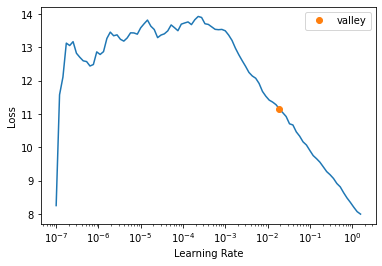

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.49      -0.48
1    0.04       0.09
2   -1.18      -1.40
3   -0.79      -0.63
4   -0.53      -0.52
XGBoost RMSE:  0.13448517


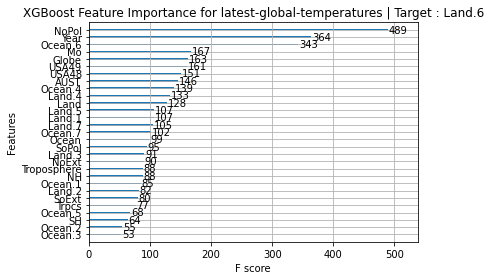

Target Variable: NoPol
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.69it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9042386095193089, 'Adjusted R-Squared': 0.8970995855503113, 'RMSE': 0.4320186359955696, 'Time taken': 0.3721628189086914}


 12%|█▏        | 5/42 [00:00<00:04,  9.20it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9165509819728204, 'Adjusted R-Squared': 0.9103298469527993, 'RMSE': 0.4032903914607931, 'Time taken': 0.22548174858093262}
{'Model': 'BayesianRidge', 'R-Squared': 0.9992507425516134, 'Adjusted R-Squared': 0.9991948853125305, 'RMSE': 0.038214025943858206, 'Time taken': 0.017586708068847656}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9080996991818853, 'Adjusted R-Squared': 0.9012485199435168, 'RMSE': 0.42321955490575586, 'Time taken': 0.0779263973236084}
{'Model': 'DummyRegressor', 'R-Squared': -6.024219938693953e-05, 'Adjusted R-Squared': -0.07461486179779886, 'RMSE': 1.3961122, 'Time taken': 0.018036842346191406}
{'Model': 'ElasticNet', 'R-Squared': 0.7598535920139012, 'Adjusted R-Squared': 0.7419506464313901, 'RMSE': 0.6841405, 'Time taken': 0.02002859115600586}


 17%|█▋        | 7/42 [00:00<00:03,  9.62it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9992551076234952, 'Adjusted R-Squared': 0.9991995758010823, 'RMSE': 0.03810255, 'Time taken': 0.17212581634521484}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9137188458641285, 'Adjusted R-Squared': 0.9072865747331766, 'RMSE': 0.41007683083156343, 'Time taken': 0.07344555854797363}


 21%|██▏       | 9/42 [00:01<00:08,  3.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.95941555347348, 'Adjusted R-Squared': 0.956389977768418, 'RMSE': 0.2812464656178571, 'Time taken': 0.9786660671234131}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  3.90it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.12835922673810263, 'Adjusted R-Squared': 0.0633782950553391, 'RMSE': 1.3033949328673513, 'Time taken': 0.494002103805542}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9022545831884602, 'Adjusted R-Squared': 0.8949676498014817, 'RMSE': 0.43647106780381767, 'Time taken': 0.06958317756652832}


 31%|███       | 13/42 [00:03<00:10,  2.85it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9538721974626878, 'Adjusted R-Squared': 0.9504333638545077, 'RMSE': 0.29983936026153934, 'Time taken': 1.0104892253875732}


 33%|███▎      | 14/42 [00:04<00:11,  2.50it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9362104595579657, 'Adjusted R-Squared': 0.9314549411188423, 'RMSE': 0.35259974698023716, 'Time taken': 0.6055269241333008}


 38%|███▊      | 16/42 [00:04<00:07,  3.29it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9992495994061399, 'Adjusted R-Squared': 0.9991936569454151, 'RMSE': 0.038243166489129385, 'Time taken': 0.21972346305847168}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8215926115407759, 'Adjusted R-Squared': 0.8082923177995998, 'RMSE': 0.5896763, 'Time taken': 0.11179447174072266}


 45%|████▌     | 19/42 [00:04<00:04,  5.33it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9989183564870134, 'Adjusted R-Squared': 0.9988377198240915, 'RMSE': 0.045914445, 'Time taken': 0.16764259338378906}
{'Model': 'Lars', 'R-Squared': 0.9992507758148472, 'Adjusted R-Squared': 0.9991949210555428, 'RMSE': 0.03821317767989339, 'Time taken': 0.02642202377319336}
{'Model': 'LarsCV', 'R-Squared': 0.9992671463630435, 'Adjusted R-Squared': 0.9992125120302112, 'RMSE': 0.03779339298156148, 'Time taken': 0.11072635650634766}
{'Model': 'Lasso', 'R-Squared': 0.4515736056772349, 'Adjusted R-Squared': 0.41068834748864835, 'RMSE': 1.0338712, 'Time taken': 0.030649423599243164}


 55%|█████▍    | 23/42 [00:05<00:02,  7.77it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9992713931065134, 'Adjusted R-Squared': 0.9992170753689527, 'RMSE': 0.037683733, 'Time taken': 0.19223237037658691}
{'Model': 'LassoLars', 'R-Squared': -6.0218132125866575e-05, 'Adjusted R-Squared': -0.07461483593632035, 'RMSE': 1.3961122425085, 'Time taken': 0.03579354286193848}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9992671463630435, 'Adjusted R-Squared': 0.9992125120302112, 'RMSE': 0.03779339298156148, 'Time taken': 0.10118293762207031}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9992675792009664, 'Adjusted R-Squared': 0.999212977136257, 'RMSE': 0.037782230568625494, 'Time taken': 0.03337883949279785}
{'Model': 'LinearRegression', 'R-Squared': 0.9992507254187177, 'Adjusted R-Squared': 0.9991948669023754, 'RMSE': 0.038214464, 'Time taken': 0.03728985786437988}


 62%|██████▏   | 26/42 [00:05<00:02,  7.07it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9992522712883117, 'Adjusted R-Squared': 0.9991965280167463, 'RMSE': 0.03817502131794539, 'Time taken': 0.39978766441345215}


 64%|██████▍   | 27/42 [00:06<00:04,  3.73it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9962552376081971, 'Adjusted R-Squared': 0.9959760650905563, 'RMSE': 0.08543176776203018, 'Time taken': 0.8898417949676514}


 79%|███████▊  | 33/42 [00:07<00:01,  5.63it/s]

{'Model': 'NuSVR', 'R-Squared': 0.7420503289183058, 'Adjusted R-Squared': 0.7228201477836809, 'RMSE': 0.7090465510176309, 'Time taken': 0.8909902572631836}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8965425477811666, 'Adjusted R-Squared': 0.8888297814203795, 'RMSE': 0.4490432259169978, 'Time taken': 0.015872478485107422}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9992682055037485, 'Adjusted R-Squared': 0.999213650129992, 'RMSE': 0.037766073069428224, 'Time taken': 0.04021430015563965}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9992513608974585, 'Adjusted R-Squared': 0.9991955497561379, 'RMSE': 0.038198254087700056, 'Time taken': 0.02320694923400879}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.999239794532399, 'Adjusted R-Squared': 0.9991831211170765, 'RMSE': 0.038492203, 'Time taken': 0.0301969051361084}


 88%|████████▊ | 37/42 [00:09<00:01,  3.18it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9350176415410083, 'Adjusted R-Squared': 0.9301731983654022, 'RMSE': 0.35588115745649634, 'Time taken': 2.1830692291259766}
{'Model': 'Ridge', 'R-Squared': 0.9992694330230522, 'Adjusted R-Squared': 0.9992149691610175, 'RMSE': 0.037734386, 'Time taken': 0.02357649803161621}
{'Model': 'RidgeCV', 'R-Squared': 0.9992694582480525, 'Adjusted R-Squared': 0.9992149962665449, 'RMSE': 0.03773373373215453, 'Time taken': 0.04880237579345703}
{'Model': 'SGDRegressor', 'R-Squared': 0.9993621016666997, 'Adjusted R-Squared': 0.9993145462639601, 'RMSE': 0.03526005564555306, 'Time taken': 0.05154013633728027}


 93%|█████████▎| 39/42 [00:10<00:00,  3.89it/s]

{'Model': 'SVR', 'R-Squared': 0.7346525157538861, 'Adjusted R-Squared': 0.7148708266969779, 'RMSE': 0.7191421544778225, 'Time taken': 0.18945789337158203}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9992507254187177, 'Adjusted R-Squared': 0.9991948669023754, 'RMSE': 0.038214464, 'Time taken': 0.015784740447998047}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9022545831884602, 'Adjusted R-Squared': 0.8949676498014817, 'RMSE': 0.43647106780381767, 'Time taken': 0.05644536018371582}


 98%|█████████▊| 41/42 [00:10<00:00,  3.70it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9501898843772532, 'Adjusted R-Squared': 0.9464765338552489, 'RMSE': 0.31157747, 'Time taken': 0.5517849922180176}


100%|██████████| 42/42 [00:11<00:00,  3.80it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9435712563855676, 'Adjusted R-Squared': 0.9393644862960598, 'RMSE': 0.3316327788672346, 'Time taken': 0.3684871196746826}
Project: latest-global-temperatures
latest-global-temperatures
Target: NoPol
NoPol
Target Standard Deviation: 1.3851443529129028
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SGDRegressor                                 1.00       1.00  0.04        0.05
LassoCV                                      1.00       1.00  0.04        0.19
RidgeCV                                      1.00       1.00  0.04        0.05
Ridge                                        1.00       1.00  0.04        0.02
OrthogonalMatchingPursuitCV                  1.00       1.00  0.04        0.04
LassoLarsIC                                  1.00       1.00  0.04        0.03
LassoLarsCV                                  1.00       1.00  0.04        0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.031933,2.751918,1.658890,00:01
1,4.623582,2.475611,1.573407,00:01
2,3.152213,1.527777,1.236033,00:01
3,2.236878,1.055840,1.027541,00:01
4,1.627681,1.708286,1.307014,00:01


Better model found at epoch 0 with _rmse value: 1.6588904857635498.
Better model found at epoch 1 with _rmse value: 1.5734074115753174.
Better model found at epoch 2 with _rmse value: 1.2360328435897827.
Better model found at epoch 3 with _rmse value: 1.027540683746338.
No improvement since epoch 3: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,NoPol,NoPol_pred
0,5.00,10.00,4.00,-0.38,-0.45,-0.36,-0.56,-0.75,-0.37,-0.14,0.34,-0.26,-0.06,-0.24,0.00,-0.73,-0.81,-0.55,-0.12,0.58,-0.31,-0.26,-0.25,0.30,0.66,0.06,-0.04,-0.12,1.16,-0.39,-0.01
1,7.00,4.00,3.00,2.97,3.39,2.55,3.11,3.63,2.44,2.06,1.43,2.14,1.02,1.13,0.99,3.50,3.65,2.96,2.00,1.27,2.08,0.53,-0.43,0.79,0.70,0.91,2.20,2.28,0.68,-0.01,-0.38
2,38.00,4.00,5.00,0.23,-0.02,0.32,-0.42,-0.26,-0.48,0.83,0.49,0.91,0.35,0.44,0.32,-0.78,-0.42,-1.04,0.85,0.36,0.93,-0.47,-0.75,0.24,0.08,0.36,-0.98,-1.18,1.01,-0.91,-0.44
3,13.00,10.00,2.00,0.10,0.67,-0.20,0.03,0.58,-0.37,0.12,0.57,-0.03,-0.32,-0.20,-0.34,0.25,0.73,-0.28,0.32,0.71,0.19,0.46,-0.18,0.66,0.63,0.73,0.41,0.04,0.47,0.13,0.56
4,12.00,12.00,3.00,1.03,0.84,1.03,2.35,2.30,2.19,-0.60,-2.34,-0.06,1.43,1.47,1.42,2.52,2.29,2.51,-1.75,-3.68,-1.03,2.68,1.69,-5.15,-4.77,-5.88,1.38,2.53,1.63,2.99,1.07
5,31.00,12.00,4.00,-0.48,-0.51,-0.42,-0.42,-0.36,-0.42,-0.42,-0.59,-0.35,-0.02,-0.22,0.02,-0.51,-0.32,-0.62,-0.55,-0.61,-0.48,-0.25,-0.06,-0.80,-0.93,-0.80,0.13,-0.46,0.55,-0.23,-0.05
6,31.00,4.00,4.00,0.03,0.01,0.03,-0.14,-0.06,-0.17,0.20,0.16,0.21,-0.39,-0.33,-0.39,0.10,0.03,0.17,0.39,0.32,0.38,0.41,0.44,0.12,0.14,0.10,-0.83,-0.64,0.58,0.57,0.21
7,29.00,2.00,3.00,-0.80,-0.15,-1.07,-0.25,0.38,-0.70,-1.17,-1.11,-1.11,-2.31,-2.15,-2.35,1.10,0.96,1.10,-0.21,-0.22,-0.17,4.16,5.18,-0.13,-0.27,-0.06,-2.54,-2.36,0.19,6.61,3.13
8,22.00,9.00,4.00,-0.06,-0.34,0.06,0.03,-0.09,0.10,-0.14,-0.68,0.03,0.33,0.14,0.39,-0.19,-0.19,-0.18,-0.32,-0.73,-0.17,-0.00,-0.09,-0.19,-0.54,0.02,-0.36,-0.15,-0.68,-0.10,0.24


<Figure size 432x288 with 0 Axes>

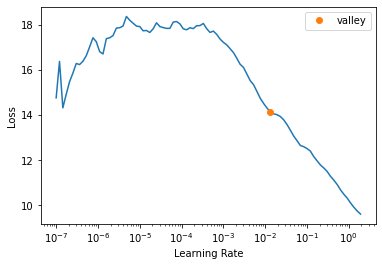

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.29       0.29
1   -0.23      -0.25
2    1.77       1.75
3   -0.29      -0.29
4   -0.28      -0.27
XGBoost RMSE:  0.3115951


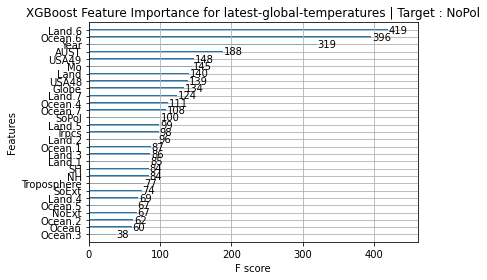

Target Variable: Ocean.5
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:14,  2.78it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9542903936380747, 'Adjusted R-Squared': 0.9508827366085224, 'RMSE': 0.08573884123117555, 'Time taken': 0.35962653160095215}


 10%|▉         | 4/42 [00:00<00:05,  6.45it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9937264011774144, 'Adjusted R-Squared': 0.9932587035788155, 'RMSE': 0.031763784489498965, 'Time taken': 0.21004676818847656}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999051261609874, 'Adjusted R-Squared': 0.9998980533040944, 'RMSE': 0.0039061337171474816, 'Time taken': 0.036644697189331055}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9833226408199014, 'Adjusted R-Squared': 0.9820793415494056, 'RMSE': 0.0517889982007347, 'Time taken': 0.13320469856262207}
{'Model': 'DummyRegressor', 'R-Squared': -0.0007336912432398535, 'Adjusted R-Squared': -0.07533851655443247, 'RMSE': 0.40117434, 'Time taken': 0.011701107025146484}
{'Model': 'ElasticNet', 'R-Squared': -0.0007336912432398535, 'Adjusted R-Squared': -0.07533851655443247, 'RMSE': 0.40117434, 'Time taken': 0.01345205307006836}


 17%|█▋        | 7/42 [00:00<00:03,  9.72it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9996291872321716, 'Adjusted R-Squared': 0.9996015430926677, 'RMSE': 0.007722381, 'Time taken': 0.16613030433654785}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9666141173669497, 'Adjusted R-Squared': 0.9641251955254112, 'RMSE': 0.07327491109694004, 'Time taken': 0.06902432441711426}


 21%|██▏       | 9/42 [00:02<00:09,  3.56it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9940341142029351, 'Adjusted R-Squared': 0.9935893566499405, 'RMSE': 0.03097500155252543, 'Time taken': 1.1450202465057373}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.01it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.2679447646297738, 'Adjusted R-Squared': 0.2133699527384202, 'RMSE': 0.34311981137217484, 'Time taken': 0.36141490936279297}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8835078349616551, 'Adjusted R-Squared': 0.8748233290847605, 'RMSE': 0.13687439969311255, 'Time taken': 0.05706357955932617}


 31%|███       | 13/42 [00:03<00:09,  3.06it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9951624031736814, 'Adjusted R-Squared': 0.9948017597084803, 'RMSE': 0.02789258109229001, 'Time taken': 0.9170827865600586}


 33%|███▎      | 14/42 [00:04<00:10,  2.62it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9899278007259094, 'Adjusted R-Squared': 0.9891769169753988, 'RMSE': 0.04024723261451784, 'Time taken': 0.6191220283508301}


 38%|███▊      | 16/42 [00:04<00:07,  3.38it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999051979358284, 'Adjusted R-Squared': 0.9998981304297591, 'RMSE': 0.0039046558852421005, 'Time taken': 0.23425865173339844}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8692308066526688, 'Adjusted R-Squared': 0.8594819464802457, 'RMSE': 0.14501956, 'Time taken': 0.11135601997375488}


 45%|████▌     | 19/42 [00:04<00:04,  5.26it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.998061121052448, 'Adjusted R-Squared': 0.9979165773776948, 'RMSE': 0.017658312, 'Time taken': 0.1747148036956787}
{'Model': 'Lars', 'R-Squared': 0.9981076547074972, 'Adjusted R-Squared': 0.997966580122709, 'RMSE': 0.017445124014190485, 'Time taken': 0.04064679145812988}
{'Model': 'LarsCV', 'R-Squared': 0.9998710165307688, 'Adjusted R-Squared': 0.9998614007965588, 'RMSE': 0.004554501987877334, 'Time taken': 0.12243962287902832}
{'Model': 'Lasso', 'R-Squared': -0.0007336912432398535, 'Adjusted R-Squared': -0.07533851655443247, 'RMSE': 0.40117434, 'Time taken': 0.023604154586791992}


 55%|█████▍    | 23/42 [00:05<00:02,  7.31it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9997232561183551, 'Adjusted R-Squared': 0.9997026248264073, 'RMSE': 0.0066713374, 'Time taken': 0.20273923873901367}
{'Model': 'LassoLars', 'R-Squared': -0.000733693153018633, 'Adjusted R-Squared': -0.07533851860658558, 'RMSE': 0.4011743245429107, 'Time taken': 0.03923630714416504}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9998922762541613, 'Adjusted R-Squared': 0.9998842454350628, 'RMSE': 0.004162263708345729, 'Time taken': 0.13868927955627441}
{'Model': 'LassoLarsIC', 'R-Squared': 0.999866073389245, 'Adjusted R-Squared': 0.999856089143199, 'RMSE': 0.004640954474672911, 'Time taken': 0.03742218017578125}
{'Model': 'LinearRegression', 'R-Squared': 0.9999050660367912, 'Adjusted R-Squared': 0.9998979886976317, 'RMSE': 0.0039073713, 'Time taken': 0.01737070083618164}


 62%|██████▏   | 26/42 [00:05<00:02,  7.06it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9997112353872651, 'Adjusted R-Squared': 0.9996897079482695, 'RMSE': 0.0068146860736110195, 'Time taken': 0.38638877868652344}


 64%|██████▍   | 27/42 [00:06<00:03,  4.27it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9778176018683409, 'Adjusted R-Squared': 0.9761639012364177, 'RMSE': 0.059728019852057855, 'Time taken': 0.687218189239502}


 79%|███████▊  | 33/42 [00:08<00:02,  3.36it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9702142676958366, 'Adjusted R-Squared': 0.9679937375240609, 'RMSE': 0.06921145989902824, 'Time taken': 2.49998140335083}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9907006339103775, 'Adjusted R-Squared': 0.9900073649731049, 'RMSE': 0.03867234803347816, 'Time taken': 0.015565156936645508}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9983185155993639, 'Adjusted R-Squared': 0.9981931607211674, 'RMSE': 0.016444485505510302, 'Time taken': 0.03778386116027832}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9933871641027321, 'Adjusted R-Squared': 0.9928941763366118, 'RMSE': 0.03261127222685334, 'Time taken': 0.022718429565429688}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999054051051943, 'Adjusted R-Squared': 0.9998983530436278, 'RMSE': 0.003900387, 'Time taken': 0.0414888858795166}


 83%|████████▎ | 35/42 [00:11<00:03,  2.09it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9949844509035408, 'Adjusted R-Squared': 0.9946105410737277, 'RMSE': 0.02840096600786076, 'Time taken': 2.021347999572754}
{'Model': 'Ridge', 'R-Squared': 0.9998682640520914, 'Adjusted R-Squared': 0.9998584431202422, 'RMSE': 0.0046028416, 'Time taken': 0.014252424240112305}
{'Model': 'RidgeCV', 'R-Squared': 0.999905201846954, 'Adjusted R-Squared': 0.9998981346324596, 'RMSE': 0.003904575339754937, 'Time taken': 0.046652793884277344}
{'Model': 'SGDRegressor', 'R-Squared': 0.9983783726929681, 'Adjusted R-Squared': 0.9982574801687936, 'RMSE': 0.016149139776184714, 'Time taken': 0.05141925811767578}


 90%|█████████ | 38/42 [00:11<00:01,  2.96it/s]

{'Model': 'SVR', 'R-Squared': 0.9344170149379911, 'Adjusted R-Squared': 0.9295277949719287, 'RMSE': 0.1026997671815915, 'Time taken': 0.12400150299072266}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999050660367912, 'Adjusted R-Squared': 0.9998979886976317, 'RMSE': 0.0039073713, 'Time taken': 0.020018339157104492}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8835078349616551, 'Adjusted R-Squared': 0.8748233290847605, 'RMSE': 0.13687439969311255, 'Time taken': 0.02700209617614746}


 98%|█████████▊| 41/42 [00:11<00:00,  3.42it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9949568085177907, 'Adjusted R-Squared': 0.9945808379445669, 'RMSE': 0.028479122, 'Time taken': 0.5599532127380371}


100%|██████████| 42/42 [00:12<00:00,  3.42it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9903219704120486, 'Adjusted R-Squared': 0.9896004720623042, 'RMSE': 0.0394518471451305, 'Time taken': 0.41359519958496094}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.5
Ocean.5
Target Standard Deviation: 0.4268159866333008
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.00        0.04
RidgeCV                                      1.00       1.00  0.00        0.05
HuberRegressor                               1.00       1.00  0.00        0.23
BayesianRidge                                1.00       1.00  0.00        0.04
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.02
LassoLarsCV                                  1.00       1.00  0.00    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.839639,0.767442,0.876037,00:01
1,2.876107,1.363882,1.167854,00:01


Better model found at epoch 0 with _rmse value: 0.8760374188423157.
No improvement since epoch 0: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean.5,Ocean.5_pred
0,33.00,6.00,4.00,-1.27,-0.64,-1.50,-0.91,-0.50,-1.11,-1.34,-0.64,-1.46,-1.43,-1.10,-1.51,-0.40,-0.26,-0.48,-0.80,-0.16,0.03,0.04,-0.00,0.12,0.29,-0.01,-0.29,-0.34,-1.12,-0.38,1.23
1,26.00,3.00,5.00,-0.24,-0.09,-0.31,-0.13,0.04,-0.22,-0.32,-0.27,-0.33,-0.89,-0.91,-0.89,0.44,0.33,0.51,0.03,0.05,2.51,2.00,2.80,-0.13,-0.12,-0.17,-0.11,0.32,0.88,0.03,-0.00
2,40.00,13.00,3.00,-0.15,-1.24,0.36,-1.05,-1.44,-0.66,0.80,-0.29,1.05,1.53,1.85,1.42,-2.20,-2.00,-2.16,0.05,-1.35,-3.32,-3.07,-3.34,-1.60,-2.11,-1.38,0.53,-0.63,1.45,0.22,2.32
3,6.00,7.00,5.00,-0.12,-0.12,-0.12,0.01,-0.23,0.20,-0.24,0.17,-0.33,0.05,0.00,0.07,-0.04,-0.26,0.20,-0.31,0.20,0.03,-0.12,0.15,0.26,0.20,0.31,0.26,0.22,0.64,-0.17,0.23
4,25.00,5.00,4.00,-0.50,0.21,-0.82,-0.21,0.57,-0.77,-0.69,-0.58,-0.68,-0.78,-0.64,-0.83,0.23,0.78,-0.39,-0.42,-0.32,0.14,0.37,-0.08,-0.44,-0.34,-0.55,0.39,0.35,0.16,-0.16,-0.22
5,29.00,2.00,2.00,0.17,-0.03,0.27,-0.16,-0.25,-0.05,0.46,0.41,0.44,0.44,0.36,0.46,-0.42,-0.35,-0.43,0.28,0.26,0.28,0.21,0.33,0.19,0.31,0.10,-0.62,-0.62,-0.53,0.13,0.09
6,30.00,2.00,4.00,0.27,0.18,0.27,0.20,-0.08,0.39,0.27,0.66,0.13,0.42,0.34,0.44,0.03,-0.13,0.20,0.07,0.47,-0.33,-0.23,-0.40,0.37,0.38,0.38,0.60,0.48,0.15,0.00,0.11
7,17.00,6.00,2.00,-1.21,-1.59,-0.92,-1.77,-2.08,-1.38,-0.32,0.02,-0.39,-0.37,-0.21,-0.42,-2.06,-2.15,-1.75,-0.22,-0.02,-1.12,-1.23,-0.96,0.56,0.43,0.69,0.09,-0.46,-0.45,-0.10,-0.63
8,16.00,9.00,2.00,0.04,0.18,-0.02,0.01,-0.01,0.03,0.04,0.46,-0.07,-0.48,-0.74,-0.40,0.25,0.18,0.32,0.34,0.93,0.15,0.10,0.18,0.74,1.00,0.62,-0.20,-0.27,-0.03,0.08,-0.06


<Figure size 432x288 with 0 Axes>

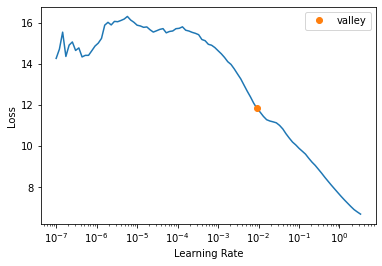

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.08      -0.09
1   -0.20      -0.22
2   -0.21      -0.22
3    0.29       0.32
4    0.74       0.81
XGBoost RMSE:  0.028565962


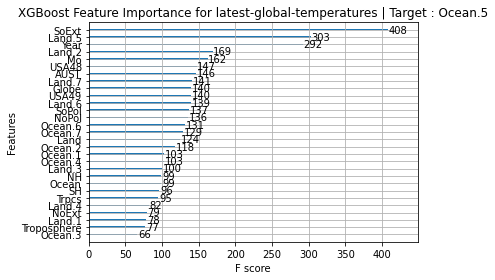

Target Variable: Land.5
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.59it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9353520327633613, 'Adjusted R-Squared': 0.9305325184963625, 'RMSE': 0.1603283660833657, 'Time taken': 0.3857419490814209}


 10%|▉         | 4/42 [00:00<00:05,  6.50it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9725026493086807, 'Adjusted R-Squared': 0.970452718280279, 'RMSE': 0.1045630773059371, 'Time taken': 0.2252659797668457}
{'Model': 'BayesianRidge', 'R-Squared': 0.9996890992998161, 'Adjusted R-Squared': 0.9996659216126559, 'RMSE': 0.011118438032143114, 'Time taken': 0.030335664749145508}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9241491103045483, 'Adjusted R-Squared': 0.9184944167282807, 'RMSE': 0.1736653873964824, 'Time taken': 0.11114072799682617}
{'Model': 'DummyRegressor', 'R-Squared': -0.005822738456488619, 'Adjusted R-Squared': -0.08080695289154805, 'RMSE': 0.6324026, 'Time taken': 0.019812822341918945}
{'Model': 'ElasticNet', 'R-Squared': 0.3486284466244003, 'Adjusted R-Squared': 0.30006861359639936, 'RMSE': 0.5089174, 'Time taken': 0.013937234878540039}


 17%|█▋        | 7/42 [00:01<00:04,  8.69it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9962151210699486, 'Adjusted R-Squared': 0.995932957859225, 'RMSE': 0.038793497, 'Time taken': 0.2210707664489746}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9382155802665041, 'Adjusted R-Squared': 0.9336095438339298, 'RMSE': 0.15673731975324623, 'Time taken': 0.06914925575256348}


 21%|██▏       | 9/42 [00:02<00:08,  3.78it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9827872293408908, 'Adjusted R-Squared': 0.9815040150758159, 'RMSE': 0.08272910405287286, 'Time taken': 1.0067808628082275}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.14it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3290353328843111, 'Adjusted R-Squared': 0.27901483070859134, 'RMSE': 0.5165147823518861, 'Time taken': 0.3811063766479492}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.899472679097143, 'Adjusted R-Squared': 0.8919783544025855, 'RMSE': 0.1999286272862794, 'Time taken': 0.0644221305847168}


 31%|███       | 13/42 [00:03<00:10,  2.88it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9828216846698686, 'Adjusted R-Squared': 0.9815410390539977, 'RMSE': 0.08264626188746525, 'Time taken': 1.066929817199707}


 33%|███▎      | 14/42 [00:04<00:12,  2.24it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9772011586504388, 'Adjusted R-Squared': 0.9755015020973866, 'RMSE': 0.09521148044678705, 'Time taken': 0.8743982315063477}


 38%|███▊      | 16/42 [00:04<00:08,  3.04it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9996045708758804, 'Adjusted R-Squared': 0.9995750915838509, 'RMSE': 0.012539125705523948, 'Time taken': 0.20656037330627441}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.871904610023087, 'Adjusted R-Squared': 0.862355082235605, 'RMSE': 0.22568344, 'Time taken': 0.10389828681945801}


 40%|████      | 17/42 [00:04<00:07,  3.52it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.997711057897119, 'Adjusted R-Squared': 0.9975404169691408, 'RMSE': 0.030168265, 'Time taken': 0.1457233428955078}
{'Model': 'Lars', 'R-Squared': -5083.928548227409, 'Adjusted R-Squared': -5463.01062508755, 'RMSE': 44.96507863108554, 'Time taken': 0.07500672340393066}


 45%|████▌     | 19/42 [00:05<00:04,  4.64it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9868500106564082, 'Adjusted R-Squared': 0.9858696772606135, 'RMSE': 0.07230954524814542, 'Time taken': 0.16120481491088867}
{'Model': 'Lasso', 'R-Squared': -0.005822738456488619, 'Adjusted R-Squared': -0.08080695289154805, 'RMSE': 0.6324026, 'Time taken': 0.03523755073547363}


 50%|█████     | 21/42 [00:05<00:04,  5.00it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9965374160222203, 'Adjusted R-Squared': 0.9962792799416147, 'RMSE': 0.037105057, 'Time taken': 0.3084218502044678}
{'Model': 'LassoLars', 'R-Squared': -0.005822740476082888, 'Adjusted R-Squared': -0.08080695506170343, 'RMSE': 0.632402611942657, 'Time taken': 0.025505781173706055}
{'Model': 'LassoLarsCV', 'R-Squared': 0.999691802624318, 'Adjusted R-Squared': 0.9996688264703468, 'RMSE': 0.011069994319350398, 'Time taken': 0.16987872123718262}


 55%|█████▍    | 23/42 [00:05<00:03,  6.06it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9945780712534965, 'Adjusted R-Squared': 0.9941738657685386, 'RMSE': 0.04643119195736333, 'Time taken': 0.038434743881225586}
{'Model': 'LinearRegression', 'R-Squared': 0.9996887987409856, 'Adjusted R-Squared': 0.9996655986471259, 'RMSE': 0.011123811, 'Time taken': 0.023612260818481445}


 62%|██████▏   | 26/42 [00:06<00:02,  6.34it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.999512988223043, 'Adjusted R-Squared': 0.9994766814324729, 'RMSE': 0.013915623230335648, 'Time taken': 0.3779110908508301}


 64%|██████▍   | 27/42 [00:07<00:04,  3.63it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9883057504427938, 'Adjusted R-Squared': 0.9874339426351871, 'RMSE': 0.0681897516293869, 'Time taken': 0.8498053550720215}


 79%|███████▊  | 33/42 [00:07<00:01,  5.76it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9724051902291092, 'Adjusted R-Squared': 0.9703479936137985, 'RMSE': 0.10474821527935908, 'Time taken': 0.7978224754333496}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9506450368683262, 'Adjusted R-Squared': 0.9469656180230344, 'RMSE': 0.14008716479574085, 'Time taken': 0.016408681869506836}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9912864585126457, 'Adjusted R-Squared': 0.990636862874771, 'RMSE': 0.05886135853427296, 'Time taken': 0.03759598731994629}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9950841231397919, 'Adjusted R-Squared': 0.9947176438880025, 'RMSE': 0.044211314497312804, 'Time taken': 0.024839401245117188}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9996885310481494, 'Adjusted R-Squared': 0.9996653109977544, 'RMSE': 0.011128594, 'Time taken': 0.03903388977050781}


 88%|████████▊ | 37/42 [00:10<00:01,  3.19it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9792657380905182, 'Adjusted R-Squared': 0.9777199962000941, 'RMSE': 0.09079819599140851, 'Time taken': 2.195700168609619}
{'Model': 'Ridge', 'R-Squared': 0.9990299371721745, 'Adjusted R-Squared': 0.9989576188636733, 'RMSE': 0.019639611, 'Time taken': 0.02282857894897461}
{'Model': 'RidgeCV', 'R-Squared': 0.9996853191045678, 'Adjusted R-Squared': 0.999661859603366, 'RMSE': 0.011185827521326106, 'Time taken': 0.0464787483215332}
{'Model': 'SGDRegressor', 'R-Squared': 0.9916661600584324, 'Adjusted R-Squared': 0.9910448712196009, 'RMSE': 0.05756460215042532, 'Time taken': 0.0517423152923584}


 93%|█████████▎| 39/42 [00:10<00:00,  3.91it/s]

{'Model': 'SVR', 'R-Squared': 0.9601968402447336, 'Adjusted R-Squared': 0.9572295095688912, 'RMSE': 0.12580320477599896, 'Time taken': 0.18296051025390625}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9996887987409856, 'Adjusted R-Squared': 0.9996655986471259, 'RMSE': 0.011123811, 'Time taken': 0.015317440032958984}
{'Model': 'TweedieRegressor', 'R-Squared': 0.899472679097143, 'Adjusted R-Squared': 0.8919783544025855, 'RMSE': 0.1999286272862794, 'Time taken': 0.03958392143249512}


 98%|█████████▊| 41/42 [00:11<00:00,  3.74it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9809765467224023, 'Adjusted R-Squared': 0.9795583458353835, 'RMSE': 0.08697163, 'Time taken': 0.5510425567626953}


100%|██████████| 42/42 [00:11<00:00,  3.66it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9744201344855775, 'Adjusted R-Squared': 0.9725131522235768, 'RMSE': 0.10085142946452484, 'Time taken': 0.36301541328430176}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.5
Land.5
Target Standard Deviation: 0.7439585328102112
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LassoLarsCV                                  1.00       1.00  0.01        0.17
BayesianRidge                                1.00       1.00  0.01        0.03
TransformedTargetRegressor                   1.00       1.00  0.01        0.02
LinearRegression                             1.00       1.00  0.01        0.02
RANSACRegressor                              1.00       1.00  0.01        0.04
RidgeCV                                      1.00       1.00  0.01        0.05
HuberRegressor                               1.00       1.00  0.01     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2.884958,1.072025,1.035387,00:01
1,1.852694,0.548496,0.740605,00:01
2,1.174476,0.207040,0.455017,00:01
3,0.832580,0.397635,0.630583,00:01


Better model found at epoch 0 with _rmse value: 1.035386562347412.
Better model found at epoch 1 with _rmse value: 0.7406051754951477.
Better model found at epoch 2 with _rmse value: 0.45501670241355896.
No improvement since epoch 2: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land.5,Land.5_pred
0,45.00,8.00,5.00,0.35,0.35,0.28,0.24,0.27,0.18,0.34,0.36,0.32,0.23,0.39,0.19,0.19,0.22,0.16,0.29,0.29,0.19,0.30,0.09,-0.14,0.19,-0.39,0.07,0.15,-0.31,0.18,0.06
1,19.00,2.00,5.00,-0.76,-0.23,-0.96,-0.49,0.03,-0.86,-0.81,-0.68,-0.83,-0.40,-0.28,-0.42,-0.41,0.12,-0.93,-0.81,-0.80,0.57,0.81,0.32,-0.26,-0.30,-0.27,-0.68,-0.14,-0.94,-0.47,-0.19
2,37.00,7.00,3.00,-0.35,0.17,-0.54,0.22,0.11,0.26,-0.81,0.20,-1.09,0.32,0.41,0.29,0.12,0.01,0.24,-1.24,-1.53,-0.31,-0.40,-0.20,-0.53,-0.25,-0.79,0.14,0.14,0.39,0.03,-0.06
3,4.00,4.00,2.00,-1.23,-1.38,-1.08,-1.29,-1.23,-1.24,-0.87,-1.11,-0.77,-0.78,-0.91,-0.74,-1.31,-1.13,-1.32,-0.61,-0.52,-0.39,-0.35,-0.39,-0.39,-0.75,-0.18,-0.99,-0.57,0.37,-0.59,-0.25
4,43.00,2.00,2.00,0.44,0.96,0.16,0.93,1.20,0.64,-0.19,0.06,-0.25,-0.44,-0.32,-0.49,1.48,1.37,1.42,0.07,-0.02,0.79,0.78,0.74,0.02,0.29,-0.18,0.74,0.93,0.43,0.26,0.10
5,39.00,6.00,2.00,0.35,0.54,0.22,0.19,0.20,0.15,0.40,1.00,0.21,0.07,0.05,0.08,0.27,0.27,0.21,0.40,0.19,0.19,0.37,0.01,0.48,0.84,0.26,-0.31,0.02,0.56,0.76,0.33
6,21.00,5.00,2.00,-0.69,-1.14,-0.42,-1.34,-1.71,-0.91,0.14,0.46,0.06,-0.34,-0.28,-0.36,-1.57,-1.83,-1.15,0.36,0.24,-0.20,-0.43,0.03,0.43,0.60,0.32,-0.78,-0.84,0.50,0.50,0.23
7,43.00,6.00,3.00,-0.41,-0.69,-0.26,-0.85,-0.83,-0.78,0.14,-0.11,0.21,-0.17,-0.03,-0.21,-1.02,-0.90,-1.00,0.25,0.33,-0.22,-0.13,-0.28,0.03,-0.20,0.19,-1.96,-1.69,0.63,-0.06,-0.16
8,19.00,10.00,5.00,-0.57,-0.69,-0.45,-0.49,-0.54,-0.42,-0.47,-0.68,-0.40,-0.25,-0.34,-0.23,-0.48,-0.50,-0.41,-0.47,-0.40,-0.22,-0.20,-0.24,-0.56,-0.54,-0.64,-0.85,-0.83,-0.33,-0.45,-0.32


<Figure size 432x288 with 0 Axes>

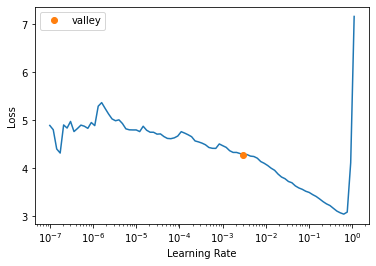

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    1.83       1.90
1   -0.20      -0.19
2   -1.02      -0.97
3   -0.25      -0.12
4    0.52       0.50
XGBoost RMSE:  0.08716929


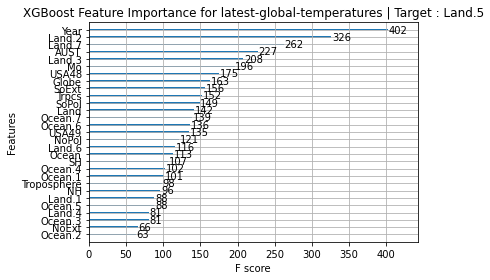

Target Variable: SoExt
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:16,  2.56it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9593187863521406, 'Adjusted R-Squared': 0.956285996645745, 'RMSE': 0.08030088308081491, 'Time taken': 0.3905308246612549}


 12%|█▏        | 5/42 [00:00<00:03,  9.38it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9929326232518881, 'Adjusted R-Squared': 0.9924057494069132, 'RMSE': 0.033469751859535914, 'Time taken': 0.20792889595031738}
{'Model': 'BayesianRidge', 'R-Squared': 0.999913075327649, 'Adjusted R-Squared': 0.9999065950821523, 'RMSE': 0.003711888328571298, 'Time taken': 0.018671751022338867}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9849309303217173, 'Adjusted R-Squared': 0.9838075292403029, 'RMSE': 0.04887272913293818, 'Time taken': 0.0711517333984375}
{'Model': 'DummyRegressor', 'R-Squared': -0.00016219473951828434, 'Adjusted R-Squared': -0.07472441491290138, 'RMSE': 0.39816087, 'Time taken': 0.01819133758544922}
{'Model': 'ElasticNet', 'R-Squared': -0.00016219473951828434, 'Adjusted R-Squared': -0.07472441491290138, 'RMSE': 0.39816087, 'Time taken': 0.019209861755371094}


 17%|█▋        | 7/42 [00:00<00:03,  9.47it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999011269802015, 'Adjusted R-Squared': 0.9998937559838669, 'RMSE': 0.0039587882, 'Time taken': 0.18737053871154785}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.961702449789409, 'Adjusted R-Squared': 0.9588473624986451, 'RMSE': 0.0779128100250821, 'Time taken': 0.07228279113769531}


 21%|██▏       | 9/42 [00:01<00:08,  3.99it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9973973719851563, 'Adjusted R-Squared': 0.9972033457321217, 'RMSE': 0.020310911836552887, 'Time taken': 0.9276423454284668}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:06,  4.47it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.29922536543403255, 'Adjusted R-Squared': 0.24698252635327922, 'RMSE': 0.3332825363612667, 'Time taken': 0.3372523784637451}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9446948896486674, 'Adjusted R-Squared': 0.9405718865633496, 'RMSE': 0.0936280552008208, 'Time taken': 0.06431770324707031}


 31%|███       | 13/42 [00:03<00:09,  2.96it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9978509583404016, 'Adjusted R-Squared': 0.9976907470084521, 'RMSE': 0.018456348755948877, 'Time taken': 1.0739552974700928}


 36%|███▌      | 15/42 [00:04<00:09,  2.84it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9958108853482232, 'Adjusted R-Squared': 0.9954985863124866, 'RMSE': 0.025768224425171474, 'Time taken': 0.6505577564239502}
{'Model': 'HuberRegressor', 'R-Squared': 0.9999108697792601, 'Adjusted R-Squared': 0.9999042251098477, 'RMSE': 0.003758684404171168, 'Time taken': 0.18360280990600586}


 40%|████      | 17/42 [00:04<00:06,  3.67it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8962077567815538, 'Adjusted R-Squared': 0.8884700317087134, 'RMSE': 0.12826431, 'Time taken': 0.14964938163757324}
{'Model': 'KernelRidge', 'R-Squared': 0.9986998201848596, 'Adjusted R-Squared': 0.9986028916125227, 'RMSE': 0.014355724, 'Time taken': 0.16895675659179688}


 45%|████▌     | 19/42 [00:04<00:04,  5.10it/s]

{'Model': 'Lars', 'R-Squared': 0.9619539374827372, 'Adjusted R-Squared': 0.9591175986318359, 'RMSE': 0.07765657449727457, 'Time taken': 0.06307744979858398}
{'Model': 'LarsCV', 'R-Squared': 0.9999040988931106, 'Adjusted R-Squared': 0.9998969494532653, 'RMSE': 0.003898837915180045, 'Time taken': 0.11376547813415527}
{'Model': 'Lasso', 'R-Squared': -0.00016219473951828434, 'Adjusted R-Squared': -0.07472441491290138, 'RMSE': 0.39816087, 'Time taken': 0.017843246459960938}


 55%|█████▍    | 23/42 [00:05<00:02,  7.51it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9999043565653962, 'Adjusted R-Squared': 0.999897226335053, 'RMSE': 0.0038935966, 'Time taken': 0.18865609169006348}
{'Model': 'LassoLars', 'R-Squared': -0.0001621897187469301, 'Adjusted R-Squared': -0.07472440951783077, 'RMSE': 0.3981608795405495, 'Time taken': 0.028944015502929688}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9999039249884545, 'Adjusted R-Squared': 0.9998967625839948, 'RMSE': 0.0039023713413731047, 'Time taken': 0.12465047836303711}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9998984386892886, 'Adjusted R-Squared': 0.9998908672805209, 'RMSE': 0.004012245692227231, 'Time taken': 0.03709077835083008}
{'Model': 'LinearRegression', 'R-Squared': 0.9999131028523145, 'Adjusted R-Squared': 0.9999066246587852, 'RMSE': 0.0037113004, 'Time taken': 0.029781341552734375}


 62%|██████▏   | 26/42 [00:05<00:02,  7.01it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9998341207841909, 'Adjusted R-Squared': 0.999821754467331, 'RMSE': 0.00512766161767799, 'Time taken': 0.3963615894317627}


 64%|██████▍   | 27/42 [00:06<00:03,  4.58it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9672388810361, 'Adjusted R-Squared': 0.9647965354064005, 'RMSE': 0.07206140647146277, 'Time taken': 0.5874454975128174}


 79%|███████▊  | 33/42 [00:09<00:03,  2.79it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9771333213662831, 'Adjusted R-Squared': 0.9754286075349777, 'RMSE': 0.06020394010895752, 'Time taken': 3.3185017108917236}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9915572235711422, 'Adjusted R-Squared': 0.990927813503181, 'RMSE': 0.0365818795455794, 'Time taken': 0.017138957977294922}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9996229243833898, 'Adjusted R-Squared': 0.9995948133477043, 'RMSE': 0.007731034224483438, 'Time taken': 0.03624534606933594}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9945890059984422, 'Adjusted R-Squared': 0.9941856157001256, 'RMSE': 0.02928612401770497, 'Time taken': 0.022649526596069336}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999130328045929, 'Adjusted R-Squared': 0.9999065493889969, 'RMSE': 0.0037127961, 'Time taken': 0.036550283432006836}


 88%|████████▊ | 37/42 [00:11<00:01,  2.51it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9943553519769155, 'Adjusted R-Squared': 0.9939345427412614, 'RMSE': 0.02991174873878831, 'Time taken': 2.009603500366211}
{'Model': 'Ridge', 'R-Squared': 0.9998872831125892, 'Adjusted R-Squared': 0.9998788800541447, 'RMSE': 0.00422686, 'Time taken': 0.014801740646362305}
{'Model': 'RidgeCV', 'R-Squared': 0.9999117839896674, 'Adjusted R-Squared': 0.9999052074747583, 'RMSE': 0.0037393582697946215, 'Time taken': 0.05197024345397949}
{'Model': 'SGDRegressor', 'R-Squared': 0.9992190749507378, 'Adjusted R-Squared': 0.9991608568879393, 'RMSE': 0.011125717997658397, 'Time taken': 0.05090522766113281}


 93%|█████████▎| 39/42 [00:11<00:00,  3.23it/s]

{'Model': 'SVR', 'R-Squared': 0.9601024129404859, 'Adjusted R-Squared': 0.9571280426969746, 'RMSE': 0.07952371980371961, 'Time taken': 0.12750458717346191}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999131028523145, 'Adjusted R-Squared': 0.9999066246587852, 'RMSE': 0.0037113004, 'Time taken': 0.015724658966064453}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9446948896486674, 'Adjusted R-Squared': 0.9405718865633496, 'RMSE': 0.0936280552008208, 'Time taken': 0.05429506301879883}


 98%|█████████▊| 41/42 [00:12<00:00,  3.17it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9964077284704277, 'Adjusted R-Squared': 0.9961399241661665, 'RMSE': 0.023862062, 'Time taken': 0.6019694805145264}


100%|██████████| 42/42 [00:12<00:00,  3.25it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.994871154285647, 'Adjusted R-Squared': 0.9944887981784073, 'RMSE': 0.028512361476160146, 'Time taken': 0.3733689785003662}
Project: latest-global-temperatures
latest-global-temperatures
Target: SoExt
SoExt
Target Standard Deviation: 0.4492885172367096
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.03
BayesianRidge                                1.00       1.00  0.00        0.02
RANSACRegressor                              1.00       1.00  0.00        0.04
RidgeCV                                      1.00       1.00  0.00        0.05
HuberRegressor                               1.00       1.00  0.00        0.18
LassoCV                                      1.00       1.00  0.00        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.577195,1.758610,1.326126,00:01
1,2.780482,0.329351,0.573891,00:01
2,1.772632,0.190438,0.436392,00:01
3,1.088349,0.115068,0.339217,00:01
4,0.694863,0.086434,0.293996,00:01
5,0.469796,0.067880,0.260538,00:01
6,0.323405,0.057791,0.240397,00:01
7,0.239072,0.053774,0.231893,00:01
8,0.182972,0.028618,0.169169,00:01
9,0.139691,0.023722,0.154018,00:01


Better model found at epoch 0 with _rmse value: 1.326125979423523.
Better model found at epoch 1 with _rmse value: 0.573890745639801.
Better model found at epoch 2 with _rmse value: 0.43639227747917175.
Better model found at epoch 3 with _rmse value: 0.33921653032302856.
Better model found at epoch 4 with _rmse value: 0.29399630427360535.
Better model found at epoch 5 with _rmse value: 0.2605378329753876.
Better model found at epoch 6 with _rmse value: 0.24039706587791443.
Better model found at epoch 7 with _rmse value: 0.23189276456832886.
Better model found at epoch 8 with _rmse value: 0.1691685914993286.
Better model found at epoch 9 with _rmse value: 0.1540178805589676.
Better model found at epoch 10 with _rmse value: 0.1528143733739853.
Better model found at epoch 11 with _rmse value: 0.1328905075788498.
No improvement since epoch 11: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,SoExt,SoExt_pred
0,39.00,6.00,2.00,0.34,0.55,0.21,0.19,0.20,0.15,0.38,1.02,0.19,0.05,0.04,0.07,0.27,0.27,0.21,1.03,0.17,0.20,0.38,0.03,0.51,0.88,0.28,-0.29,0.04,0.57,0.19,0.07
1,18.00,8.00,5.00,-0.63,-0.84,-0.52,-0.95,-1.09,-0.77,-0.15,-0.01,-0.18,0.01,0.00,0.01,-1.29,-1.21,-1.25,-0.02,-0.24,-0.70,-0.81,-0.57,-0.01,-0.02,-0.02,-0.40,-0.63,0.05,-0.08,-0.09
2,4.00,10.00,3.00,2.31,2.25,2.19,2.63,2.33,2.61,1.41,1.08,1.41,1.22,1.26,1.19,2.84,2.26,3.13,0.67,1.05,0.84,0.77,0.86,-0.18,-0.22,-0.18,0.59,0.70,1.94,0.47,0.44
3,7.00,13.00,4.00,-0.23,0.07,-0.33,-0.08,-0.06,-0.09,-0.31,0.26,-0.47,0.05,-0.18,0.11,-0.14,-0.01,-0.23,0.39,-0.64,-0.47,-0.36,-0.54,0.44,0.77,0.23,1.20,1.19,-1.05,-0.17,-0.09
4,24.00,2.00,3.00,-0.66,-1.27,-0.33,-1.17,-1.73,-0.63,0.02,0.19,-0.04,1.14,0.95,1.19,-2.16,-2.14,-1.94,-0.35,-0.80,1.16,0.70,1.51,-0.25,-0.44,-0.15,-2.84,-3.12,-0.90,-0.31,-0.35
5,11.00,2.00,3.00,1.06,1.58,0.74,1.60,1.97,1.18,0.27,0.19,0.27,0.47,0.58,0.43,1.85,2.04,1.46,-0.06,0.10,-0.02,0.35,-0.35,-0.23,-0.31,-0.21,1.85,2.74,0.71,0.05,0.02
6,46.00,9.00,3.00,-0.76,-0.41,-0.89,-0.08,-0.25,0.04,-1.26,-0.55,-1.41,0.47,0.31,0.51,-0.40,-0.34,-0.40,-0.79,-1.98,-0.30,-0.45,-0.15,-1.51,-1.28,-1.80,-0.12,-0.12,1.04,-0.80,-0.74
7,31.00,11.00,5.00,-0.32,-0.36,-0.30,0.30,0.01,0.47,-0.90,-0.98,-0.81,0.51,0.46,0.53,0.10,-0.09,0.29,-1.36,-1.28,0.25,0.24,0.24,-1.40,-1.48,-1.46,-0.01,0.15,-0.19,-0.61,-0.54
8,7.00,4.00,5.00,0.59,0.89,0.39,0.62,0.94,0.34,0.41,0.44,0.36,-0.09,-0.10,-0.07,0.85,1.09,0.51,0.54,0.52,-0.29,-0.05,-0.48,0.42,0.26,0.54,0.87,1.06,0.63,0.27,0.08


<Figure size 432x288 with 0 Axes>

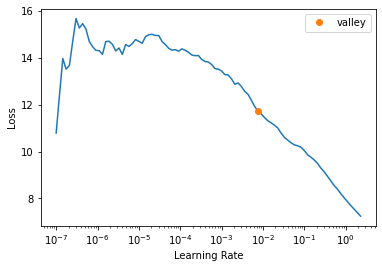

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.20       0.19
1   -0.02      -0.02
2    0.19       0.19
3   -0.13      -0.11
4   -0.19      -0.19
XGBoost RMSE:  0.023875214


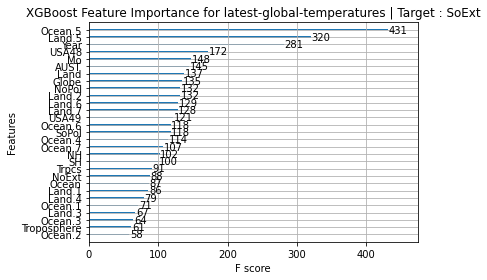

Target Variable: Ocean.4
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.73it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9076097333967021, 'Adjusted R-Squared': 0.9007220271460707, 'RMSE': 0.13441814185290374, 'Time taken': 0.36669206619262695}


 10%|▉         | 4/42 [00:00<00:05,  6.71it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9751036351472847, 'Adjusted R-Squared': 0.9732476079474679, 'RMSE': 0.06977707293502594, 'Time taken': 0.22315573692321777}
{'Model': 'BayesianRidge', 'R-Squared': 0.9998523185303164, 'Adjusted R-Squared': 0.9998413088577693, 'RMSE': 0.005374125204503787, 'Time taken': 0.03185915946960449}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9488317502749766, 'Adjusted R-Squared': 0.9450171506810803, 'RMSE': 0.10003340647151797, 'Time taken': 0.1060342788696289}
{'Model': 'DummyRegressor', 'R-Squared': -0.0026298582950095017, 'Adjusted R-Squared': -0.07737604310363477, 'RMSE': 0.4428076, 'Time taken': 0.023328304290771484}
{'Model': 'ElasticNet', 'R-Squared': -0.0026298582950095017, 'Adjusted R-Squared': -0.07737604310363477, 'RMSE': 0.4428076, 'Time taken': 0.014549016952514648}


 17%|█▋        | 7/42 [00:01<00:04,  8.00it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9990500455094379, 'Adjusted R-Squared': 0.9989792262800643, 'RMSE': 0.01363001, 'Time taken': 0.28027963638305664}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9064636881850989, 'Adjusted R-Squared': 0.8994905441166359, 'RMSE': 0.13524926017137964, 'Time taken': 0.03588604927062988}


 21%|██▏       | 9/42 [00:02<00:09,  3.31it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9730690035368337, 'Adjusted R-Squared': 0.971061294288937, 'RMSE': 0.07257231698784805, 'Time taken': 1.2137033939361572}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:08,  3.79it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.2545183805441289, 'Adjusted R-Squared': 0.19894262999343415, 'RMSE': 0.38182402145328265, 'Time taken': 0.36047911643981934}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8713377038733252, 'Adjusted R-Squared': 0.8617459131595114, 'RMSE': 0.15862455846187123, 'Time taken': 0.062432289123535156}


 31%|███       | 13/42 [00:03<00:09,  2.98it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9693751706123892, 'Adjusted R-Squared': 0.9670920856451894, 'RMSE': 0.0773894243740901, 'Time taken': 0.9045529365539551}


 36%|███▌      | 15/42 [00:04<00:09,  2.88it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.975973824701493, 'Adjusted R-Squared': 0.9741826702447919, 'RMSE': 0.06854678625105007, 'Time taken': 0.6132643222808838}
{'Model': 'HuberRegressor', 'R-Squared': 0.9998249811404605, 'Adjusted R-Squared': 0.9998119334619858, 'RMSE': 0.005850422116551913, 'Time taken': 0.19082260131835938}


 38%|███▊      | 16/42 [00:04<00:07,  3.30it/s]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8376560101618356, 'Adjusted R-Squared': 0.8255532448525637, 'RMSE': 0.1781816, 'Time taken': 0.15589308738708496}


 40%|████      | 17/42 [00:04<00:07,  3.28it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9992166446729974, 'Adjusted R-Squared': 0.9991582454326811, 'RMSE': 0.012377249, 'Time taken': 0.30600738525390625}
{'Model': 'Lars', 'R-Squared': -454.0347199122178, 'Adjusted R-Squared': -487.9576167694268, 'RMSE': 9.433373827395513, 'Time taken': 0.08945822715759277}


 45%|████▌     | 19/42 [00:05<00:05,  4.15it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9997516418087231, 'Adjusted R-Squared': 0.9997331266736408, 'RMSE': 0.00696921754982161, 'Time taken': 0.2094743251800537}
{'Model': 'Lasso', 'R-Squared': -0.0026298582950095017, 'Adjusted R-Squared': -0.07737604310363477, 'RMSE': 0.4428076, 'Time taken': 0.08115553855895996}


 50%|█████     | 21/42 [00:06<00:06,  3.20it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9993346638703828, 'Adjusted R-Squared': 0.9992850629764011, 'RMSE': 0.011406839, 'Time taken': 0.7770607471466064}
{'Model': 'LassoLars', 'R-Squared': -0.0026298689403050357, 'Adjusted R-Squared': -0.0773760545425386, 'RMSE': 0.44280763103729986, 'Time taken': 0.04442763328552246}


 55%|█████▍    | 23/42 [00:06<00:04,  4.13it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9998386559183459, 'Adjusted R-Squared': 0.9998266276963202, 'RMSE': 0.005617218236683082, 'Time taken': 0.16996407508850098}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9996766134347677, 'Adjusted R-Squared': 0.9996525049247632, 'RMSE': 0.007952538205705958, 'Time taken': 0.06928610801696777}
{'Model': 'LinearRegression', 'R-Squared': 0.9998523814546467, 'Adjusted R-Squared': 0.9998413764731165, 'RMSE': 0.00537298, 'Time taken': 0.0176241397857666}


 62%|██████▏   | 26/42 [00:06<00:03,  4.86it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9996880345186899, 'Adjusted R-Squared': 0.9996647774519599, 'RMSE': 0.007810845520739713, 'Time taken': 0.38352274894714355}


 64%|██████▍   | 27/42 [00:07<00:04,  3.69it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9777756377702342, 'Adjusted R-Squared': 0.9761188087094034, 'RMSE': 0.06592641058384752, 'Time taken': 0.5875489711761475}


 79%|███████▊  | 33/42 [00:09<00:02,  3.94it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9597992354590942, 'Adjusted R-Squared': 0.9568022632953763, 'RMSE': 0.08866698348865153, 'Time taken': 1.8254051208496094}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.927589192934271, 'Adjusted R-Squared': 0.9221909579602192, 'RMSE': 0.11899986574386717, 'Time taken': 0.015663623809814453}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9985364068371299, 'Adjusted R-Squared': 0.9984272957787154, 'RMSE': 0.016918231504465284, 'Time taken': 0.03582191467285156}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9933354279680011, 'Adjusted R-Squared': 0.9928385832663869, 'RMSE': 0.0361019707950079, 'Time taken': 0.022899389266967773}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9998524202275278, 'Adjusted R-Squared': 0.9998414181365209, 'RMSE': 0.0053722747, 'Time taken': 0.02880239486694336}


 88%|████████▊ | 37/42 [00:11<00:01,  2.85it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.970476849753313, 'Adjusted R-Squared': 0.9682758951076732, 'RMSE': 0.07598469521115403, 'Time taken': 2.1101043224334717}
{'Model': 'Ridge', 'R-Squared': 0.9997038389053635, 'Adjusted R-Squared': 0.9996817600576914, 'RMSE': 0.0076104226, 'Time taken': 0.014461278915405273}
{'Model': 'RidgeCV', 'R-Squared': 0.9998468453052032, 'Adjusted R-Squared': 0.9998354276030204, 'RMSE': 0.005472804499985244, 'Time taken': 0.05539560317993164}
{'Model': 'SGDRegressor', 'R-Squared': 0.9952772878533561, 'Adjusted R-Squared': 0.9949252090557914, 'RMSE': 0.0303906868332583, 'Time taken': 0.057796478271484375}


 93%|█████████▎| 39/42 [00:11<00:00,  3.58it/s]

{'Model': 'SVR', 'R-Squared': 0.9307833562492522, 'Adjusted R-Squared': 0.9256232465608931, 'RMSE': 0.11634562203764395, 'Time taken': 0.15524077415466309}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9998523814546467, 'Adjusted R-Squared': 0.9998413764731165, 'RMSE': 0.00537298, 'Time taken': 0.01703023910522461}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8713377038733252, 'Adjusted R-Squared': 0.8617459131595114, 'RMSE': 0.15862455846187123, 'Time taken': 0.05700516700744629}


 98%|█████████▊| 41/42 [00:12<00:00,  3.38it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.977897515037857, 'Adjusted R-Squared': 0.9762497719429929, 'RMSE': 0.06574539, 'Time taken': 0.6172821521759033}


100%|██████████| 42/42 [00:12<00:00,  3.24it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9750422698110975, 'Adjusted R-Squared': 0.9731816678175804, 'RMSE': 0.06986301436211245, 'Time taken': 0.5465278625488281}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.4
Ocean.4
Target Standard Deviation: 0.40022605657577515
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.01        0.03
LinearRegression                             1.00       1.00  0.01        0.02
TransformedTargetRegressor                   1.00       1.00  0.01        0.02
BayesianRidge                                1.00       1.00  0.01        0.03
RidgeCV                                      1.00       1.00  0.01        0.06
LassoLarsCV                                  1.00       1.00  0.01        0.17
HuberRegressor                               1.00       1.00  0.01   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,7.506077,3.157623,1.776970,00:01
1,4.262796,1.256609,1.120986,00:01
2,2.441617,0.474067,0.688525,00:01
3,1.442519,0.148855,0.385817,00:01
4,0.880843,0.095391,0.308854,00:01
5,0.555431,0.095094,0.308373,00:01
6,0.362530,0.086896,0.294781,00:01
7,0.249364,0.074711,0.273334,00:01
8,0.180331,0.078839,0.280783,00:01


Better model found at epoch 0 with _rmse value: 1.7769701480865479.
Better model found at epoch 1 with _rmse value: 1.1209858655929565.
Better model found at epoch 2 with _rmse value: 0.6885250210762024.
Better model found at epoch 3 with _rmse value: 0.38581711053848267.
Better model found at epoch 4 with _rmse value: 0.3088538348674774.
Better model found at epoch 5 with _rmse value: 0.3083731234073639.
Better model found at epoch 6 with _rmse value: 0.29478082060813904.
Better model found at epoch 7 with _rmse value: 0.27333396673202515.
No improvement since epoch 7: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean.4,Ocean.4_pred
0,11.00,7.00,2.00,-1.09,-1.05,-1.03,-0.79,-0.65,-0.82,-1.08,-1.33,-0.96,-0.77,-0.97,-0.71,-0.63,-0.50,-0.83,-0.98,-0.72,-0.27,-0.52,-0.03,-0.26,-0.72,0.02,1.22,0.99,-0.92,-0.26,-0.16
1,46.00,4.00,5.00,-0.59,-0.52,-0.60,-0.79,-0.60,-0.85,-0.26,-0.10,-0.27,-0.24,-0.12,-0.28,-0.90,-0.67,-0.16,0.02,-0.19,-0.76,-0.89,-0.59,0.18,0.18,0.18,-0.35,-0.82,-0.31,-0.41,-0.27
2,32.00,12.00,5.00,-0.20,-0.29,-0.10,-0.31,-0.08,-0.43,-0.03,-0.57,0.15,-0.45,-0.31,-0.47,-0.11,0.02,0.23,-0.52,0.43,0.19,0.20,0.18,-0.48,-0.72,-0.36,-0.06,-0.01,0.38,-0.09,-0.13
3,4.00,3.00,2.00,-1.46,-1.58,-1.33,-1.35,-1.41,-1.19,-1.17,-1.14,-1.14,-0.80,-0.54,-0.86,-1.34,-1.45,-0.97,-0.98,-0.89,-1.43,-1.78,-1.02,-0.57,-0.75,-0.51,-2.41,-2.58,-0.49,-0.42,-0.23
4,39.00,5.00,4.00,0.00,-0.01,-0.00,0.23,0.11,0.31,-0.26,-0.23,-0.24,-0.06,-0.18,-0.05,0.30,0.19,-0.23,-0.21,-0.22,0.12,0.08,0.15,-0.04,-0.21,0.05,-0.06,0.11,0.61,0.17,-0.02
5,29.00,4.00,2.00,0.73,0.88,0.60,0.94,0.88,0.87,0.29,0.47,0.24,0.34,0.39,0.32,0.99,0.86,0.21,0.34,0.14,-0.06,-0.26,0.12,0.13,0.20,0.06,1.83,1.41,0.70,0.42,0.11
6,32.00,2.00,2.00,0.93,1.49,0.56,1.02,1.59,0.50,0.56,0.64,0.51,0.95,0.63,1.05,0.84,1.65,0.09,0.33,-0.00,-0.15,0.33,-0.57,0.29,0.29,0.31,-0.03,-0.27,-0.13,-0.02,0.07
7,21.00,4.00,3.00,-0.36,1.19,-1.07,0.80,2.01,-0.17,-1.49,-1.03,-1.56,-1.29,-1.23,-1.29,1.73,2.54,-0.97,-0.52,-1.04,0.02,0.83,-0.72,-0.31,-0.27,-0.37,2.12,2.22,-0.58,0.30,0.09
8,7.00,10.00,2.00,-1.59,-1.60,-1.47,-1.21,-0.82,-1.36,-1.52,-2.34,-1.20,-1.05,-1.27,-0.99,-1.09,-0.72,-1.14,-1.82,-0.82,-0.72,-0.51,-0.88,-0.69,-1.25,-0.37,-0.64,-0.49,-2.64,-0.54,-0.26


<Figure size 432x288 with 0 Axes>

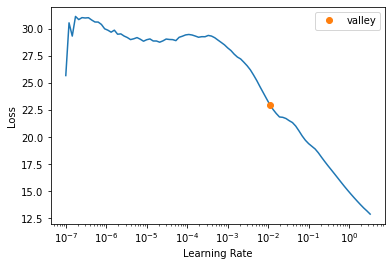

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.26       0.26
1   -0.09      -0.10
2   -0.22      -0.20
3   -0.19      -0.20
4    0.55       0.38
XGBoost RMSE:  0.06565381


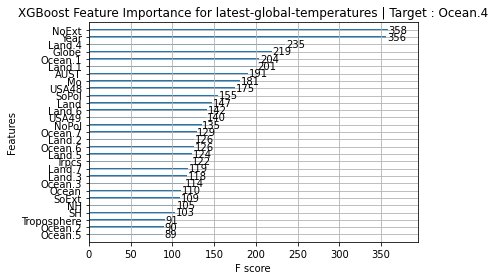

Target Variable: Land.4
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:14,  2.79it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9578544918606315, 'Adjusted R-Squared': 0.9547125388116812, 'RMSE': 0.09696622535861378, 'Time taken': 0.3584480285644531}


 10%|▉         | 4/42 [00:00<00:05,  6.90it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9912385399159596, 'Adjusted R-Squared': 0.9905853719405426, 'RMSE': 0.044211279737046257, 'Time taken': 0.2095487117767334}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999215691248613, 'Adjusted R-Squared': 0.9999157220930386, 'RMSE': 0.004183004899441507, 'Time taken': 0.031224966049194336}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9817248725177994, 'Adjusted R-Squared': 0.9803624594150132, 'RMSE': 0.06385208018703835, 'Time taken': 0.10690784454345703}
{'Model': 'DummyRegressor', 'R-Squared': -0.00010106663193987231, 'Adjusted R-Squared': -0.07465872969704579, 'RMSE': 0.47235313, 'Time taken': 0.01868414878845215}
{'Model': 'ElasticNet', 'R-Squared': -0.00010106663193987231, 'Adjusted R-Squared': -0.07465872969704579, 'RMSE': 0.47235313, 'Time taken': 0.01690959930419922}


 17%|█▋        | 7/42 [00:01<00:04,  8.46it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9995436512124709, 'Adjusted R-Squared': 0.9995096303517039, 'RMSE': 0.010090049, 'Time taken': 0.25744128227233887}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9487220183740132, 'Adjusted R-Squared': 0.9448992382527956, 'RMSE': 0.10695726867527872, 'Time taken': 0.03429603576660156}


 21%|██▏       | 9/42 [00:01<00:08,  3.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9926544557493888, 'Adjusted R-Squared': 0.9921068444813484, 'RMSE': 0.04048152199779085, 'Time taken': 0.9524455070495605}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.31it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3258457291775084, 'Adjusted R-Squared': 0.2755874416354718, 'RMSE': 0.38781489735927854, 'Time taken': 0.3784036636352539}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.8854349805797022, 'Adjusted R-Squared': 0.876894143656338, 'RMSE': 0.15987142989529382, 'Time taken': 0.0640408992767334}


 31%|███       | 13/42 [00:03<00:09,  3.17it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9933624527644597, 'Adjusted R-Squared': 0.9928676227648949, 'RMSE': 0.03848120429830689, 'Time taken': 0.9159817695617676}


 33%|███▎      | 14/42 [00:04<00:11,  2.38it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9872341777715851, 'Adjusted R-Squared': 0.9862824840836055, 'RMSE': 0.05336656366236694, 'Time taken': 0.8726787567138672}


 38%|███▊      | 16/42 [00:04<00:08,  2.97it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999177011238909, 'Adjusted R-Squared': 0.9999115657320987, 'RMSE': 0.004284910893402239, 'Time taken': 0.291431188583374}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8534043925252357, 'Adjusted R-Squared': 0.8424756711453689, 'RMSE': 0.18084452, 'Time taken': 0.1484065055847168}


 45%|████▌     | 19/42 [00:05<00:04,  4.82it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9997141892306072, 'Adjusted R-Squared': 0.9996928820010124, 'RMSE': 0.00798517, 'Time taken': 0.1584184169769287}
{'Model': 'Lars', 'R-Squared': -16.025433244298018, 'Adjusted R-Squared': -17.294681481019463, 'RMSE': 1.9489196251789451, 'Time taken': 0.051635026931762695}
{'Model': 'LarsCV', 'R-Squared': 0.9983311296620853, 'Adjusted R-Squared': 0.9982067151638859, 'RMSE': 0.019295504612040215, 'Time taken': 0.12236142158508301}
{'Model': 'Lasso', 'R-Squared': -0.00010106663193987231, 'Adjusted R-Squared': -0.07465872969704579, 'RMSE': 0.47235313, 'Time taken': 0.027112722396850586}


 50%|█████     | 21/42 [00:05<00:04,  4.94it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9996614342417204, 'Adjusted R-Squared': 0.9996361941209232, 'RMSE': 0.008690932, 'Time taken': 0.35543227195739746}
{'Model': 'LassoLars', 'R-Squared': -0.00010107020171989944, 'Adjusted R-Squared': -0.07465873353295338, 'RMSE': 0.4723531205246031, 'Time taken': 0.03756546974182129}


 55%|█████▍    | 23/42 [00:05<00:03,  5.79it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999209302113303, 'Adjusted R-Squared': 0.9999150355484218, 'RMSE': 0.004200008137283643, 'Time taken': 0.19334721565246582}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9986080500378921, 'Adjusted R-Squared': 0.9985042799893031, 'RMSE': 0.017622059145609315, 'Time taken': 0.04737353324890137}
{'Model': 'LinearRegression', 'R-Squared': 0.999921572286519, 'Adjusted R-Squared': 0.9999157254903983, 'RMSE': 0.004182921, 'Time taken': 0.031069517135620117}


 62%|██████▏   | 26/42 [00:06<00:02,  5.41it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.999850777708491, 'Adjusted R-Squared': 0.9998396531674787, 'RMSE': 0.0057698124335016435, 'Time taken': 0.5218362808227539}


 64%|██████▍   | 27/42 [00:06<00:03,  4.10it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9802442977312003, 'Adjusted R-Squared': 0.9787715075877679, 'RMSE': 0.06638822833206202, 'Time taken': 0.5336804389953613}


 79%|███████▊  | 33/42 [00:09<00:02,  3.40it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9492640422940261, 'Adjusted R-Squared': 0.9454816701257144, 'RMSE': 0.10639048142667085, 'Time taken': 2.423664093017578}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9974027794547369, 'Adjusted R-Squared': 0.9972091563292546, 'RMSE': 0.024071284044168775, 'Time taken': 0.01877617835998535}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9987766352359001, 'Adjusted R-Squared': 0.9986854332354916, 'RMSE': 0.016520486278987535, 'Time taken': 0.03823709487915039}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9962253811897936, 'Adjusted R-Squared': 0.9959439828723232, 'RMSE': 0.02901892985406542, 'Time taken': 0.022526979446411133}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999215466666226, 'Adjusted R-Squared': 0.9999156979605354, 'RMSE': 0.004183604, 'Time taken': 0.027668237686157227}


 88%|████████▊ | 37/42 [00:11<00:01,  2.76it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9917769550676315, 'Adjusted R-Squared': 0.9911639260109768, 'RMSE': 0.04283129194412364, 'Time taken': 2.005335569381714}
{'Model': 'Ridge', 'R-Squared': 0.9998818639811446, 'Adjusted R-Squared': 0.9998730569257545, 'RMSE': 0.0051337653, 'Time taken': 0.023850440979003906}
{'Model': 'RidgeCV', 'R-Squared': 0.9999200712030463, 'Adjusted R-Squared': 0.9999141125009597, 'RMSE': 0.004222760795920475, 'Time taken': 0.048261165618896484}
{'Model': 'SGDRegressor', 'R-Squared': 0.9987292642670733, 'Adjusted R-Squared': 0.99863453075485, 'RMSE': 0.01683730054076755, 'Time taken': 0.0496525764465332}


 93%|█████████▎| 39/42 [00:11<00:00,  3.51it/s]

{'Model': 'SVR', 'R-Squared': 0.9248196314249, 'Adjusted R-Squared': 0.9192149252843398, 'RMSE': 0.12950814059268007, 'Time taken': 0.1331031322479248}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.999921572286519, 'Adjusted R-Squared': 0.9999157254903983, 'RMSE': 0.004182921, 'Time taken': 0.015575647354125977}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8854349805797022, 'Adjusted R-Squared': 0.876894143656338, 'RMSE': 0.15987142989529382, 'Time taken': 0.05072307586669922}


 98%|█████████▊| 41/42 [00:12<00:00,  3.47it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9925149565178053, 'Adjusted R-Squared': 0.9919569455641198, 'RMSE': 0.040864106, 'Time taken': 0.5442125797271729}


100%|██████████| 42/42 [00:12<00:00,  3.34it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9872943914512813, 'Adjusted R-Squared': 0.9863471867008626, 'RMSE': 0.05324055550932018, 'Time taken': 0.3762695789337158}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.4
Land.4
Target Standard Deviation: 0.4728288948535919
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearRegression                             1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
BayesianRidge                                1.00       1.00  0.00        0.03
RANSACRegressor                              1.00       1.00  0.00        0.03
LassoLarsCV                                  1.00       1.00  0.00        0.19
RidgeCV                                      1.00       1.00  0.00        0.05
HuberRegressor                               1.00       1.00  0.00      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.695936,2.668024,1.633409,00:01
1,2.424712,1.632717,1.277778,00:01
2,1.427688,0.174197,0.417370,00:01
3,0.896243,0.136608,0.369606,00:01
4,0.559361,0.148941,0.385928,00:01


Better model found at epoch 0 with _rmse value: 1.633408546447754.
Better model found at epoch 1 with _rmse value: 1.2777782678604126.
Better model found at epoch 2 with _rmse value: 0.41736969351768494.
Better model found at epoch 3 with _rmse value: 0.3696056008338928.
No improvement since epoch 3: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land.4,Land.4_pred
0,30.00,10.00,3.00,-0.74,-0.83,-0.66,-1.37,-1.12,-1.40,0.06,0.11,0.04,-1.88,-1.90,-1.86,-0.62,-0.47,1.09,1.03,1.03,-0.25,-0.40,-0.10,0.41,0.69,0.24,-0.27,-0.42,0.41,-0.34,-0.11
1,7.00,11.00,4.00,-1.09,-1.37,-0.88,-1.26,-1.14,-1.23,-0.64,-1.17,-0.42,-0.88,-1.11,-0.80,-1.15,-1.17,-0.29,-0.84,-0.09,-0.50,-0.58,-0.39,0.01,-0.42,0.30,-0.57,-0.94,-1.41,-0.46,-0.24
2,16.00,7.00,2.00,0.52,0.54,0.49,0.24,0.27,0.17,0.71,0.85,0.61,0.37,0.25,0.41,0.05,-0.06,0.65,0.97,0.51,0.01,0.14,-0.12,0.85,1.05,0.76,-0.30,-0.16,1.43,0.08,0.14
3,31.00,5.00,4.00,-0.27,-0.11,-0.34,-0.31,-0.11,-0.45,-0.16,-0.05,-0.16,-0.44,-0.49,-0.42,-0.17,-0.33,0.09,0.21,0.05,-0.53,-0.60,-0.44,-0.06,0.07,-0.17,1.56,1.06,0.57,0.01,0.29
4,33.00,3.00,5.00,-0.43,-0.21,-0.53,-0.06,0.05,-0.12,-0.72,-0.60,-0.71,-1.07,-0.99,-1.09,0.55,0.72,-0.25,-0.19,-0.26,0.11,0.13,0.08,-0.02,-0.08,-0.00,1.16,1.55,0.10,0.15,0.06
5,44.00,6.00,2.00,0.58,0.22,0.71,0.32,0.03,0.50,0.68,0.52,0.70,0.54,0.68,0.49,0.14,0.38,0.51,0.16,0.58,0.51,0.62,0.37,-0.17,-0.33,-0.09,-1.02,-0.69,0.52,-0.05,-0.02
6,15.00,13.00,2.00,0.08,0.16,0.04,0.13,-0.07,0.26,-0.02,0.50,-0.16,-0.15,-0.06,-0.18,0.21,0.55,0.11,0.72,-0.09,-0.66,-0.49,-0.77,0.31,0.45,0.24,-0.66,-0.59,0.70,-0.05,-0.06
7,29.00,5.00,4.00,0.14,-0.03,0.23,0.05,-0.14,0.17,0.23,0.19,0.24,-0.03,-0.08,-0.01,0.07,0.28,0.29,0.24,0.28,-0.14,-0.37,0.07,0.03,0.12,-0.05,0.01,0.18,-0.07,-0.06,0.01
8,38.00,7.00,5.00,0.65,0.94,0.45,1.05,1.25,0.82,0.04,-0.09,0.06,0.29,0.25,0.28,1.24,1.05,-0.11,-0.19,-0.07,0.50,0.49,0.48,-0.46,-0.43,-0.53,0.56,0.59,0.44,0.63,0.36


<Figure size 432x288 with 0 Axes>

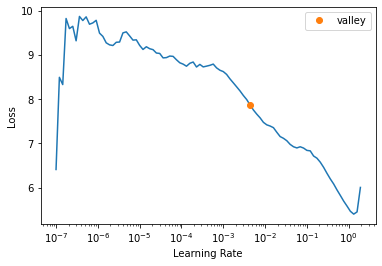

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.18      -0.17
1   -0.89      -0.93
2   -0.12      -0.13
3   -0.70      -0.67
4   -0.56      -0.59
XGBoost RMSE:  0.04108126


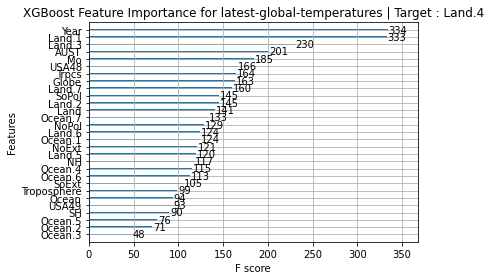

Target Variable: NoExt
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  5%|▍         | 2/42 [00:00<00:11,  3.61it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9826850523989906, 'Adjusted R-Squared': 0.9813942208297637, 'RMSE': 0.051825859718630546, 'Time taken': 0.38486766815185547}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9922621878651127, 'Adjusted R-Squared': 0.9916853329758795, 'RMSE': 0.034645354941027405, 'Time taken': 0.1999039649963379}


 10%|▉         | 4/42 [00:00<00:05,  7.02it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999283725140617, 'Adjusted R-Squared': 0.9999230326757784, 'RMSE': 0.0033333105617169173, 'Time taken': 0.03195762634277344}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9838559013829874, 'Adjusted R-Squared': 0.9826523567560121, 'RMSE': 0.050042941024204916, 'Time taken': 0.0921170711517334}
{'Model': 'DummyRegressor', 'R-Squared': -0.0009915428489184475, 'Adjusted R-Squared': -0.07561559103045723, 'RMSE': 0.39404982, 'Time taken': 0.027019977569580078}
{'Model': 'ElasticNet', 'R-Squared': -0.0009915428489184475, 'Adjusted R-Squared': -0.07561559103045723, 'RMSE': 0.39404982, 'Time taken': 0.019678115844726562}


 17%|█▋        | 7/42 [00:00<00:03,  9.06it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999097563452152, 'Adjusted R-Squared': 0.9999030286691515, 'RMSE': 0.0037414872, 'Time taken': 0.20895600318908691}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.953458593714506, 'Adjusted R-Squared': 0.9499889258937365, 'RMSE': 0.08496805465909758, 'Time taken': 0.0502314567565918}


 21%|██▏       | 9/42 [00:01<00:07,  4.19it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9965397344764796, 'Adjusted R-Squared': 0.996281771236937, 'RMSE': 0.023168111636617465, 'Time taken': 0.8934226036071777}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.34it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.33154428009453685, 'Adjusted R-Squared': 0.2817108202558263, 'RMSE': 0.3220121408794108, 'Time taken': 0.4161696434020996}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9516514048586011, 'Adjusted R-Squared': 0.9480470108763375, 'RMSE': 0.08660198648887123, 'Time taken': 0.056485652923583984}


 31%|███       | 13/42 [00:03<00:09,  2.92it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.995114653280065, 'Adjusted R-Squared': 0.9947504500541572, 'RMSE': 0.027528567976303417, 'Time taken': 1.092651605606079}


 33%|███▎      | 14/42 [00:04<00:11,  2.53it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.993256888592417, 'Adjusted R-Squared': 0.9927541887702579, 'RMSE': 0.03234194184526713, 'Time taken': 0.6224071979522705}


 36%|███▌      | 15/42 [00:04<00:09,  2.73it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999279846274262, 'Adjusted R-Squared': 0.9999226158721443, 'RMSE': 0.003342323867796668, 'Time taken': 0.25849246978759766}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9067737322632123, 'Adjusted R-Squared': 0.8998237020206241, 'RMSE': 0.12025554, 'Time taken': 0.0817563533782959}


 45%|████▌     | 19/42 [00:04<00:04,  4.98it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9989829096342785, 'Adjusted R-Squared': 0.9989070854167825, 'RMSE': 0.012560754, 'Time taken': 0.1303708553314209}
{'Model': 'Lars', 'R-Squared': 0.9575863945816445, 'Adjusted R-Squared': 0.9544244548460858, 'RMSE': 0.08111263691295488, 'Time taken': 0.04285001754760742}
{'Model': 'LarsCV', 'R-Squared': 0.999921308010267, 'Adjusted R-Squared': 0.9999154415123178, 'RMSE': 0.0034938253183987855, 'Time taken': 0.10206365585327148}
{'Model': 'Lasso', 'R-Squared': -0.0009915428489184475, 'Adjusted R-Squared': -0.07561559103045723, 'RMSE': 0.39404982, 'Time taken': 0.04096198081970215}


 55%|█████▍    | 23/42 [00:05<00:02,  6.66it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9999157133310255, 'Adjusted R-Squared': 0.9999094297490196, 'RMSE': 0.0036158913, 'Time taken': 0.2411515712738037}
{'Model': 'LassoLars', 'R-Squared': -0.000991540880732611, 'Adjusted R-Squared': -0.07561558891554299, 'RMSE': 0.39404981509343545, 'Time taken': 0.030055761337280273}
{'Model': 'LassoLarsCV', 'R-Squared': 0.999921736155543, 'Adjusted R-Squared': 0.9999159015758792, 'RMSE': 0.003484307799338936, 'Time taken': 0.13856792449951172}
{'Model': 'LassoLarsIC', 'R-Squared': 0.999915491076056, 'Adjusted R-Squared': 0.9999091909249137, 'RMSE': 0.0036206555498175166, 'Time taken': 0.03997087478637695}
{'Model': 'LinearRegression', 'R-Squared': 0.9999283762830793, 'Adjusted R-Squared': 0.9999230367257768, 'RMSE': 0.0033332228, 'Time taken': 0.038962602615356445}


 62%|██████▏   | 26/42 [00:05<00:02,  6.46it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.999793986571151, 'Adjusted R-Squared': 0.9997786282435505, 'RMSE': 0.005653061231871392, 'Time taken': 0.4038701057434082}


 64%|██████▍   | 27/42 [00:06<00:03,  4.23it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9726279141238543, 'Adjusted R-Squared': 0.9705873216035247, 'RMSE': 0.0651613196820614, 'Time taken': 0.6526753902435303}


 79%|███████▊  | 33/42 [00:10<00:03,  2.36it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9808247265247504, 'Adjusted R-Squared': 0.9793952074224824, 'RMSE': 0.05453894184931887, 'Time taken': 4.075321912765503}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999216141315954, 'Adjusted R-Squared': 0.9999157704550306, 'RMSE': 0.0034870229956099116, 'Time taken': 0.01792454719543457}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999216141315954, 'Adjusted R-Squared': 0.9999157704550306, 'RMSE': 0.0034870229956099116, 'Time taken': 0.03773856163024902}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.994871262340566, 'Adjusted R-Squared': 0.9944889142888345, 'RMSE': 0.028205978261247013, 'Time taken': 0.02364826202392578}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999284000662058, 'Adjusted R-Squared': 0.9999230622819383, 'RMSE': 0.0033326694, 'Time taken': 0.028595685958862305}


 83%|████████▎ | 35/42 [00:12<00:03,  1.77it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9948036070164112, 'Adjusted R-Squared': 0.9944162152515679, 'RMSE': 0.028391407176981305, 'Time taken': 1.9865961074829102}
{'Model': 'Ridge', 'R-Squared': 0.9999150639787898, 'Adjusted R-Squared': 0.9999087319874914, 'RMSE': 0.0036297932, 'Time taken': 0.014336824417114258}
{'Model': 'RidgeCV', 'R-Squared': 0.9999278709987047, 'Adjusted R-Squared': 0.9999224937723871, 'RMSE': 0.0033449596543141187, 'Time taken': 0.04696345329284668}
{'Model': 'SGDRegressor', 'R-Squared': 0.9995473504876616, 'Adjusted R-Squared': 0.9995136054083357, 'RMSE': 0.008379477762514022, 'Time taken': 0.050035715103149414}


 90%|█████████ | 38/42 [00:12<00:01,  2.53it/s]

{'Model': 'SVR', 'R-Squared': 0.955173061289135, 'Adjusted R-Squared': 0.9518312072464228, 'RMSE': 0.08338836621886446, 'Time taken': 0.12127351760864258}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999283762830793, 'Adjusted R-Squared': 0.9999230367257768, 'RMSE': 0.0033332228, 'Time taken': 0.01742839813232422}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9516514048586011, 'Adjusted R-Squared': 0.9480470108763375, 'RMSE': 0.08660198648887123, 'Time taken': 0.026844024658203125}


 98%|█████████▊| 41/42 [00:13<00:00,  3.01it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9934574073278157, 'Adjusted R-Squared': 0.9929696562031541, 'RMSE': 0.03185744, 'Time taken': 0.5632798671722412}


100%|██████████| 42/42 [00:14<00:00,  2.96it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9931631991300359, 'Adjusted R-Squared': 0.992653514746414, 'RMSE': 0.03256584786773429, 'Time taken': 0.8027656078338623}
Project: latest-global-temperatures
latest-global-temperatures
Target: NoExt
NoExt
Target Standard Deviation: 0.42140135169029236
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.00        0.03
LinearRegression                             1.00       1.00  0.00        0.04
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
BayesianRidge                                1.00       1.00  0.00        0.03
HuberRegressor                               1.00       1.00  0.00        0.26
RidgeCV                                      1.00       1.00  0.00        0.05
LassoLarsCV                                  1.00       1.00  0.00        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,8.088404,1.465684,1.210654,00:01
1,5.088580,0.776810,0.881368,00:01
2,3.050375,0.395458,0.628855,00:01
3,1.790178,0.105293,0.324489,00:01
4,1.084037,0.094604,0.307578,00:01
5,0.685077,0.080107,0.283032,00:01
6,0.442927,0.076152,0.275957,00:01
7,0.301775,0.071317,0.267053,00:01
8,0.221800,0.079658,0.282238,00:01


Better model found at epoch 0 with _rmse value: 1.2106544971466064.
Better model found at epoch 1 with _rmse value: 0.8813682198524475.
Better model found at epoch 2 with _rmse value: 0.628854513168335.
Better model found at epoch 3 with _rmse value: 0.32448911666870117.
Better model found at epoch 4 with _rmse value: 0.3075783848762512.
Better model found at epoch 5 with _rmse value: 0.2830315828323364.
Better model found at epoch 6 with _rmse value: 0.2759571373462677.
Better model found at epoch 7 with _rmse value: 0.2670525908470154.
No improvement since epoch 7: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,NoExt,NoExt_pred
0,36.00,7.00,4.00,-0.08,0.22,-0.24,0.05,0.29,-0.16,-0.21,-0.02,-0.25,-0.07,0.26,-0.17,0.28,-0.14,-0.18,-0.17,-0.16,0.14,0.16,0.12,-0.08,-0.16,-0.04,-0.04,-0.05,0.13,0.04,0.03
1,32.00,10.00,5.00,-0.30,-0.16,-0.34,-0.48,-0.11,-0.71,-0.04,-0.17,0.01,-0.56,-0.52,-0.58,0.03,-0.58,0.27,0.06,0.30,-0.23,-0.18,-0.25,0.00,-0.02,0.00,-0.21,-0.19,0.39,-0.11,0.03
2,24.00,6.00,5.00,-0.59,-0.16,-0.76,-0.42,0.10,-0.76,-0.63,-0.60,-0.62,-0.94,-0.84,-0.96,0.32,-0.31,-0.27,-0.24,-0.23,0.16,0.31,-0.00,0.47,0.07,0.76,0.38,0.46,-0.80,0.01,-0.06
3,3.00,13.00,4.00,-1.00,-0.96,-0.95,-0.97,-0.95,-0.90,-0.78,-0.56,-0.80,-0.79,-0.78,-0.79,-0.89,-0.72,-0.47,-0.20,-0.51,-0.32,-0.60,-0.05,0.26,0.28,0.25,-1.38,-1.43,-1.72,-0.34,-0.19
4,34.00,2.00,5.00,-0.59,-0.67,-0.53,-0.34,-0.54,-0.18,-0.69,-0.62,-0.68,-0.75,-0.65,-0.79,-0.41,0.44,-0.45,-0.42,-0.42,-0.07,-0.44,0.27,-0.22,-0.28,-0.22,-0.42,-0.68,-0.15,0.02,-0.09
5,25.00,9.00,3.00,-0.62,-0.43,-0.66,-0.53,-0.64,-0.40,-0.55,0.14,-0.71,-0.05,-0.02,-0.05,-0.66,-0.48,-0.71,0.10,-0.91,-0.21,-0.12,-0.28,-0.83,-0.57,-1.09,-0.48,-0.49,1.34,-0.24,-0.06
6,20.00,7.00,4.00,-0.17,-0.21,-0.15,-0.09,-0.14,-0.02,-0.24,-0.23,-0.22,0.36,0.38,0.36,-0.31,-0.38,-0.45,-0.36,-0.44,-0.15,-0.18,-0.09,0.08,-0.19,0.26,-0.88,-0.81,-0.67,-0.14,-0.13
7,14.00,10.00,3.00,1.17,1.32,1.01,2.25,1.46,2.64,-0.27,0.43,-0.45,2.58,2.43,2.61,1.01,1.88,-1.79,-0.71,-1.99,0.24,0.14,0.30,-2.47,-1.95,-3.03,0.82,0.47,1.65,0.64,0.17
8,33.00,9.00,3.00,-0.65,0.33,-1.05,0.90,0.39,1.20,-2.07,0.06,-2.58,1.73,1.50,1.78,-0.01,0.20,-3.40,-0.60,-4.00,0.08,0.09,0.07,-1.04,-0.71,-1.37,0.28,0.47,1.47,0.06,0.03


<Figure size 432x288 with 0 Axes>

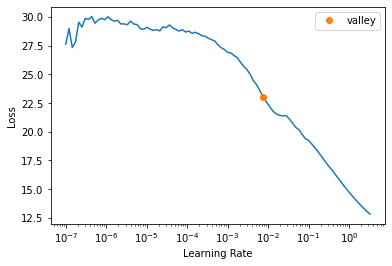

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00      -0.02
1    0.56       0.56
2   -0.42      -0.46
3   -0.60      -0.58
4   -0.08      -0.08
XGBoost RMSE:  0.031870805


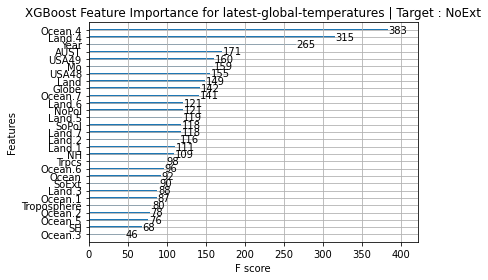

Target Variable: Ocean.3
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  5%|▍         | 2/42 [00:00<00:11,  3.52it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9877829392037184, 'Adjusted R-Squared': 0.9868721557510393, 'RMSE': 0.05318362343046744, 'Time taken': 0.40870189666748047}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9972610015597706, 'Adjusted R-Squared': 0.9970568088739952, 'RMSE': 0.025182013224143124, 'Time taken': 0.19507861137390137}


 10%|▉         | 4/42 [00:00<00:05,  6.67it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999148220368314, 'Adjusted R-Squared': 0.9999084720087288, 'RMSE': 0.004440768978867226, 'Time taken': 0.03404951095581055}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9970723771557947, 'Adjusted R-Squared': 0.996854122496458, 'RMSE': 0.026034672496911895, 'Time taken': 0.10529971122741699}
{'Model': 'DummyRegressor', 'R-Squared': -0.0007696279229560954, 'Adjusted R-Squared': -0.07537713231824061, 'RMSE': 0.4813507, 'Time taken': 0.01732468605041504}
{'Model': 'ElasticNet', 'R-Squared': -0.0007696279229560954, 'Adjusted R-Squared': -0.07537713231824061, 'RMSE': 0.4813507, 'Time taken': 0.018716812133789062}


 17%|█▋        | 7/42 [00:01<00:03,  8.88it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9996482248246199, 'Adjusted R-Squared': 0.99962199994008, 'RMSE': 0.009024583, 'Time taken': 0.21564888954162598}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9891987199627384, 'Adjusted R-Squared': 0.9883934831476212, 'RMSE': 0.0500071573834795, 'Time taken': 0.06507110595703125}


 21%|██▏       | 9/42 [00:01<00:07,  4.20it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9985967314442243, 'Adjusted R-Squared': 0.9984921175930226, 'RMSE': 0.01802457162717148, 'Time taken': 0.8694729804992676}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.26it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.25924682414130606, 'Adjusted R-Squared': 0.20402357966855, 'RMSE': 0.4141248735242801, 'Time taken': 0.4425230026245117}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9382355947106985, 'Adjusted R-Squared': 0.9336310503575115, 'RMSE': 0.11958141476316701, 'Time taken': 0.05799603462219238}


 31%|███       | 13/42 [00:03<00:09,  3.18it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9983464949001862, 'Adjusted R-Squared': 0.9982232258824624, 'RMSE': 0.019565787145078173, 'Time taken': 0.9052524566650391}


 33%|███▎      | 14/42 [00:04<00:10,  2.65it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9929864941881931, 'Adjusted R-Squared': 0.9924636364284439, 'RMSE': 0.040296018366539406, 'Time taken': 0.6451129913330078}


 38%|███▊      | 16/42 [00:04<00:07,  3.49it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999241850769971, 'Adjusted R-Squared': 0.9999185330647424, 'RMSE': 0.004189593666048233, 'Time taken': 0.20760440826416016}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9051940713932352, 'Adjusted R-Squared': 0.8981262772297488, 'RMSE': 0.14815363, 'Time taken': 0.09999489784240723}


 40%|████      | 17/42 [00:04<00:06,  3.94it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9991068685719606, 'Adjusted R-Squared': 0.9990402855092019, 'RMSE': 0.01437978, 'Time taken': 0.15024948120117188}
{'Model': 'Lars', 'R-Squared': -11313117.719217239, 'Adjusted R-Squared': -12156512.173863254, 'RMSE': 1618.3994698506463, 'Time taken': 0.042702674865722656}


 45%|████▌     | 19/42 [00:04<00:04,  5.21it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9971490338939297, 'Adjusted R-Squared': 0.9969364940042741, 'RMSE': 0.02569156631324265, 'Time taken': 0.16409015655517578}
{'Model': 'Lasso', 'R-Squared': -0.0007696279229560954, 'Adjusted R-Squared': -0.07537713231824061, 'RMSE': 0.4813507, 'Time taken': 0.05884075164794922}


 50%|█████     | 21/42 [00:05<00:03,  5.25it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9997260915114194, 'Adjusted R-Squared': 0.999705671598389, 'RMSE': 0.007963378, 'Time taken': 0.3060939311981201}
{'Model': 'LassoLars', 'R-Squared': -0.0007696343631058422, 'Adjusted R-Squared': -0.07537713923850453, 'RMSE': 0.4813507079487151, 'Time taken': 0.04223752021789551}


 60%|█████▉    | 25/42 [00:05<00:02,  7.41it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999136706521228, 'Adjusted R-Squared': 0.9999072347881423, 'RMSE': 0.004470682059553389, 'Time taken': 0.23522090911865234}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9969541183244485, 'Adjusted R-Squared': 0.9967270474540346, 'RMSE': 0.026555291266844732, 'Time taken': 0.07250666618347168}
{'Model': 'LinearRegression', 'R-Squared': 0.999882003814727, 'Adjusted R-Squared': 0.9998732071839483, 'RMSE': 0.0052267117, 'Time taken': 0.04189252853393555}


 62%|██████▏   | 26/42 [00:05<00:03,  4.72it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9994931113421978, 'Adjusted R-Squared': 0.9994553227276058, 'RMSE': 0.01083305235242647, 'Time taken': 0.5329678058624268}


 64%|██████▍   | 27/42 [00:06<00:04,  3.39it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9783007274318251, 'Adjusted R-Squared': 0.9766830438727581, 'RMSE': 0.07087892836691208, 'Time taken': 0.5953464508056641}


 79%|███████▊  | 33/42 [00:09<00:02,  3.17it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9499742138676509, 'Adjusted R-Squared': 0.9462447850814346, 'RMSE': 0.1076196353648942, 'Time taken': 2.4548680782318115}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9973962761021595, 'Adjusted R-Squared': 0.9972021681509067, 'RMSE': 0.024552290828819448, 'Time taken': 0.01716136932373047}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9998951581608367, 'Adjusted R-Squared': 0.9998873421882513, 'RMSE': 0.004926765262120662, 'Time taken': 0.036744117736816406}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9936192250970265, 'Adjusted R-Squared': 0.9931435375078588, 'RMSE': 0.03843538779488454, 'Time taken': 0.02316117286682129}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9984540442179498, 'Adjusted R-Squared': 0.998338793015689, 'RMSE': 0.018918779, 'Time taken': 0.030286073684692383}


 83%|████████▎ | 35/42 [00:11<00:03,  2.06it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9980624185468393, 'Adjusted R-Squared': 0.9979179716004597, 'RMSE': 0.02117993093199172, 'Time taken': 1.9018440246582031}
{'Model': 'Ridge', 'R-Squared': 0.9999152953443003, 'Adjusted R-Squared': 0.9999089806013305, 'RMSE': 0.0044284137, 'Time taken': 0.014412164688110352}
{'Model': 'RidgeCV', 'R-Squared': 0.9999204716889066, 'Adjusted R-Squared': 0.9999145428430924, 'RMSE': 0.004290969573222593, 'Time taken': 0.03972029685974121}
{'Model': 'SGDRegressor', 'R-Squared': 0.9945507048297026, 'Adjusted R-Squared': 0.9941444591743335, 'RMSE': 0.03551932644317249, 'Time taken': 0.05071449279785156}


 90%|█████████ | 38/42 [00:11<00:01,  2.95it/s]

{'Model': 'SVR', 'R-Squared': 0.932724688458553, 'Adjusted R-Squared': 0.9277093053359259, 'RMSE': 0.1248022496792511, 'Time taken': 0.1515672206878662}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.999882003814727, 'Adjusted R-Squared': 0.9998732071839483, 'RMSE': 0.0052267117, 'Time taken': 0.020542383193969727}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9382355947106985, 'Adjusted R-Squared': 0.9336310503575115, 'RMSE': 0.11958141476316701, 'Time taken': 0.05821514129638672}


 98%|█████████▊| 41/42 [00:11<00:00,  3.39it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9987347729947966, 'Adjusted R-Squared': 0.9986404501589331, 'RMSE': 0.017115075, 'Time taken': 0.5523595809936523}


100%|██████████| 42/42 [00:12<00:00,  3.40it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9928586909386465, 'Adjusted R-Squared': 0.9923263054302166, 'RMSE': 0.040661506922141016, 'Time taken': 0.3726232051849365}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.3
Ocean.3
Target Standard Deviation: 0.4692257344722748
                               Adjusted R-Squared    R-Squared    RMSE  \
Model                                                                    
HuberRegressor                               1.00         1.00    0.00   
RidgeCV                                      1.00         1.00    0.00   
Ridge                                        1.00         1.00    0.00   
BayesianRidge                                1.00         1.00    0.00   
LassoLarsCV                                  1.00         1.00    0.00   
OrthogonalMatchingPursuitCV                  1.00         1.00    0.00   
TransformedTargetRegressor                   1.00         1.00    0.01   
LinearRegression                   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6.971279,9.167166,3.027733,00:01
1,4.176578,9.397417,3.065521,00:01


Better model found at epoch 0 with _rmse value: 3.0277328491210938.
No improvement since epoch 0: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean.3,Ocean.3_pred
0,40.00,5.00,2.00,-0.14,-0.25,-0.08,0.05,0.05,0.04,-0.30,-0.72,-0.15,-0.07,-0.27,0.14,0.13,0.13,-0.33,-0.73,-0.20,0.10,-0.06,0.24,-0.45,-0.52,-0.38,0.29,0.09,-1.05,0.01,-0.53
1,29.00,2.00,4.00,0.22,0.06,0.26,0.10,-0.07,0.21,0.26,0.26,0.27,0.21,0.20,0.02,-0.10,0.16,0.19,0.15,0.17,1.11,0.92,1.22,0.20,0.25,0.15,-0.66,-0.55,-0.53,0.11,-0.24
2,17.00,12.00,2.00,-1.36,-1.82,-1.04,-1.21,-1.39,-0.94,-1.15,-1.84,-0.91,-1.22,-1.59,-0.82,-1.05,-0.45,-0.76,-1.51,-0.47,-0.72,-0.74,-0.64,-0.26,-0.58,-0.01,-1.88,-1.67,-2.08,-0.51,-1.77
3,46.00,10.00,3.00,-0.53,-0.72,-0.41,0.49,-0.16,0.93,-1.48,-1.49,-1.42,1.30,1.13,-0.10,-0.50,0.33,-2.60,-2.31,-2.47,-0.53,-0.55,-0.47,-3.02,-2.66,-3.09,0.41,0.49,0.76,0.65,11.00
4,12.00,6.00,2.00,-0.73,-1.30,-0.41,-1.29,-1.23,-1.22,0.06,-0.85,0.33,-0.18,-0.25,-1.54,-1.26,-1.67,0.16,-0.92,0.46,-0.61,-0.84,-0.35,-0.10,-0.36,0.08,0.78,0.36,-0.45,-0.06,-0.04
5,28.00,5.00,4.00,0.09,-0.08,0.16,0.19,-0.04,0.32,-0.03,-0.11,-0.00,0.12,0.11,0.16,-0.10,0.40,-0.12,-0.16,-0.10,0.17,0.06,0.26,0.04,-0.09,0.11,0.01,0.28,-0.39,0.07,-0.38
6,17.00,5.00,5.00,0.62,0.22,0.75,0.47,0.12,0.68,0.62,0.35,0.66,0.72,0.66,0.16,-0.04,0.35,0.35,0.06,0.41,0.01,-0.14,0.16,0.20,0.03,0.31,-0.81,-1.14,0.04,0.36,-0.20
7,37.00,11.00,3.00,-0.60,0.14,-0.94,-2.01,-0.98,-2.56,1.03,2.40,0.57,-2.66,-2.58,-1.08,-0.46,-1.65,2.83,4.26,2.20,-0.56,-0.58,-0.50,5.50,5.28,5.34,0.18,-0.31,-1.72,-1.24,-1.22
8,11.00,2.00,2.00,-1.00,-0.52,-1.17,-0.87,-0.26,-1.27,-0.86,-0.85,-0.82,-0.58,-0.65,-0.84,-0.16,-1.48,-0.69,-0.55,-0.69,-0.58,-0.31,-0.81,-0.34,-0.17,-0.44,1.31,1.09,-1.04,-0.24,-1.23


<Figure size 432x288 with 0 Axes>

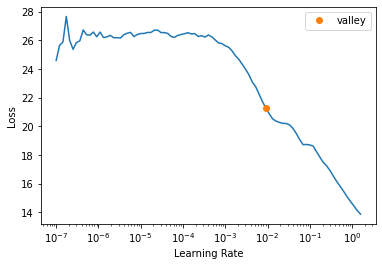

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.03      -0.02
1   -1.14      -1.20
2    0.47       0.48
3    0.07       0.08
4    0.03       0.04
XGBoost RMSE:  0.01708602


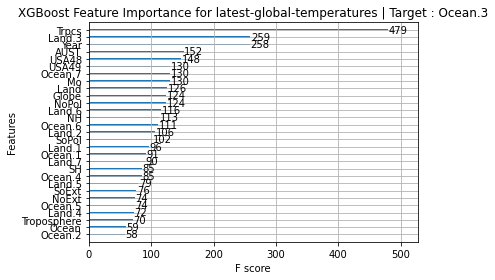

Target Variable: Land.3
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:16,  2.56it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9576040801007176, 'Adjusted R-Squared': 0.9544434588228791, 'RMSE': 0.09280463415161652, 'Time taken': 0.39069128036499023}


 10%|▉         | 4/42 [00:00<00:05,  6.57it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9769240667634692, 'Adjusted R-Squared': 0.9752037529746276, 'RMSE': 0.06846794110915988, 'Time taken': 0.2268683910369873}
{'Model': 'BayesianRidge', 'R-Squared': 0.9996687900333456, 'Adjusted R-Squared': 0.9996440982877596, 'RMSE': 0.00820274725232438, 'Time taken': 0.03160977363586426}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9570075247481543, 'Adjusted R-Squared': 0.9538024301921041, 'RMSE': 0.09345528290888655, 'Time taken': 0.10184025764465332}
{'Model': 'DummyRegressor', 'R-Squared': -0.0006303674102594581, 'Adjusted R-Squared': -0.0752274899164227, 'RMSE': 0.45086285, 'Time taken': 0.025066852569580078}
{'Model': 'ElasticNet', 'R-Squared': -0.0006303674102594581, 'Adjusted R-Squared': -0.0752274899164227, 'RMSE': 0.45086285, 'Time taken': 0.014146804809570312}


 17%|█▋        | 7/42 [00:01<00:05,  6.75it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9976472333898871, 'Adjusted R-Squared': 0.9974718343366911, 'RMSE': 0.021862362, 'Time taken': 0.39183568954467773}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9552840643176063, 'Adjusted R-Squared': 0.9519504855649342, 'RMSE': 0.09531007097647946, 'Time taken': 0.04429268836975098}


 21%|██▏       | 9/42 [00:02<00:09,  3.53it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9834389949824976, 'Adjusted R-Squared': 0.982204369929779, 'RMSE': 0.05800306937498511, 'Time taken': 1.013615608215332}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  3.92it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3059970666549289, 'Adjusted R-Squared': 0.25425905877059196, 'RMSE': 0.3754812756040605, 'Time taken': 0.38762855529785156}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9164128053230068, 'Adjusted R-Squared': 0.9101813692159817, 'RMSE': 0.13030992849601578, 'Time taken': 0.05764627456665039}


 31%|███       | 13/42 [00:03<00:09,  3.03it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9724834765878609, 'Adjusted R-Squared': 0.9704321162306577, 'RMSE': 0.07476604581054021, 'Time taken': 0.911207914352417}


 33%|███▎      | 14/42 [00:04<00:12,  2.30it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9812455813226854, 'Adjusted R-Squared': 0.9798474369996979, 'RMSE': 0.061724763569345004, 'Time taken': 0.8863568305969238}


 38%|███▊      | 16/42 [00:04<00:08,  3.05it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9996601280288635, 'Adjusted R-Squared': 0.9996347905297299, 'RMSE': 0.008309316600108883, 'Time taken': 0.22980427742004395}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.867229645165277, 'Adjusted R-Squared': 0.8573315981467501, 'RMSE': 0.16423215, 'Time taken': 0.11562418937683105}


 45%|████▌     | 19/42 [00:05<00:04,  5.14it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9988960033925528, 'Adjusted R-Squared': 0.9988137003035658, 'RMSE': 0.0149758505, 'Time taken': 0.13666772842407227}
{'Model': 'Lars', 'R-Squared': -80348.33146545092, 'Adjusted R-Squared': -86338.38445387785, 'RMSE': 127.76113619297546, 'Time taken': 0.043019771575927734}
{'Model': 'LarsCV', 'R-Squared': 0.9563499437188611, 'Adjusted R-Squared': 0.9530958264125551, 'RMSE': 0.09416728205029282, 'Time taken': 0.09987878799438477}
{'Model': 'Lasso', 'R-Squared': -0.0006303674102594581, 'Adjusted R-Squared': -0.0752274899164227, 'RMSE': 0.45086285, 'Time taken': 0.04961681365966797}


 50%|█████     | 21/42 [00:05<00:05,  3.69it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9982939869137033, 'Adjusted R-Squared': 0.998166803418838, 'RMSE': 0.018616535, 'Time taken': 0.7464413642883301}
{'Model': 'LassoLars', 'R-Squared': -0.0006303684219404193, 'Adjusted R-Squared': -0.07522749100352466, 'RMSE': 0.450862869954906, 'Time taken': 0.05488872528076172}


 60%|█████▉    | 25/42 [00:06<00:02,  6.11it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9996698661591901, 'Adjusted R-Squared': 0.9996452546389241, 'RMSE': 0.008189410742372682, 'Time taken': 0.15061378479003906}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9994852487390131, 'Adjusted R-Squared': 0.9994468739663431, 'RMSE': 0.010226013015382254, 'Time taken': 0.08563113212585449}
{'Model': 'LinearRegression', 'R-Squared': 0.9996642599859307, 'Adjusted R-Squared': 0.9996392305247276, 'RMSE': 0.008258652, 'Time taken': 0.03926491737365723}


 62%|██████▏   | 26/42 [00:06<00:03,  4.48it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9995675996606165, 'Adjusted R-Squared': 0.999535364159737, 'RMSE': 0.009372396315608605, 'Time taken': 0.4664876461029053}


 64%|██████▍   | 27/42 [00:07<00:04,  3.10it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9647081207372085, 'Adjusted R-Squared': 0.9620771066019361, 'RMSE': 0.08467301494847602, 'Time taken': 0.6819443702697754}


 79%|███████▊  | 33/42 [00:08<00:01,  4.75it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9664695855739682, 'Adjusted R-Squared': 0.9639698888686856, 'RMSE': 0.08253289748444, 'Time taken': 1.1774396896362305}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9684074757752561, 'Adjusted R-Squared': 0.9660522490335657, 'RMSE': 0.08011240971359798, 'Time taken': 0.015684127807617188}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9713093147288343, 'Adjusted R-Squared': 0.9691704204541202, 'RMSE': 0.07634455926290147, 'Time taken': 0.03747248649597168}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9805253450251968, 'Adjusted R-Squared': 0.9790735069936563, 'RMSE': 0.06289882284081293, 'Time taken': 0.023665428161621094}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9996682841551798, 'Adjusted R-Squared': 0.9996435546963115, 'RMSE': 0.008209009, 'Time taken': 0.0283658504486084}


 83%|████████▎ | 35/42 [00:10<00:03,  2.27it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.978084063508629, 'Adjusted R-Squared': 0.9764502276262389, 'RMSE': 0.06672485645804345, 'Time taken': 2.1467549800872803}
{'Model': 'Ridge', 'R-Squared': 0.9989502961378813, 'Adjusted R-Squared': 0.998872040580037, 'RMSE': 0.014602965, 'Time taken': 0.01474452018737793}
{'Model': 'RidgeCV', 'R-Squared': 0.9996701030591356, 'Adjusted R-Squared': 0.999645509199791, 'RMSE': 0.008186471905320557, 'Time taken': 0.0463719367980957}
{'Model': 'SGDRegressor', 'R-Squared': 0.9715918437204087, 'Adjusted R-Squared': 0.9694740120183313, 'RMSE': 0.0759677311168653, 'Time taken': 0.0436549186706543}


 90%|█████████ | 38/42 [00:11<00:01,  3.19it/s]

{'Model': 'SVR', 'R-Squared': 0.9462713360938778, 'Adjusted R-Squared': 0.9422658572936785, 'RMSE': 0.10447458435650114, 'Time taken': 0.17696142196655273}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9996642599859307, 'Adjusted R-Squared': 0.9996392305247276, 'RMSE': 0.008258652, 'Time taken': 0.02500772476196289}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9164128053230068, 'Adjusted R-Squared': 0.9101813692159817, 'RMSE': 0.13030992849601578, 'Time taken': 0.06025266647338867}


 98%|█████████▊| 41/42 [00:11<00:00,  3.56it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9812589240155781, 'Adjusted R-Squared': 0.9798617743920608, 'RMSE': 0.061702803, 'Time taken': 0.5660130977630615}


100%|██████████| 42/42 [00:12<00:00,  3.45it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9819092126015201, 'Adjusted R-Squared': 0.9805605420756695, 'RMSE': 0.06062285236412786, 'Time taken': 0.3636956214904785}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.3
Land.3
Target Standard Deviation: 0.48122474551200867
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RidgeCV                                      1.00       1.00   0.01   
LassoLarsCV                                  1.00       1.00   0.01   
BayesianRidge                                1.00       1.00   0.01   
RANSACRegressor                              1.00       1.00   0.01   
TransformedTargetRegressor                   1.00       1.00   0.01   
LinearRegression                             1.00       1.00   0.01   
HuberRegressor                               1.00       1.00   0.01   
LinearSVR                                    1.00       1.00   0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.940408,1.132025,1.063967,00:01
1,2.562645,1.062274,1.030667,00:01
2,1.457275,0.122879,0.350542,00:01
3,0.856468,0.159895,0.399868,00:01


Better model found at epoch 0 with _rmse value: 1.0639667510986328.
Better model found at epoch 1 with _rmse value: 1.0306665897369385.
Better model found at epoch 2 with _rmse value: 0.3505415618419647.
No improvement since epoch 2: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land.3,Land.3_pred
0,23.00,3.00,5.00,1.20,0.76,1.29,1.28,0.65,1.59,0.82,0.66,0.81,2.02,2.04,0.44,0.21,0.66,-0.14,-0.20,-0.10,-0.04,0.11,-0.17,-0.28,-0.27,-0.33,0.33,0.55,-0.14,0.95,0.01
1,40.00,7.00,5.00,0.79,0.79,0.75,1.14,1.01,1.12,0.26,-0.00,0.29,0.87,0.90,1.04,0.93,1.02,-0.23,-0.42,-0.15,0.45,0.65,0.25,-0.55,-0.67,-0.53,0.42,0.53,0.39,0.38,-0.07
2,16.00,6.00,5.00,0.56,0.49,0.56,0.32,0.19,0.39,0.68,0.91,0.61,0.57,0.57,0.08,0.04,0.15,0.50,0.73,0.40,0.01,0.01,0.02,0.26,0.56,0.07,0.02,0.06,0.57,0.30,0.05
3,20.00,5.00,3.00,-0.42,-0.73,-0.26,-0.91,-0.83,-0.88,0.20,-0.21,0.32,0.24,0.23,-1.31,-0.94,-1.52,0.06,-0.40,0.21,-0.60,-0.68,-0.50,0.35,-0.04,0.63,-0.09,-0.44,-0.29,0.09,-0.10
4,5.00,1.00,3.00,3.00,1.28,3.61,0.78,0.09,1.23,4.54,3.03,4.74,2.07,2.04,-0.11,-0.52,0.30,4.35,2.54,4.58,-3.25,-3.22,-3.17,0.74,0.62,0.86,-0.80,-1.67,3.16,1.03,1.23
5,28.00,3.00,2.00,0.03,-0.35,0.18,-0.28,-0.68,0.01,0.34,0.45,0.29,0.28,0.36,-0.59,-0.75,-0.36,0.27,0.50,0.18,0.11,0.11,0.11,0.17,0.45,-0.01,-0.23,-0.24,-0.75,0.01,-0.07
6,32.00,8.00,3.00,-0.95,-1.32,-0.74,-1.41,-1.16,-1.45,-0.25,-1.02,-0.03,-1.68,-1.64,-0.88,-0.86,-0.82,0.63,-0.24,0.85,-0.08,-0.08,-0.07,0.16,-0.13,0.35,-1.55,-1.49,-0.66,-0.86,-0.34
7,30.00,3.00,2.00,0.15,0.09,0.18,0.29,-0.10,0.55,-0.03,0.41,-0.15,0.72,0.76,-0.06,-0.30,0.17,-0.44,0.20,-0.60,0.42,0.43,0.39,-0.01,0.31,-0.23,-1.62,-1.04,-0.12,0.31,0.04
8,24.00,9.00,5.00,-0.92,-0.32,-1.12,-0.23,-0.13,-0.29,-1.38,-0.61,-1.57,-0.44,-0.48,-0.09,-0.09,-0.07,-1.44,-0.52,-1.62,0.09,-0.03,0.19,-0.60,-0.25,-0.90,-0.02,-0.02,-0.90,-0.12,-0.17


<Figure size 432x288 with 0 Axes>

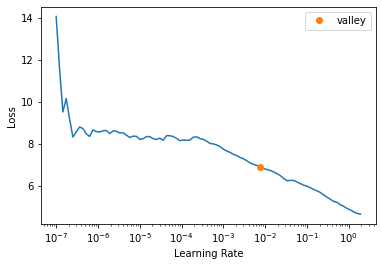

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.60      -0.65
1    0.29       0.25
2   -0.52      -0.44
3    0.42       0.39
4    0.68       0.42
XGBoost RMSE:  0.06174363


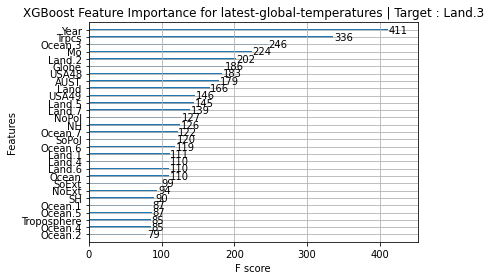

Target Variable: Trpcs
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  5%|▍         | 2/42 [00:00<00:11,  3.51it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9897566997176058, 'Adjusted R-Squared': 0.9889930603649337, 'RMSE': 0.04879136563837629, 'Time taken': 0.41136956214904785}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9987098603527117, 'Adjusted R-Squared': 0.9986136802761786, 'RMSE': 0.017315753017659207, 'Time taken': 0.19455552101135254}


 12%|█▏        | 5/42 [00:00<00:03,  9.39it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9980879618332998, 'Adjusted R-Squared': 0.9979454191422091, 'RMSE': 0.021080033675196726, 'Time taken': 0.021281719207763672}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9977982668679386, 'Adjusted R-Squared': 0.9976341273799443, 'RMSE': 0.022620664612373196, 'Time taken': 0.06717896461486816}
{'Model': 'DummyRegressor', 'R-Squared': -0.00389068229558176, 'Adjusted R-Squared': -0.07873086169550936, 'RMSE': 0.48302123, 'Time taken': 0.018019676208496094}
{'Model': 'ElasticNet', 'R-Squared': -0.00389068229558176, 'Adjusted R-Squared': -0.07873086169550936, 'RMSE': 0.48302123, 'Time taken': 0.03863859176635742}


 17%|█▋        | 7/42 [00:00<00:03,  9.06it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999381021529878, 'Adjusted R-Squared': 0.999933487660537, 'RMSE': 0.0037928075, 'Time taken': 0.1921839714050293}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9952555925277383, 'Adjusted R-Squared': 0.9949018963408602, 'RMSE': 0.03320580493866338, 'Time taken': 0.03167009353637695}


 21%|██▏       | 9/42 [00:01<00:08,  3.86it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9993392869383235, 'Adjusted R-Squared': 0.9992900306946509, 'RMSE': 0.012391659406355216, 'Time taken': 0.9963750839233398}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:08,  3.78it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.24596787457580704, 'Adjusted R-Squared': 0.18975468270613716, 'RMSE': 0.4186180462309283, 'Time taken': 0.5373303890228271}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9305343510841071, 'Adjusted R-Squared': 0.9253556780286807, 'RMSE': 0.12705977159364712, 'Time taken': 0.05488419532775879}


 31%|███       | 13/42 [00:03<00:10,  2.79it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9994390576453054, 'Adjusted R-Squared': 0.9993972393206624, 'RMSE': 0.011417792296265803, 'Time taken': 1.041410207748413}


 33%|███▎      | 14/42 [00:04<00:11,  2.43it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.991236068892255, 'Adjusted R-Squared': 0.9905827167017034, 'RMSE': 0.04513074463855118, 'Time taken': 0.6407632827758789}


 38%|███▊      | 16/42 [00:04<00:08,  2.97it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999447986487477, 'Adjusted R-Squared': 0.9999406833809166, 'RMSE': 0.003581771497489788, 'Time taken': 0.29764342308044434}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8938420322372531, 'Adjusted R-Squared': 0.8859279420955574, 'RMSE': 0.1570722, 'Time taken': 0.16757464408874512}


 45%|████▌     | 19/42 [00:05<00:04,  4.73it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9998883168135638, 'Adjusted R-Squared': 0.9998799908176599, 'RMSE': 0.00509468, 'Time taken': 0.2055211067199707}
{'Model': 'Lars', 'R-Squared': -0.5978918899334364, 'Adjusted R-Squared': -0.7170149357125357, 'RMSE': 0.6093919571360634, 'Time taken': 0.08274340629577637}
{'Model': 'LarsCV', 'R-Squared': 0.9999408591366213, 'Adjusted R-Squared': 0.9999364501776548, 'RMSE': 0.0037073778591877648, 'Time taken': 0.07702088356018066}
{'Model': 'Lasso', 'R-Squared': -0.00389068229558176, 'Adjusted R-Squared': -0.07873086169550936, 'RMSE': 0.48302123, 'Time taken': 0.04669308662414551}


 50%|█████     | 21/42 [00:05<00:03,  5.38it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9999399005302547, 'Adjusted R-Squared': 0.9999354201070604, 'RMSE': 0.0037373032, 'Time taken': 0.2352008819580078}
{'Model': 'LassoLars', 'R-Squared': -0.0038906982679594027, 'Adjusted R-Squared': -0.07873087885862984, 'RMSE': 0.4830212493264428, 'Time taken': 0.04061293601989746}


 55%|█████▍    | 23/42 [00:05<00:03,  6.30it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999409022240598, 'Adjusted R-Squared': 0.9999364964772673, 'RMSE': 0.0037060270966845434, 'Time taken': 0.17127203941345215}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999388175760844, 'Adjusted R-Squared': 0.9999342564185174, 'RMSE': 0.0037708248563085014, 'Time taken': 0.05086064338684082}
{'Model': 'LinearRegression', 'R-Squared': 0.9958670955536069, 'Adjusted R-Squared': 0.9955589869959066, 'RMSE': 0.03099208, 'Time taken': 0.03534746170043945}


 62%|██████▏   | 26/42 [00:06<00:02,  6.03it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9986368813042716, 'Adjusted R-Squared': 0.9985352606302971, 'RMSE': 0.017798764587067455, 'Time taken': 0.43665456771850586}


 64%|██████▍   | 27/42 [00:06<00:03,  4.01it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9810784410527578, 'Adjusted R-Squared': 0.9796678364011638, 'RMSE': 0.06631342806685199, 'Time taken': 0.6584086418151855}


 79%|███████▊  | 33/42 [00:10<00:03,  2.81it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9335063910291482, 'Adjusted R-Squared': 0.9285492839336349, 'RMSE': 0.12431197728905347, 'Time taken': 3.1731338500976562}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9974949173116745, 'Adjusted R-Squared': 0.9973081630752698, 'RMSE': 0.0241287072731419, 'Time taken': 0.016402482986450195}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999418276711078, 'Adjusted R-Squared': 0.9999374909165117, 'RMSE': 0.003676895162332438, 'Time taken': 0.03782367706298828}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9958317519894548, 'Adjusted R-Squared': 0.9955210085645042, 'RMSE': 0.03112431467926599, 'Time taken': 0.02326798439025879}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9958670302701118, 'Adjusted R-Squared': 0.9955589168455186, 'RMSE': 0.030992324, 'Time taken': 0.0274810791015625}


 88%|████████▊ | 37/42 [00:12<00:01,  2.61it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9991445194047841, 'Adjusted R-Squared': 0.9990807432164518, 'RMSE': 0.014100291895412316, 'Time taken': 1.8654680252075195}
{'Model': 'Ridge', 'R-Squared': 0.9999429752615427, 'Adjusted R-Squared': 0.9999387240599611, 'RMSE': 0.0036404466, 'Time taken': 0.014612674713134766}
{'Model': 'RidgeCV', 'R-Squared': 0.9999251765355245, 'Adjusted R-Squared': 0.9999195984366305, 'RMSE': 0.004170056394673781, 'Time taken': 0.04910016059875488}
{'Model': 'SGDRegressor', 'R-Squared': 0.9992716133803496, 'Adjusted R-Squared': 0.9992173120642317, 'RMSE': 0.013010800012009988, 'Time taken': 0.05202984809875488}


 93%|█████████▎| 39/42 [00:12<00:00,  3.34it/s]

{'Model': 'SVR', 'R-Squared': 0.9127538930070085, 'Adjusted R-Squared': 0.9062496845165284, 'RMSE': 0.1423954297012379, 'Time taken': 0.12983226776123047}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9958670955536069, 'Adjusted R-Squared': 0.9955589869959066, 'RMSE': 0.03099208, 'Time taken': 0.015049457550048828}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9305343510841071, 'Adjusted R-Squared': 0.9253556780286807, 'RMSE': 0.12705977159364712, 'Time taken': 0.05245685577392578}


 98%|█████████▊| 41/42 [00:12<00:00,  3.34it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9988086708314315, 'Adjusted R-Squared': 0.9987198570887876, 'RMSE': 0.016639449, 'Time taken': 0.5445573329925537}


100%|██████████| 42/42 [00:13<00:00,  3.18it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9883976283421196, 'Adjusted R-Squared': 0.9875326700437173, 'RMSE': 0.05192737970449329, 'Time taken': 0.3745613098144531}
Project: latest-global-temperatures
latest-global-temperatures
Target: Trpcs
Trpcs
Target Standard Deviation: 0.4670259952545166
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               1.00       1.00  0.00        0.30
Ridge                                        1.00       1.00  0.00        0.01
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.04
LassoLarsCV                                  1.00       1.00  0.00        0.17
LarsCV                                       1.00       1.00  0.00        0.08
LassoCV                                      1.00       1.00  0.00        0.24
LassoLarsIC                                  1.00       1.00  0.00        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.201414,1.558979,1.248591,00:01
1,2.748601,0.670942,0.819110,00:01
2,1.925854,0.446704,0.668359,00:01
3,1.150926,0.175465,0.418885,00:01
4,0.717712,0.175946,0.419459,00:01


Better model found at epoch 0 with _rmse value: 1.2485908269882202.
Better model found at epoch 1 with _rmse value: 0.8191103935241699.
Better model found at epoch 2 with _rmse value: 0.6683589220046997.
Better model found at epoch 3 with _rmse value: 0.4188850522041321.
No improvement since epoch 3: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Trpcs,Trpcs_pred
0,46.00,11.00,2.00,1.16,1.65,0.85,1.24,1.71,0.80,0.75,0.83,0.71,1.15,0.56,1.27,1.60,0.78,0.55,0.43,0.55,0.51,0.64,0.37,0.07,0.47,-0.22,1.17,0.84,0.10,0.33,0.02
1,14.00,5.00,3.00,1.20,1.00,1.20,1.19,1.04,1.20,0.87,0.49,0.95,1.23,1.55,0.69,0.82,0.49,0.28,0.02,0.34,0.47,0.43,0.49,-0.28,-0.20,-0.31,-0.54,-0.95,-0.46,0.70,0.03
2,33.00,12.00,4.00,-0.46,-0.13,-0.60,-0.45,0.06,-0.76,-0.35,-0.40,-0.33,0.26,-0.29,-0.51,-0.03,-0.92,-0.33,-0.56,-0.25,-0.19,-0.12,-0.24,-0.70,-0.80,-0.60,-0.10,-0.29,0.33,-0.08,-0.03
3,31.00,3.00,4.00,-0.08,0.14,-0.18,0.10,0.34,-0.10,-0.24,-0.34,-0.19,0.26,-0.05,0.14,0.29,-0.02,-0.33,-0.45,-0.27,1.09,0.72,1.37,-0.22,-0.29,-0.17,-0.85,-1.08,-0.58,0.01,-0.04
4,26.00,4.00,5.00,-0.58,-0.24,-0.72,-0.39,-0.06,-0.57,-0.66,-0.46,-0.68,-0.97,-1.06,0.14,0.18,0.05,-0.24,-0.07,-0.27,1.63,1.58,1.62,-0.18,-0.09,-0.23,-1.17,-1.38,0.21,-0.48,-0.00
5,6.00,9.00,4.00,-0.49,-0.13,-0.63,-0.28,-0.28,-0.24,-0.58,0.22,-0.80,-0.70,-0.63,-0.01,-0.18,0.15,-0.33,0.69,-0.60,0.05,0.11,0.01,0.47,1.01,0.08,-0.19,-0.25,-0.40,-0.30,-0.03
6,42.00,9.00,5.00,0.31,-0.10,0.49,-0.04,-0.09,0.00,0.61,-0.07,0.77,-0.02,-0.08,-0.01,-0.07,0.05,0.78,-0.08,0.98,-0.02,-0.06,0.01,0.55,0.05,0.86,-0.07,-0.02,-0.40,-0.03,0.02
7,17.00,13.00,4.00,-0.90,-0.83,-0.88,-0.67,-0.64,-0.62,-0.95,-0.85,-0.91,-0.67,-0.63,-0.53,-0.48,-0.53,-0.78,-0.75,-0.72,-0.50,-0.42,-0.54,-0.09,-0.38,0.11,-0.01,-0.27,-1.09,-0.29,-0.00
8,11.00,8.00,3.00,1.04,0.49,1.23,0.21,0.22,0.17,1.66,0.83,1.82,0.38,0.14,0.14,0.16,0.13,1.91,0.73,2.13,0.21,0.22,0.19,0.78,0.40,1.00,0.15,0.05,1.28,0.10,0.05


<Figure size 432x288 with 0 Axes>

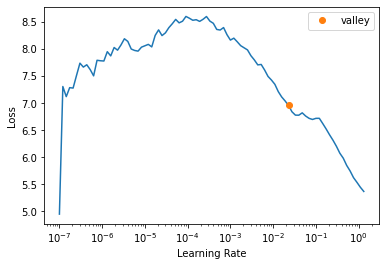

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.04       0.05
1   -0.19      -0.19
2    0.17       0.17
3   -0.29      -0.29
4    0.06       0.07
XGBoost RMSE:  0.01663621


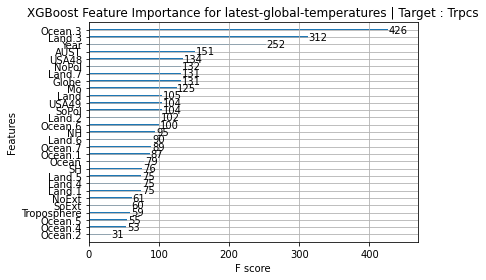

Target Variable: Ocean.2
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.66it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9664090528442675, 'Adjusted R-Squared': 0.9639048434162052, 'RMSE': 0.05742473009684744, 'Time taken': 0.3754281997680664}


 10%|▉         | 4/42 [00:00<00:05,  6.39it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9944792904040641, 'Adjusted R-Squared': 0.9940677207940843, 'RMSE': 0.02328012399476609, 'Time taken': 0.20953822135925293}
{'Model': 'BayesianRidge', 'R-Squared': 0.9998707411741551, 'Adjusted R-Squared': 0.9998611049120741, 'RMSE': 0.0035621970616335494, 'Time taken': 0.032347917556762695}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9923078669438803, 'Adjusted R-Squared': 0.9917344174358406, 'RMSE': 0.027479652201718156, 'Time taken': 0.1344459056854248}
{'Model': 'DummyRegressor', 'R-Squared': -0.0035905658098043247, 'Adjusted R-Squared': -0.07840837148714197, 'RMSE': 0.31388178, 'Time taken': 0.012219429016113281}
{'Model': 'ElasticNet', 'R-Squared': -0.0035905658098043247, 'Adjusted R-Squared': -0.07840837148714197, 'RMSE': 0.31388178, 'Time taken': 0.014519691467285156}


 17%|█▋        | 7/42 [00:01<00:03,  8.75it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9995234549448786, 'Adjusted R-Squared': 0.9994879284497667, 'RMSE': 0.0068397433, 'Time taken': 0.22026634216308594}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9727274500093472, 'Adjusted R-Squared': 0.970694277902075, 'RMSE': 0.0517428934886011, 'Time taken': 0.03414344787597656}


 21%|██▏       | 9/42 [00:02<00:09,  3.64it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.996321868335951, 'Adjusted R-Squared': 0.9960476631476286, 'RMSE': 0.01900209449580931, 'Time taken': 1.0992865562438965}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.05it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3339046862578754, 'Adjusted R-Squared': 0.28424719500203577, 'RMSE': 0.25571489567316424, 'Time taken': 0.3693270683288574}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9446236941564607, 'Adjusted R-Squared': 0.9404953834380478, 'RMSE': 0.07373094972455617, 'Time taken': 0.0620577335357666}


 31%|███       | 13/42 [00:03<00:09,  3.08it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9961664590185522, 'Adjusted R-Squared': 0.9958806680456421, 'RMSE': 0.01939938190957624, 'Time taken': 0.9108810424804688}


 33%|███▎      | 14/42 [00:04<00:10,  2.63it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9957507345585125, 'Adjusted R-Squared': 0.9954339512736715, 'RMSE': 0.020424186543217874, 'Time taken': 0.618718147277832}


 38%|███▊      | 16/42 [00:04<00:07,  3.29it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9998687446792159, 'Adjusted R-Squared': 0.9998589595781806, 'RMSE': 0.00358960198463582, 'Time taken': 0.25174593925476074}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9285958053951205, 'Adjusted R-Squared': 0.9232726135094097, 'RMSE': 0.08372395, 'Time taken': 0.14029979705810547}


 40%|████      | 17/42 [00:04<00:06,  3.72it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9969275900759343, 'Adjusted R-Squared': 0.996698541521184, 'RMSE': 0.017367104, 'Time taken': 0.16017699241638184}
{'Model': 'Lars', 'R-Squared': -274.6615687166119, 'Adjusted R-Squared': -295.21217409651354, 'RMSE': 5.202067096180159, 'Time taken': 0.05334806442260742}


 45%|████▌     | 19/42 [00:04<00:04,  5.01it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9987603625800401, 'Adjusted R-Squared': 0.9986679474510456, 'RMSE': 0.011031515423271859, 'Time taken': 0.14922428131103516}
{'Model': 'Lasso', 'R-Squared': -0.0035905658098043247, 'Adjusted R-Squared': -0.07840837148714197, 'RMSE': 0.31388178, 'Time taken': 0.01975393295288086}


 50%|█████     | 21/42 [00:05<00:04,  5.24it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9995839648089794, 'Adjusted R-Squared': 0.9995529493320138, 'RMSE': 0.0063907653, 'Time taken': 0.32953691482543945}
{'Model': 'LassoLars', 'R-Squared': -0.0035905931561823756, 'Adjusted R-Squared': -0.07840840087219592, 'RMSE': 0.31388179586689174, 'Time taken': 0.03267312049865723}


 60%|█████▉    | 25/42 [00:05<00:02,  7.80it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9998615753985903, 'Adjusted R-Squared': 0.9998512558267628, 'RMSE': 0.0036863322745427974, 'Time taken': 0.17260169982910156}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9988287891535133, 'Adjusted R-Squared': 0.9987414752343664, 'RMSE': 0.010722730249508539, 'Time taken': 0.08623671531677246}
{'Model': 'LinearRegression', 'R-Squared': 0.999870910848102, 'Adjusted R-Squared': 0.9998612872352356, 'RMSE': 0.0035598583, 'Time taken': 0.03355693817138672}


 62%|██████▏   | 26/42 [00:05<00:02,  5.60it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9994946932530853, 'Adjusted R-Squared': 0.9994570225701533, 'RMSE': 0.0070431248388066504, 'Time taken': 0.3873717784881592}


 64%|██████▍   | 27/42 [00:06<00:03,  4.25it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9507111872783834, 'Adjusted R-Squared': 0.947036699954664, 'RMSE': 0.06956039127600062, 'Time taken': 0.44162583351135254}


 79%|███████▊  | 33/42 [00:10<00:04,  2.10it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9825887133785732, 'Adjusted R-Squared': 0.9812906997229913, 'RMSE': 0.04134312211436533, 'Time taken': 4.462318420410156}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.986573884072082, 'Adjusted R-Squared': 0.9855729654039339, 'RMSE': 0.03630471519841652, 'Time taken': 0.015201330184936523}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.99980265051529, 'Adjusted R-Squared': 0.9997879380858387, 'RMSE': 0.004401551991689229, 'Time taken': 0.0356135368347168}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9928385208567877, 'Adjusted R-Squared': 0.9923046316661626, 'RMSE': 0.02651485176645316, 'Time taken': 0.022875070571899414}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9998671913529599, 'Adjusted R-Squared': 0.9998572904512525, 'RMSE': 0.0036107798, 'Time taken': 0.04201054573059082}


 83%|████████▎ | 35/42 [00:13<00:04,  1.54it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9954246561327764, 'Adjusted R-Squared': 0.9950835636593844, 'RMSE': 0.021193354745629958, 'Time taken': 2.231353521347046}
{'Model': 'Ridge', 'R-Squared': 0.9998297120326916, 'Adjusted R-Squared': 0.9998170170428408, 'RMSE': 0.0040886486, 'Time taken': 0.02502894401550293}
{'Model': 'RidgeCV', 'R-Squared': 0.9998698507040625, 'Adjusted R-Squared': 0.9998601480573217, 'RMSE': 0.0035744460728618505, 'Time taken': 0.05032753944396973}
{'Model': 'SGDRegressor', 'R-Squared': 0.9986873678586473, 'Adjusted R-Squared': 0.9985895109637907, 'RMSE': 0.01135165947905052, 'Time taken': 0.031497955322265625}


 90%|█████████ | 38/42 [00:13<00:01,  2.30it/s]

{'Model': 'SVR', 'R-Squared': 0.950039889891927, 'Adjusted R-Squared': 0.9463153572617622, 'RMSE': 0.07003248407813602, 'Time taken': 0.09679651260375977}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.999870910848102, 'Adjusted R-Squared': 0.9998612872352356, 'RMSE': 0.0035598583, 'Time taken': 0.028776884078979492}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9446236941564607, 'Adjusted R-Squared': 0.9404953834380478, 'RMSE': 0.07373094972455617, 'Time taken': 0.06031513214111328}


 98%|█████████▊| 41/42 [00:14<00:00,  2.76it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9954414761090472, 'Adjusted R-Squared': 0.9951016375670482, 'RMSE': 0.021154363, 'Time taken': 0.564258337020874}


100%|██████████| 42/42 [00:14<00:00,  2.90it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9948866039966913, 'Adjusted R-Squared': 0.9945053996673957, 'RMSE': 0.022404876359039934, 'Time taken': 0.377483606338501}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.2
Ocean.2
Target Standard Deviation: 0.3509622812271118
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearRegression                             1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.03
BayesianRidge                                1.00       1.00  0.00        0.03
RidgeCV                                      1.00       1.00  0.00        0.05
HuberRegressor                               1.00       1.00  0.00        0.25
RANSACRegressor                              1.00       1.00  0.00        0.04
LassoLarsCV                                  1.00       1.00  0.00    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.049130,0.999253,0.999626,00:01
1,3.001005,0.446399,0.668131,00:01
2,1.832422,0.152803,0.390900,00:01
3,1.109331,0.506833,0.711922,00:01


Better model found at epoch 0 with _rmse value: 0.9996264576911926.
Better model found at epoch 1 with _rmse value: 0.6681311130523682.
Better model found at epoch 2 with _rmse value: 0.3908998370170593.
No improvement since epoch 2: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean.2,Ocean.2_pred
0,36.00,3.00,5.00,-0.72,-0.69,-0.69,-1.22,-0.90,-1.36,-0.05,0.01,-0.24,-0.06,-0.28,-1.50,-1.00,-1.84,0.09,0.08,0.07,-1.93,-1.87,-1.92,-0.00,-0.03,-0.00,0.03,-0.37,0.14,0.00,-0.10
1,9.00,12.00,2.00,-1.13,-1.41,-0.91,-1.28,-1.31,-1.14,-0.69,-0.94,-0.86,-0.93,-0.84,-1.17,-1.19,-1.02,-0.36,-0.68,-0.23,-0.54,-0.75,-0.33,-0.47,-0.71,-0.35,-0.90,-1.04,0.17,-0.18,-0.42
2,4.00,5.00,4.00,-0.78,-0.88,-0.66,-0.73,-0.85,-0.57,-0.63,-0.57,-0.30,-0.33,-0.28,-0.78,-0.90,-0.61,-0.59,-0.40,-0.61,-0.17,-0.22,-0.12,-0.17,0.09,-0.38,-0.94,-0.75,-1.11,-0.19,0.04
3,28.00,4.00,3.00,0.32,0.71,0.10,0.60,0.94,0.30,-0.05,-0.05,-0.55,-0.35,-0.59,1.12,1.12,1.01,0.23,0.13,0.24,0.75,0.80,0.69,-0.03,-0.01,-0.05,1.00,1.73,0.86,0.00,0.11
4,45.00,2.00,3.00,0.48,0.39,0.51,0.19,0.61,-0.14,0.68,-0.18,-0.09,-0.25,-0.03,0.26,0.70,-0.25,0.92,-0.01,1.13,-2.06,-1.81,-2.21,0.02,-0.07,0.07,2.14,2.15,0.32,0.32,0.02
5,16.00,13.00,5.00,1.05,0.98,0.98,0.52,0.51,0.49,1.29,1.42,0.06,-0.08,0.09,0.67,0.60,0.65,1.58,1.71,1.43,-0.78,-0.74,-0.79,1.63,1.97,1.52,0.94,0.80,-0.93,0.43,0.47
6,41.00,12.00,5.00,0.98,1.25,0.79,0.60,0.51,0.60,1.15,2.10,0.08,-0.04,0.09,0.74,0.60,0.82,1.37,2.47,0.94,1.23,1.12,1.29,2.23,2.77,2.03,0.41,0.75,-0.00,0.30,0.26
7,15.00,11.00,3.00,1.11,0.74,1.20,1.31,1.11,1.33,0.62,-0.32,1.77,1.84,1.76,0.64,0.74,0.48,-0.20,-1.28,0.12,-0.14,-0.27,-0.02,-1.56,-1.63,-1.66,1.03,0.47,0.57,0.32,0.38
8,13.00,5.00,5.00,0.23,0.12,0.23,0.03,-0.04,0.05,0.34,0.38,0.08,0.14,0.05,0.02,-0.04,0.12,0.34,0.31,0.33,0.51,0.43,0.57,0.20,0.18,0.21,-0.13,0.03,0.27,0.13,-0.06


<Figure size 432x288 with 0 Axes>

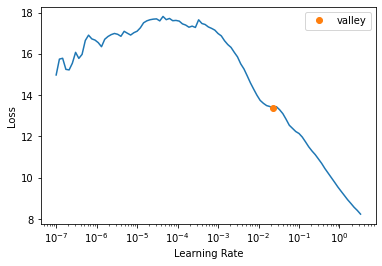

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.17       0.17
1   -0.11      -0.12
2   -0.05      -0.05
3   -0.03      -0.04
4   -0.38      -0.39
XGBoost RMSE:  0.021331433


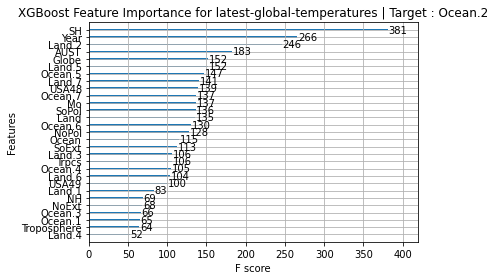

Target Variable: Land.2
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.60it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.92307522060513, 'Adjusted R-Squared': 0.9173404684137387, 'RMSE': 0.12981325092058776, 'Time taken': 0.3843238353729248}


 10%|▉         | 4/42 [00:00<00:06,  6.31it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9718588636092264, 'Adjusted R-Squared': 0.9697609382741815, 'RMSE': 0.07851573705539001, 'Time taken': 0.213637113571167}
{'Model': 'BayesianRidge', 'R-Squared': 0.9986321258216639, 'Adjusted R-Squared': 0.9985301506258497, 'RMSE': 0.017310474480827502, 'Time taken': 0.030104398727416992}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.96202988674348, 'Adjusted R-Squared': 0.9591992099197292, 'RMSE': 0.09120252089446841, 'Time taken': 0.13550138473510742}
{'Model': 'DummyRegressor', 'R-Squared': -0.005178634254662695, 'Adjusted R-Squared': -0.0801148306386863, 'RMSE': 0.4692535, 'Time taken': 0.010526180267333984}
{'Model': 'ElasticNet', 'R-Squared': -0.005178634254662695, 'Adjusted R-Squared': -0.0801148306386863, 'RMSE': 0.4692535, 'Time taken': 0.013365507125854492}


 17%|█▋        | 7/42 [00:01<00:03,  8.87it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.997259168223028, 'Adjusted R-Squared': 0.9970548388617627, 'RMSE': 0.024503442, 'Time taken': 0.21164321899414062}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9355732600768171, 'Adjusted R-Squared': 0.9307702383344718, 'RMSE': 0.11880069310584046, 'Time taken': 0.06906628608703613}


 21%|██▏       | 9/42 [00:02<00:08,  3.91it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9739455261862465, 'Adjusted R-Squared': 0.9720031618145271, 'RMSE': 0.07554870941488823, 'Time taken': 0.9643073081970215}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.36it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.31646564350272677, 'Adjusted R-Squared': 0.26550806936796867, 'RMSE': 0.3869599966244344, 'Time taken': 0.3448452949523926}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9183641446863298, 'Adjusted R-Squared': 0.9122781811796551, 'RMSE': 0.1337292380210814, 'Time taken': 0.026937246322631836}


 31%|███       | 13/42 [00:03<00:09,  3.21it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9771773237368548, 'Adjusted R-Squared': 0.9754758902879315, 'RMSE': 0.07070810225937085, 'Time taken': 0.9349346160888672}


 33%|███▎      | 14/42 [00:04<00:11,  2.40it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9624793209287512, 'Adjusted R-Squared': 0.9596821494812803, 'RMSE': 0.09066115370134513, 'Time taken': 0.8700394630432129}


 38%|███▊      | 16/42 [00:04<00:08,  3.10it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9996143437516014, 'Adjusted R-Squared': 0.9995855930287131, 'RMSE': 0.009191493459231261, 'Time taken': 0.26787567138671875}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9000808175228613, 'Adjusted R-Squared': 0.892631829626108, 'RMSE': 0.14794841, 'Time taken': 0.11205196380615234}


 40%|████      | 17/42 [00:04<00:07,  3.51it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9982890734129306, 'Adjusted R-Squared': 0.9981615236159511, 'RMSE': 0.019359833, 'Time taken': 0.16687893867492676}
{'Model': 'Lars', 'R-Squared': -2257591.820145971, 'Adjusted R-Squared': -2425895.655066879, 'RMSE': 703.2483210597261, 'Time taken': 0.052472591400146484}


 45%|████▌     | 19/42 [00:05<00:05,  4.51it/s]

{'Model': 'LarsCV', 'R-Squared': 0.7927600730413493, 'Adjusted R-Squared': 0.7773103098490592, 'RMSE': 0.21307015002317098, 'Time taken': 0.2118537425994873}
{'Model': 'Lasso', 'R-Squared': -0.005178634254662695, 'Adjusted R-Squared': -0.0801148306386863, 'RMSE': 0.4692535, 'Time taken': 0.04779696464538574}


 50%|█████     | 21/42 [00:05<00:04,  4.65it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9974237149490384, 'Adjusted R-Squared': 0.9972316525673471, 'RMSE': 0.02375652, 'Time taken': 0.3585329055786133}
{'Model': 'LassoLars', 'R-Squared': -0.00517864922556921, 'Adjusted R-Squared': -0.08011484672567581, 'RMSE': 0.46925350374493147, 'Time taken': 0.028705120086669922}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9997474224911617, 'Adjusted R-Squared': 0.9997285928054128, 'RMSE': 0.007438463463055578, 'Time taken': 0.16831207275390625}


 55%|█████▍    | 23/42 [00:05<00:03,  5.71it/s]

{'Model': 'LassoLarsIC', 'R-Squared': 0.9951394107071582, 'Adjusted R-Squared': 0.9947770531506224, 'RMSE': 0.032630998202267364, 'Time taken': 0.05781722068786621}
{'Model': 'LinearRegression', 'R-Squared': 0.9983262384964544, 'Adjusted R-Squared': 0.9982014593612286, 'RMSE': 0.019148408, 'Time taken': 0.024109840393066406}


 62%|██████▏   | 26/42 [00:06<00:02,  5.94it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9974730657347296, 'Adjusted R-Squared': 0.997284682460455, 'RMSE': 0.02352788391023479, 'Time taken': 0.39138031005859375}


 64%|██████▍   | 27/42 [00:06<00:03,  4.22it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9712908674826009, 'Adjusted R-Squared': 0.9691505979633089, 'RMSE': 0.07930415305725727, 'Time taken': 0.5692319869995117}


 79%|███████▊  | 33/42 [00:08<00:01,  4.83it/s]

{'Model': 'NuSVR', 'R-Squared': 0.8509700362736287, 'Adjusted R-Squared': 0.8398598333223053, 'RMSE': 0.18068524721589155, 'Time taken': 1.3802459239959717}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9957411108522843, 'Adjusted R-Squared': 0.9954236101189071, 'RMSE': 0.030544573438498323, 'Time taken': 0.017670392990112305}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9960978237977391, 'Adjusted R-Squared': 0.9958069160602956, 'RMSE': 0.029237439382120776, 'Time taken': 0.039104461669921875}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9919438351162864, 'Adjusted R-Squared': 0.9913432469887088, 'RMSE': 0.04200974733537918, 'Time taken': 0.02408123016357422}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9997408484966815, 'Adjusted R-Squared': 0.9997215287187992, 'RMSE': 0.007534644, 'Time taken': 0.028229236602783203}


 83%|████████▎ | 35/42 [00:10<00:03,  2.25it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9729558875326532, 'Adjusted R-Squared': 0.9709397454721055, 'RMSE': 0.07697013762050685, 'Time taken': 2.286916971206665}
{'Model': 'Ridge', 'R-Squared': 0.9991636281001609, 'Adjusted R-Squared': 0.9991012764675251, 'RMSE': 0.013535853, 'Time taken': 0.023388385772705078}
{'Model': 'RidgeCV', 'R-Squared': 0.9995237091233783, 'Adjusted R-Squared': 0.9994882015773062, 'RMSE': 0.010214615599184657, 'Time taken': 0.04922151565551758}
{'Model': 'SGDRegressor', 'R-Squared': 0.9906761517208139, 'Adjusted R-Squared': 0.9899810576331625, 'RMSE': 0.04519428243582202, 'Time taken': 0.0318751335144043}


 90%|█████████ | 38/42 [00:10<00:01,  3.16it/s]

{'Model': 'SVR', 'R-Squared': 0.8253976126084696, 'Adjusted R-Squared': 0.8123809821859647, 'RMSE': 0.1955739400647858, 'Time taken': 0.14782190322875977}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9983262384964544, 'Adjusted R-Squared': 0.9982014593612286, 'RMSE': 0.019148408, 'Time taken': 0.02034282684326172}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9183641446863298, 'Adjusted R-Squared': 0.9122781811796551, 'RMSE': 0.1337292380210814, 'Time taken': 0.05922198295593262}


 98%|█████████▊| 41/42 [00:11<00:00,  3.50it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9746879601920615, 'Adjusted R-Squared': 0.9728009443709041, 'RMSE': 0.07446454, 'Time taken': 0.5888149738311768}


100%|██████████| 42/42 [00:11<00:00,  3.56it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9664303265779711, 'Adjusted R-Squared': 0.9639277031094908, 'RMSE': 0.08575500064527387, 'Time taken': 0.36788344383239746}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.2
Land.2
Target Standard Deviation: 0.48296216130256653
                               Adjusted R-Squared   R-Squared   RMSE  \
Model                                                                  
LassoLarsCV                                  1.00        1.00   0.01   
RANSACRegressor                              1.00        1.00   0.01   
HuberRegressor                               1.00        1.00   0.01   
RidgeCV                                      1.00        1.00   0.01   
Ridge                                        1.00        1.00   0.01   
BayesianRidge                                1.00        1.00   0.02   
LinearRegression                             1.00        1.00   0.02   
TransformedTargetRegressor                   1.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.217061,1.539790,1.240883,00:01
1,2.782207,0.757013,0.870065,00:01
2,1.660371,0.271222,0.520790,00:01
3,0.990225,0.113872,0.337450,00:01
4,0.629254,0.149732,0.386952,00:01


Better model found at epoch 0 with _rmse value: 1.2408828735351562.
Better model found at epoch 1 with _rmse value: 0.8700651526451111.
Better model found at epoch 2 with _rmse value: 0.5207900404930115.
Better model found at epoch 3 with _rmse value: 0.337449848651886.
No improvement since epoch 3: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,SH,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land.2,Land.2_pred
0,25.00,9.00,3.00,-0.62,-0.43,-0.66,-0.53,-0.64,-0.40,-0.55,-0.71,-0.06,-0.03,-0.06,-0.60,-0.66,-0.47,-0.73,0.10,-0.92,-0.21,-0.13,-0.29,-0.93,-0.58,-1.13,-0.46,-0.47,1.29,0.08,-0.06
1,22.00,9.00,2.00,-0.17,-0.43,-0.05,0.07,0.03,0.09,-0.38,-0.14,0.30,0.08,0.37,-0.12,-0.10,-0.13,-0.61,-1.18,-0.40,-0.05,0.07,-0.16,-0.58,-0.93,-0.30,-0.29,0.00,-1.08,-0.53,-0.10
2,27.00,13.00,4.00,0.17,-0.27,0.39,-0.15,-0.55,0.17,0.46,0.47,0.38,0.16,0.44,-0.41,-0.64,-0.10,0.35,0.35,0.34,0.27,0.06,0.46,0.77,0.63,0.82,-0.51,-0.12,-0.86,0.21,-0.00
3,21.00,3.00,4.00,-0.74,-0.62,-0.75,-0.83,-0.57,-0.92,-0.47,-0.45,-0.43,-0.26,-0.48,-0.81,-0.58,-0.98,-0.36,-0.36,-0.35,-0.87,-0.67,-1.01,-0.12,-0.02,-0.18,0.54,0.41,-0.66,-0.20,-0.08
4,23.00,4.00,5.00,1.19,0.75,1.28,1.28,0.65,1.60,0.80,0.78,1.98,1.93,1.99,0.46,0.22,0.68,-0.15,-0.22,-0.11,-0.02,0.13,-0.15,-0.32,-0.28,-0.33,0.32,0.54,-0.16,0.32,0.05
5,12.00,4.00,3.00,0.30,0.81,0.07,0.02,0.84,-0.57,0.51,0.53,-1.29,-1.08,-1.35,0.84,1.21,0.36,1.40,1.06,1.39,0.91,0.79,0.96,0.60,0.53,0.61,-1.32,-2.03,2.26,0.21,-0.02
6,23.00,4.00,2.00,1.06,-0.08,1.50,0.79,-0.36,1.57,1.05,1.16,2.11,1.87,2.18,-0.24,-0.81,0.39,0.10,-0.51,0.27,-0.16,-0.22,-0.08,-0.61,-0.76,-0.47,-1.20,-0.49,0.54,0.25,-0.14
7,37.00,4.00,3.00,-1.34,-0.67,-1.54,-1.03,-0.55,-1.28,-1.31,-1.46,-0.89,-0.87,-0.87,-0.93,-0.39,-1.37,-1.05,-0.21,-1.21,0.59,0.90,0.27,-0.01,0.24,-0.20,-2.12,-1.20,-1.49,-0.27,-0.09
8,40.00,2.00,5.00,0.17,0.32,0.11,0.57,0.51,0.53,-0.24,-0.25,-0.25,-0.38,-0.19,0.89,0.66,1.05,-0.15,0.03,-0.21,0.77,0.72,0.76,0.08,0.10,0.05,-0.82,-0.61,0.27,-0.07,-0.01


<Figure size 432x288 with 0 Axes>

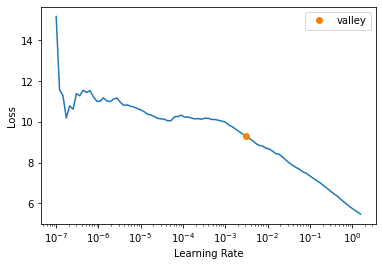

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.04       0.07
1   -0.34      -0.39
2   -0.01      -0.02
3   -0.89      -0.84
4    0.04       0.06
XGBoost RMSE:  0.074334376


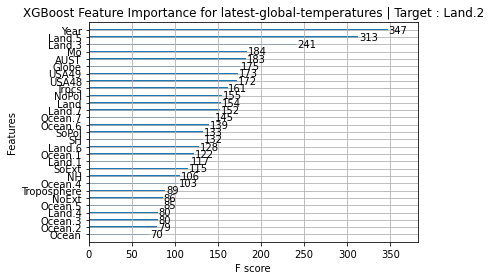

Target Variable: SH
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  5%|▍         | 2/42 [00:00<00:11,  3.58it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9837709852068286, 'Adjusted R-Squared': 0.9825611100680061, 'RMSE': 0.050323069536574186, 'Time taken': 0.3934166431427002}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9925623070553279, 'Adjusted R-Squared': 0.9920078260903009, 'RMSE': 0.03406749244134727, 'Time taken': 0.19872522354125977}


 12%|█▏        | 5/42 [00:00<00:03,  9.48it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9999279338012423, 'Adjusted R-Squared': 0.999922561256862, 'RMSE': 0.0033534115300615035, 'Time taken': 0.020607709884643555}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.988747614872168, 'Adjusted R-Squared': 0.9879087481145661, 'RMSE': 0.04190282852454352, 'Time taken': 0.06946229934692383}
{'Model': 'DummyRegressor', 'R-Squared': -0.00018732582285774235, 'Adjusted R-Squared': -0.07475141952173403, 'RMSE': 0.39505878, 'Time taken': 0.01785731315612793}
{'Model': 'ElasticNet', 'R-Squared': -0.00018732582285774235, 'Adjusted R-Squared': -0.07475141952173403, 'RMSE': 0.39505878, 'Time taken': 0.020205974578857422}


 17%|█▋        | 7/42 [00:00<00:03,  9.36it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999024202627672, 'Adjusted R-Squared': 0.9998951456808142, 'RMSE': 0.0039021224, 'Time taken': 0.1961076259613037}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9841637637095029, 'Adjusted R-Squared': 0.9829831702585403, 'RMSE': 0.049710374190416934, 'Time taken': 0.03287529945373535}


 21%|██▏       | 9/42 [00:01<00:07,  4.15it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9963567185339349, 'Adjusted R-Squared': 0.9960851114323517, 'RMSE': 0.023843357357457077, 'Time taken': 0.9109516143798828}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:06,  4.59it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.20811881957473022, 'Adjusted R-Squared': 0.14908397578981292, 'RMSE': 0.351520823161208, 'Time taken': 0.3366382122039795}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9705936729517503, 'Adjusted R-Squared': 0.9684014274905697, 'RMSE': 0.06773941428850881, 'Time taken': 0.02723407745361328}


 31%|███       | 13/42 [00:03<00:08,  3.33it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9974498483314392, 'Adjusted R-Squared': 0.9972597341967651, 'RMSE': 0.01994821548706731, 'Time taken': 0.9047276973724365}


 33%|███▎      | 14/42 [00:03<00:10,  2.77it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.990473244273421, 'Adjusted R-Squared': 0.9897630234094857, 'RMSE': 0.038556141063064195, 'Time taken': 0.6177771091461182}


 36%|███▌      | 15/42 [00:04<00:09,  2.99it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999271617422116, 'Adjusted R-Squared': 0.9999217316407313, 'RMSE': 0.003371326547077781, 'Time taken': 0.23547148704528809}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9457832901060373, 'Adjusted R-Squared': 0.9417414274147137, 'RMSE': 0.09197877, 'Time taken': 0.08871006965637207}


 45%|████▌     | 19/42 [00:04<00:04,  5.33it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9991126129646588, 'Adjusted R-Squared': 0.9990464581471141, 'RMSE': 0.01176732, 'Time taken': 0.13109922409057617}
{'Model': 'Lars', 'R-Squared': 0.9740099982227781, 'Adjusted R-Squared': 0.972072440249669, 'RMSE': 0.06368310061724063, 'Time taken': 0.05194282531738281}
{'Model': 'LarsCV', 'R-Squared': 0.9999055981808164, 'Adjusted R-Squared': 0.9998985605130624, 'RMSE': 0.0038380552957841723, 'Time taken': 0.09284090995788574}
{'Model': 'Lasso', 'R-Squared': -0.00018732582285774235, 'Adjusted R-Squared': -0.07475141952173403, 'RMSE': 0.39505878, 'Time taken': 0.0380854606628418}


 55%|█████▍    | 23/42 [00:04<00:02,  7.14it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9999053263107093, 'Adjusted R-Squared': 0.9998982683750038, 'RMSE': 0.003843578, 'Time taken': 0.20621681213378906}
{'Model': 'LassoLars', 'R-Squared': -0.00018733341309484786, 'Adjusted R-Squared': -0.07475142767782428, 'RMSE': 0.3950587823307058, 'Time taken': 0.03685879707336426}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9999131343848308, 'Adjusted R-Squared': 0.9999066585420546, 'RMSE': 0.003681671159578646, 'Time taken': 0.13282537460327148}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9998863786473766, 'Adjusted R-Squared': 0.9998779081609342, 'RMSE': 0.004210668227071345, 'Time taken': 0.04141688346862793}
{'Model': 'LinearRegression', 'R-Squared': 0.9999278735306913, 'Adjusted R-Squared': 0.9999224964931336, 'RMSE': 0.0033548134, 'Time taken': 0.03463482856750488}


 62%|██████▏   | 26/42 [00:05<00:02,  6.76it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.999817220904575, 'Adjusted R-Squared': 0.9998035946995176, 'RMSE': 0.005340529366512762, 'Time taken': 0.3970303535461426}


 64%|██████▍   | 27/42 [00:05<00:03,  4.32it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9716896291990444, 'Adjusted R-Squared': 0.9695790874169681, 'RMSE': 0.06646512479280267, 'Time taken': 0.660008430480957}


 79%|███████▊  | 33/42 [00:11<00:05,  1.78it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9197293456212741, 'Adjusted R-Squared': 0.9137451580197752, 'RMSE': 0.11191787289544552, 'Time taken': 5.835255146026611}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9954233392201998, 'Adjusted R-Squared': 0.9950821485708059, 'RMSE': 0.02672362738409643, 'Time taken': 0.015712499618530273}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9997191272510826, 'Adjusted R-Squared': 0.9996981881515489, 'RMSE': 0.006620272226352906, 'Time taken': 0.036141157150268555}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9938912470043574, 'Adjusted R-Squared': 0.9934358386833455, 'RMSE': 0.030874314813444312, 'Time taken': 0.022989273071289062}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999275795025392, 'Adjusted R-Squared': 0.9999221805451449, 'RMSE': 0.0033616447, 'Time taken': 0.029466629028320312}


 88%|████████▊ | 37/42 [00:13<00:02,  1.98it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9938539357617228, 'Adjusted R-Squared': 0.9933957458827767, 'RMSE': 0.030968458856430448, 'Time taken': 1.9234986305236816}
{'Model': 'Ridge', 'R-Squared': 0.9999184893474143, 'Adjusted R-Squared': 0.9999124127177871, 'RMSE': 0.003566385, 'Time taken': 0.023128747940063477}
{'Model': 'RidgeCV', 'R-Squared': 0.9999279014826499, 'Adjusted R-Squared': 0.9999225265289142, 'RMSE': 0.0033541633762434147, 'Time taken': 0.05005693435668945}
{'Model': 'SGDRegressor', 'R-Squared': 0.9995208090364096, 'Adjusted R-Squared': 0.9994850852884812, 'RMSE': 0.008647197046900602, 'Time taken': 0.053060054779052734}


 93%|█████████▎| 39/42 [00:14<00:01,  2.59it/s]

{'Model': 'SVR', 'R-Squared': 0.8942817205834821, 'Adjusted R-Squared': 0.8864004092645129, 'RMSE': 0.12843875549390435, 'Time taken': 0.09951591491699219}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999278735306913, 'Adjusted R-Squared': 0.9999224964931336, 'RMSE': 0.0033548134, 'Time taken': 0.03333330154418945}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9705936729517503, 'Adjusted R-Squared': 0.9684014274905697, 'RMSE': 0.06773941428850881, 'Time taken': 0.05723381042480469}


 98%|█████████▊| 41/42 [00:14<00:00,  2.74it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9959984910453359, 'Adjusted R-Squared': 0.9957001780384329, 'RMSE': 0.024988083, 'Time taken': 0.559295654296875}


100%|██████████| 42/42 [00:15<00:00,  2.79it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9902667021623536, 'Adjusted R-Squared': 0.9895410835574905, 'RMSE': 0.038971852676727335, 'Time taken': 0.3635690212249756}
Project: latest-global-temperatures
latest-global-temperatures
Target: SH
SH
Target Standard Deviation: 0.34071722626686096
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                1.00       1.00  0.00        0.02
RidgeCV                                      1.00       1.00  0.00        0.05
LinearRegression                             1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.03
RANSACRegressor                              1.00       1.00  0.00        0.03
HuberRegressor                               1.00       1.00  0.00        0.24
Ridge                                        1.00       1.00  0.00        0.02

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.302231,1.143217,1.069213,00:01
1,1.867624,0.449808,0.670677,00:01
2,1.025091,0.068822,0.262340,00:01
3,0.594379,0.054151,0.232703,00:01
4,0.367039,0.075721,0.275174,00:01


Better model found at epoch 0 with _rmse value: 1.0692133903503418.
Better model found at epoch 1 with _rmse value: 0.6706774830818176.
Better model found at epoch 2 with _rmse value: 0.26234012842178345.
Better model found at epoch 3 with _rmse value: 0.2327030599117279.
No improvement since epoch 3: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,Ocean.1,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,SH,SH_pred
0,46.00,11.00,2.00,1.19,1.69,0.86,1.27,1.75,0.81,0.83,0.72,0.68,1.13,0.55,1.30,1.63,0.81,0.55,0.42,0.55,0.50,0.60,0.37,0.06,0.47,-0.23,1.17,0.84,0.11,0.27,0.10
1,43.00,13.00,5.00,0.21,0.39,0.10,0.41,0.28,0.45,0.36,-0.16,0.11,-0.05,0.17,0.44,0.31,0.54,-0.12,0.49,-0.30,0.77,0.56,0.91,0.22,0.45,0.06,0.21,0.59,0.52,-0.01,0.01
2,46.00,12.00,4.00,-0.09,0.22,-0.23,0.27,0.62,-0.02,-0.68,-0.34,0.34,0.69,0.23,0.15,0.51,-0.23,-0.73,-1.08,-0.57,-0.29,-0.13,-0.43,-1.37,-1.29,-1.55,0.23,-0.29,0.09,-0.14,-0.10
3,16.00,5.00,4.00,-0.39,-0.06,-0.50,-0.40,-0.21,-0.52,0.28,-0.40,-0.26,-0.45,-0.19,-0.39,-0.14,-0.60,-0.15,0.60,-0.37,-0.01,0.24,-0.25,0.43,0.73,0.26,-0.26,-0.29,-0.70,-0.07,0.01
4,12.00,6.00,4.00,-0.45,-0.95,-0.20,-0.93,-0.95,-0.85,-0.51,0.36,-0.11,-0.16,-0.11,-1.15,-0.98,-1.17,0.22,-0.56,0.45,-0.39,-0.51,-0.25,-0.11,-0.31,0.00,0.45,0.21,-0.25,0.07,-0.03
5,23.00,2.00,2.00,1.09,0.03,1.48,0.57,-0.39,1.22,0.83,1.38,2.19,1.77,2.29,-0.56,-0.89,-0.18,0.36,0.03,0.43,-0.03,-0.02,-0.02,-0.15,-0.38,-0.01,0.19,0.21,0.80,0.46,-0.01
6,28.00,11.00,5.00,0.17,0.05,0.20,0.27,0.28,0.23,-0.44,0.15,-0.13,-0.14,-0.13,0.44,0.36,0.49,0.11,-0.43,0.26,0.68,0.60,0.71,0.17,-0.32,0.51,-0.17,-0.03,-0.04,0.02,-0.02
7,22.00,4.00,2.00,-0.88,-1.09,-0.73,-1.02,-1.19,-0.77,-0.38,-0.55,-0.79,-0.71,-0.81,-0.81,-1.02,-0.50,-0.24,-0.30,-0.20,-0.08,-0.22,0.06,0.21,0.00,0.36,0.96,0.44,-0.37,-0.17,-0.13
8,39.00,13.00,5.00,0.24,0.25,0.23,0.16,0.40,-0.05,-0.13,0.39,0.11,0.08,0.12,0.12,0.38,-0.16,0.29,-0.13,0.38,-0.24,-0.08,-0.37,0.19,-0.24,0.48,-0.08,-0.07,0.29,0.11,-0.01


<Figure size 432x288 with 0 Axes>

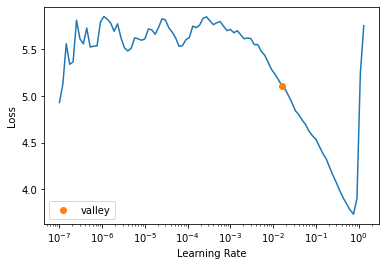

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.32      -0.32
1   -0.05      -0.04
2   -0.26      -0.27
3   -0.04      -0.03
4    0.01       0.02
XGBoost RMSE:  0.024950285


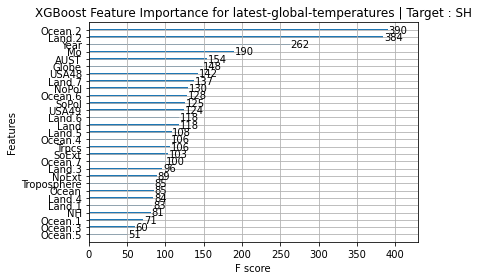

Target Variable: Ocean.1
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.66it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9487647612279778, 'Adjusted R-Squared': 0.9449451675920173, 'RMSE': 0.07623450580433548, 'Time taken': 0.37526869773864746}


 12%|█▏        | 5/42 [00:00<00:03,  9.34it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9814570516709614, 'Adjusted R-Squared': 0.9800746724896192, 'RMSE': 0.04586238134022954, 'Time taken': 0.21464920043945312}
{'Model': 'BayesianRidge', 'R-Squared': 0.9998449604165511, 'Adjusted R-Squared': 0.9998334021956771, 'RMSE': 0.004193614483093465, 'Time taken': 0.01885247230529785}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.953812372581958, 'Adjusted R-Squared': 0.9503690790212299, 'RMSE': 0.07238190916062666, 'Time taken': 0.07453513145446777}
{'Model': 'DummyRegressor', 'R-Squared': -0.0003256021671143028, 'Adjusted R-Squared': -0.07490000438522815, 'RMSE': 0.33685103, 'Time taken': 0.019243955612182617}
{'Model': 'ElasticNet', 'R-Squared': -0.0003256021671143028, 'Adjusted R-Squared': -0.07490000438522815, 'RMSE': 0.33685103, 'Time taken': 0.02054119110107422}


 17%|█▋        | 7/42 [00:01<00:05,  6.95it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9991039564313656, 'Adjusted R-Squared': 0.9990371562681513, 'RMSE': 0.0100816535, 'Time taken': 0.37296414375305176}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9494970092585784, 'Adjusted R-Squared': 0.9457320048074184, 'RMSE': 0.07568777801880196, 'Time taken': 0.07249021530151367}


 21%|██▏       | 9/42 [00:02<00:09,  3.34it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9867092235848354, 'Adjusted R-Squared': 0.9857183944947588, 'RMSE': 0.03882776416525363, 'Time taken': 1.0592002868652344}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:08,  3.57it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.39607589884169725, 'Adjusted R-Squared': 0.35105327947514, 'RMSE': 0.26173294259342844, 'Time taken': 0.47484302520751953}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9409037567996129, 'Adjusted R-Squared': 0.9364981242731059, 'RMSE': 0.08187421398847519, 'Time taken': 0.05810952186584473}


 31%|███       | 13/42 [00:03<00:10,  2.85it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.989425281012402, 'Adjusted R-Squared': 0.9886369343526582, 'RMSE': 0.03463391802518435, 'Time taken': 0.9321660995483398}


 33%|███▎      | 14/42 [00:04<00:11,  2.48it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9867960414053927, 'Adjusted R-Squared': 0.9858116845949978, 'RMSE': 0.03870074130690607, 'Time taken': 0.6205661296844482}


 38%|███▊      | 16/42 [00:04<00:08,  3.22it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9998427852915814, 'Adjusted R-Squared': 0.9998310649148613, 'RMSE': 0.004222929142266912, 'Time taken': 0.20917296409606934}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9004012793330053, 'Adjusted R-Squared': 0.8929761819053887, 'RMSE': 0.106290415, 'Time taken': 0.1418139934539795}


 45%|████▌     | 19/42 [00:04<00:04,  5.24it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9982565984278756, 'Adjusted R-Squared': 0.9981266276165861, 'RMSE': 0.0140626095, 'Time taken': 0.13598918914794922}
{'Model': 'Lars', 'R-Squared': -33.84317647324441, 'Adjusted R-Squared': -36.44073975788217, 'RMSE': 1.9880443900727502, 'Time taken': 0.04791736602783203}
{'Model': 'LarsCV', 'R-Squared': 0.8603843080612452, 'Adjusted R-Squared': 0.8499759402817494, 'RMSE': 0.12584452433915072, 'Time taken': 0.1151418685913086}
{'Model': 'Lasso', 'R-Squared': -0.0003256021671143028, 'Adjusted R-Squared': -0.07490000438522815, 'RMSE': 0.33685103, 'Time taken': 0.032845258712768555}


 50%|█████     | 21/42 [00:05<00:04,  4.90it/s]

{'Model': 'LassoCV', 'R-Squared': 0.999231102321915, 'Adjusted R-Squared': 0.9991737809011838, 'RMSE': 0.009339024, 'Time taken': 0.41077351570129395}
{'Model': 'LassoLars', 'R-Squared': -0.0003255975305060943, 'Adjusted R-Squared': -0.07489999940296022, 'RMSE': 0.33685104435094665, 'Time taken': 0.025210857391357422}


 55%|█████▍    | 23/42 [00:05<00:03,  5.76it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9998201942472146, 'Adjusted R-Squared': 0.9998067897052332, 'RMSE': 0.004516156656915731, 'Time taken': 0.20485973358154297}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9969183168355737, 'Adjusted R-Squared': 0.9966885769595626, 'RMSE': 0.01869653814571495, 'Time taken': 0.05650901794433594}
{'Model': 'LinearRegression', 'R-Squared': 0.9998448452687688, 'Adjusted R-Squared': 0.9998332784636128, 'RMSE': 0.0041951714, 'Time taken': 0.026320219039916992}


 62%|██████▏   | 26/42 [00:06<00:02,  6.01it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9996793686635391, 'Adjusted R-Squared': 0.9996554655561937, 'RMSE': 0.006030734227604172, 'Time taken': 0.38707542419433594}


 64%|██████▍   | 27/42 [00:06<00:03,  4.18it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9590910287050116, 'Adjusted R-Squared': 0.9560412596367477, 'RMSE': 0.06812028973021236, 'Time taken': 0.592355489730835}


 74%|███████▍  | 31/42 [00:09<00:04,  2.22it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9715071878269742, 'Adjusted R-Squared': 0.96938304501716, 'RMSE': 0.05685057539859688, 'Time taken': 3.082244873046875}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9934021038903419, 'Adjusted R-Squared': 0.9929102298873083, 'RMSE': 0.027357092790802014, 'Time taken': 0.024941682815551758}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9990463179297128, 'Adjusted R-Squared': 0.9989752208087916, 'RMSE': 0.010400854379211795, 'Time taken': 0.05464482307434082}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9918743335993527, 'Adjusted R-Squared': 0.9912685641247544, 'RMSE': 0.030359645857427116, 'Time taken': 0.035318613052368164}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9998447900339414, 'Adjusted R-Squared': 0.999833219111022, 'RMSE': 0.0041959183, 'Time taken': 0.05805087089538574}


 90%|█████████ | 38/42 [00:12<00:01,  2.99it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.983439509500353, 'Adjusted R-Squared': 0.9822049228050065, 'RMSE': 0.04334148675697771, 'Time taken': 2.1049699783325195}
{'Model': 'Ridge', 'R-Squared': 0.9997217151057362, 'Adjusted R-Squared': 0.9997009689310995, 'RMSE': 0.005618392, 'Time taken': 0.015018701553344727}
{'Model': 'RidgeCV', 'R-Squared': 0.9998439429146099, 'Adjusted R-Squared': 0.9998323088388353, 'RMSE': 0.004207353015927925, 'Time taken': 0.023587703704833984}
{'Model': 'SGDRegressor', 'R-Squared': 0.9976031670558725, 'Adjusted R-Squared': 0.9974244828518115, 'RMSE': 0.01648868759766626, 'Time taken': 0.022309303283691406}
{'Model': 'SVR', 'R-Squared': 0.9437824214808106, 'Adjusted R-Squared': 0.9395913937762952, 'RMSE': 0.07985521340438338, 'Time taken': 0.0776371955871582}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9998448452687688, 'Adjusted R-Squared': 0.9998332784636128, 'RMSE': 0.0041951714, 'Time taken': 0.023694992065429688}
{'Model': 'TweedieReg

 98%|█████████▊| 41/42 [00:12<00:00,  3.35it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9868574508928124, 'Adjusted R-Squared': 0.9858776721675979, 'RMSE': 0.03861064, 'Time taken': 0.5741350650787354}


100%|██████████| 42/42 [00:13<00:00,  3.10it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9858031080564842, 'Adjusted R-Squared': 0.9847447279373018, 'RMSE': 0.04012950894925213, 'Time taken': 0.608062744140625}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean.1
Ocean.1
Target Standard Deviation: 0.3704385757446289
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
RANSACRegressor                              1.00       1.00  0.00        0.06
RidgeCV                                      1.00       1.00  0.00        0.02
HuberRegressor                               1.00       1.00  0.00        0.21
LassoLarsCV                                  1.00       1.00  0.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,11.439022,1.722881,1.312586,00:01
1,6.179704,1.371129,1.170952,00:01
2,3.423414,0.316474,0.562561,00:01
3,1.938416,0.188424,0.434078,00:01
4,1.145693,0.053378,0.231036,00:01
5,0.698666,0.069401,0.263442,00:01


Better model found at epoch 0 with _rmse value: 1.3125855922698975.
Better model found at epoch 1 with _rmse value: 1.1709522008895874.
Better model found at epoch 2 with _rmse value: 0.5625606775283813.
Better model found at epoch 3 with _rmse value: 0.4340783357620239.
Better model found at epoch 4 with _rmse value: 0.2310362458229065.
No improvement since epoch 4: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Land.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean.1,Ocean.1_pred
0,45.00,10.00,4.00,0.82,0.87,0.75,1.20,1.04,0.22,0.12,0.22,0.56,0.73,0.49,1.25,0.98,1.41,-0.04,-0.25,0.01,0.56,0.52,0.56,-0.89,-0.82,-1.03,0.79,0.76,0.29,0.45,0.14
1,25.00,9.00,4.00,-0.73,-0.47,-0.77,-0.62,-0.53,-0.66,-0.15,-0.76,-0.72,-0.62,-0.74,-0.42,-0.47,-0.32,-0.38,0.18,-0.51,-0.29,-0.30,-0.27,0.16,0.51,-0.08,0.05,-0.14,0.04,-0.21,-0.09
2,8.00,5.00,4.00,0.34,-0.10,0.53,-0.24,-0.65,0.90,1.06,0.80,0.71,0.85,0.66,-0.75,-0.93,-0.51,0.69,0.77,0.63,-0.58,-0.69,-0.43,0.57,0.73,0.49,-1.37,-1.31,0.63,0.04,-0.15
3,46.00,3.00,5.00,-0.57,-0.50,-0.58,-0.76,-0.58,-0.26,-0.11,-0.27,-0.24,-0.12,-0.28,-0.87,-0.65,-1.02,-0.17,0.02,-0.20,-0.75,-0.88,-0.57,0.18,0.18,0.18,-0.37,-0.85,-0.32,-0.29,-0.19
4,7.00,1.00,5.00,0.34,0.68,0.18,0.63,0.92,-0.04,-0.13,0.02,-0.44,-0.31,-0.49,1.08,1.09,0.95,0.26,0.04,0.30,0.42,0.71,0.13,0.28,0.24,0.30,-0.27,-0.05,-0.32,0.14,0.07
5,29.00,2.00,4.00,0.12,0.47,-0.04,0.38,0.47,-0.21,0.20,-0.33,0.12,-0.18,0.20,0.39,0.56,0.15,-0.26,0.35,-0.42,0.79,0.84,0.69,0.02,0.25,-0.14,-1.11,-0.99,1.09,0.12,-0.00
6,44.00,10.00,5.00,0.18,0.57,0.02,-0.35,-0.15,0.73,1.76,0.39,-0.61,-0.51,-0.63,-0.18,-0.07,-0.27,1.28,2.37,0.87,-0.06,-0.04,-0.09,3.15,3.08,3.42,0.09,0.08,-1.72,-0.16,-0.27
7,18.00,4.00,2.00,-1.49,-1.95,-1.22,-1.87,-2.06,-0.74,-0.84,-0.68,-0.61,-0.91,-0.51,-2.09,-2.02,-1.94,-0.63,-0.59,-0.58,-0.60,-0.66,-0.50,-0.24,-0.54,-0.07,-1.63,-1.31,-0.01,-0.56,-0.05
8,45.00,8.00,2.00,0.91,0.81,0.91,0.90,0.78,0.70,0.54,0.71,0.92,1.08,0.85,0.72,0.65,0.75,0.26,-0.08,0.34,0.26,0.16,0.33,-0.43,-0.19,-0.64,0.48,0.35,0.38,0.35,0.10


<Figure size 432x288 with 0 Axes>

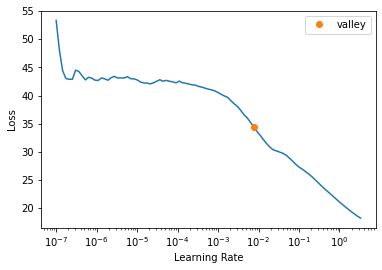

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.21      -0.20
1   -0.05      -0.05
2   -0.38      -0.40
3    0.13       0.11
4    0.24       0.25
XGBoost RMSE:  0.038516834


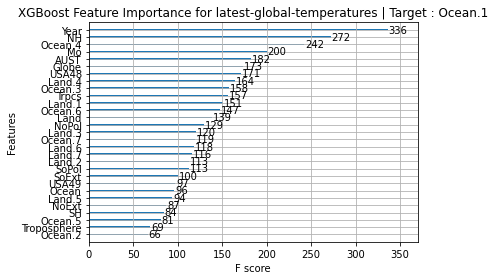

Target Variable: Land.1
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:16,  2.52it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9664625191731745, 'Adjusted R-Squared': 0.9639622956668045, 'RMSE': 0.07157034149330652, 'Time taken': 0.39705681800842285}


 10%|▉         | 4/42 [00:00<00:05,  6.45it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9889865308483083, 'Adjusted R-Squared': 0.9881654753074367, 'RMSE': 0.041013793510507386, 'Time taken': 0.2121901512145996}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999087155662141, 'Adjusted R-Squared': 0.9999019102999421, 'RMSE': 0.0037339305313608268, 'Time taken': 0.03391671180725098}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9681055921120497, 'Adjusted R-Squared': 0.9657278599044647, 'RMSE': 0.06979513357079746, 'Time taken': 0.11577773094177246}
{'Model': 'DummyRegressor', 'R-Squared': -0.002029957153706796, 'Adjusted R-Squared': -0.07673141925513982, 'RMSE': 0.39120844, 'Time taken': 0.016213417053222656}
{'Model': 'ElasticNet', 'R-Squared': -0.002029957153706796, 'Adjusted R-Squared': -0.07673141925513982, 'RMSE': 0.39120844, 'Time taken': 0.016031980514526367}


 17%|█▋        | 7/42 [00:01<00:04,  8.57it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.999519444142137, 'Adjusted R-Squared': 0.9994836186411652, 'RMSE': 0.008567218, 'Time taken': 0.227813720703125}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9633146341546227, 'Adjusted R-Squared': 0.9605797354155072, 'RMSE': 0.07485387678165814, 'Time taken': 0.03809523582458496}


 21%|██▏       | 9/42 [00:02<00:08,  3.95it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9914193413046566, 'Adjusted R-Squared': 0.9907796520960063, 'RMSE': 0.03620163494198273, 'Time taken': 0.9625449180603027}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.39it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3826884776140006, 'Adjusted R-Squared': 0.3366678242741703, 'RMSE': 0.30705774939386643, 'Time taken': 0.3447577953338623}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9309379322040744, 'Adjusted R-Squared': 0.9257893461730157, 'RMSE': 0.10270407121153693, 'Time taken': 0.06082487106323242}


 31%|███       | 13/42 [00:03<00:09,  3.20it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9925002307258337, 'Adjusted R-Squared': 0.991941121962464, 'RMSE': 0.03384478987466873, 'Time taken': 0.9132459163665771}


 33%|███▎      | 14/42 [00:04<00:11,  2.40it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9914759488742997, 'Adjusted R-Squared': 0.9908404797672423, 'RMSE': 0.036082024217312, 'Time taken': 0.8693134784698486}


 36%|███▌      | 15/42 [00:04<00:10,  2.64it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999020308358639, 'Adjusted R-Squared': 0.9998947272220852, 'RMSE': 0.0038682325234107033, 'Time taken': 0.23391938209533691}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8867218677474233, 'Adjusted R-Squared': 0.8782769684278225, 'RMSE': 0.13153487, 'Time taken': 0.07788228988647461}


 40%|████      | 17/42 [00:04<00:07,  3.55it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9993042986748504, 'Adjusted R-Squared': 0.9992524340516387, 'RMSE': 0.010308116, 'Time taken': 0.1585402488708496}
{'Model': 'Lars', 'R-Squared': 0.00654077059010072, 'Adjusted R-Squared': -0.06752174265639566, 'RMSE': 0.38953177973151715, 'Time taken': 0.06408023834228516}


 45%|████▌     | 19/42 [00:04<00:05,  4.30it/s]

{'Model': 'LarsCV', 'R-Squared': 0.998764745483617, 'Adjusted R-Squared': 0.9986726571006477, 'RMSE': 0.013735551321813356, 'Time taken': 0.21706509590148926}
{'Model': 'Lasso', 'R-Squared': -0.002029957153706796, 'Adjusted R-Squared': -0.07673141925513982, 'RMSE': 0.39120844, 'Time taken': 0.039948225021362305}


 50%|█████     | 21/42 [00:05<00:04,  4.53it/s]

{'Model': 'LassoCV', 'R-Squared': 0.999637432925386, 'Adjusted R-Squared': 0.999610403503371, 'RMSE': 0.007441527, 'Time taken': 0.3524284362792969}
{'Model': 'LassoLars', 'R-Squared': -0.0020299524487255027, 'Adjusted R-Squared': -0.07673141419940155, 'RMSE': 0.39120844607530975, 'Time taken': 0.0404362678527832}


 55%|█████▍    | 23/42 [00:05<00:03,  5.33it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999003972681165, 'Adjusted R-Squared': 0.9998929718716522, 'RMSE': 0.003900349240840529, 'Time taken': 0.1952357292175293}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9986898191268717, 'Adjusted R-Squared': 0.9985921449743763, 'RMSE': 0.014145994934903258, 'Time taken': 0.04283595085144043}
{'Model': 'LinearRegression', 'R-Squared': 0.9999087593527796, 'Adjusted R-Squared': 0.9999019573508017, 'RMSE': 0.003733035, 'Time taken': 0.02349543571472168}


 62%|██████▏   | 26/42 [00:06<00:02,  5.74it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9996727023139931, 'Adjusted R-Squared': 0.9996483022294321, 'RMSE': 0.007070324361632989, 'Time taken': 0.39506983757019043}


 64%|██████▍   | 27/42 [00:06<00:03,  4.31it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9693667744691548, 'Adjusted R-Squared': 0.9670830635683977, 'RMSE': 0.06840128096083815, 'Time taken': 0.5247135162353516}


 79%|███████▊  | 33/42 [00:09<00:03,  2.99it/s]

{'Model': 'NuSVR', 'R-Squared': 0.954438296605941, 'Adjusted R-Squared': 0.9510416657616538, 'RMSE': 0.08341955080993818, 'Time taken': 2.963460683822632}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9987727455916389, 'Adjusted R-Squared': 0.9986812536177507, 'RMSE': 0.013691000020869894, 'Time taken': 0.015923023223876953}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9988012650460892, 'Adjusted R-Squared': 0.9987118992011962, 'RMSE': 0.01353098632983714, 'Time taken': 0.038631439208984375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9951184650929707, 'Adjusted R-Squared': 0.9947545460382051, 'RMSE': 0.027305244540161634, 'Time taken': 0.025199413299560547}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999088014164348, 'Adjusted R-Squared': 0.9999020025503078, 'RMSE': 0.0037321744, 'Time taken': 0.036759376525878906}


 83%|████████▎ | 35/42 [00:11<00:03,  2.01it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9895035419845296, 'Adjusted R-Squared': 0.9887210296903172, 'RMSE': 0.04003955639605746, 'Time taken': 1.9756829738616943}
{'Model': 'Ridge', 'R-Squared': 0.9998670607159447, 'Adjusted R-Squared': 0.999857150075231, 'RMSE': 0.004506035, 'Time taken': 0.01391458511352539}
{'Model': 'RidgeCV', 'R-Squared': 0.9999065751783157, 'Adjusted R-Squared': 0.9998996103458508, 'RMSE': 0.0037774524788664015, 'Time taken': 0.046128034591674805}
{'Model': 'SGDRegressor', 'R-Squared': 0.9987123976307776, 'Adjusted R-Squared': 0.9986164067086505, 'RMSE': 0.014023575412792946, 'Time taken': 0.04932904243469238}


 90%|█████████ | 38/42 [00:11<00:01,  2.84it/s]

{'Model': 'SVR', 'R-Squared': 0.9289922919620843, 'Adjusted R-Squared': 0.9236986582009029, 'RMSE': 0.1041407301245255, 'Time taken': 0.13430309295654297}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999087593527796, 'Adjusted R-Squared': 0.9999019573508017, 'RMSE': 0.003733035, 'Time taken': 0.016001462936401367}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9309379322040744, 'Adjusted R-Squared': 0.9257893461730157, 'RMSE': 0.10270407121153693, 'Time taken': 0.02583146095275879}


 98%|█████████▊| 41/42 [00:12<00:00,  3.30it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9909363773731455, 'Adjusted R-Squared': 0.9902606831413235, 'RMSE': 0.037206497, 'Time taken': 0.5661084651947021}


100%|██████████| 42/42 [00:12<00:00,  3.25it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.991417514519076, 'Adjusted R-Squared': 0.9907776891233259, 'RMSE': 0.03620548832361648, 'Time taken': 0.3680884838104248}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land.1
Land.1
Target Standard Deviation: 0.42167824506759644
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RANSACRegressor                              1.00       1.00  0.00        0.04
LinearRegression                             1.00       1.00  0.00        0.02
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
BayesianRidge                                1.00       1.00  0.00        0.03
RidgeCV                                      1.00       1.00  0.00        0.05
HuberRegressor                               1.00       1.00  0.00        0.23
LassoLarsCV                                  1.00       1.00  0.00      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5.323850,1.996112,1.412838,00:01
1,3.649495,1.084197,1.041248,00:01
2,2.236958,0.139082,0.372937,00:01
3,1.359770,0.081758,0.285933,00:01
4,0.816832,0.078700,0.280535,00:01
5,0.524884,0.058162,0.241169,00:01
6,0.343888,0.060658,0.246289,00:01


Better model found at epoch 0 with _rmse value: 1.412838101387024.
Better model found at epoch 1 with _rmse value: 1.0412479639053345.
Better model found at epoch 2 with _rmse value: 0.3729371428489685.
Better model found at epoch 3 with _rmse value: 0.285932719707489.
Better model found at epoch 4 with _rmse value: 0.2805345952510834.
Better model found at epoch 5 with _rmse value: 0.24116860330104828.
No improvement since epoch 5: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,NH,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land.1,Land.1_pred
0,5.00,11.00,2.00,-0.89,-0.29,-1.12,-0.58,-0.91,-1.03,-0.58,-1.08,-0.95,-1.11,-0.91,-0.32,0.21,-0.84,-0.62,-0.13,-0.72,-0.91,-0.66,-1.07,-0.04,0.20,-0.22,-0.15,-0.12,0.29,-0.02,-0.17
1,37.00,3.00,4.00,-0.55,-0.47,-0.56,-0.50,-0.48,-0.46,-0.31,-0.51,-0.85,-0.85,-0.82,-0.08,-0.27,0.10,-0.19,0.05,-0.24,0.07,-0.15,0.26,0.20,0.18,0.21,2.02,1.54,-0.08,-0.18,-0.15
2,38.00,5.00,4.00,-0.23,0.21,-0.40,-0.03,-0.34,-0.35,-0.22,-0.36,-0.12,0.12,-0.19,0.04,0.42,-0.36,-0.39,-0.37,-0.36,-0.20,-0.05,-0.34,-0.46,-0.51,-0.48,-0.22,-0.39,0.50,0.17,-0.06
3,14.00,6.00,5.00,-0.86,-1.11,-0.68,-1.15,-1.08,-0.32,-0.56,-0.22,-0.93,-0.87,-0.95,-0.96,-1.02,-0.79,0.09,-0.27,0.21,-0.27,-0.40,-0.13,0.07,-0.35,0.35,-0.74,-0.67,0.44,-0.47,-0.48
4,46.00,6.00,3.00,-0.45,-0.02,-0.65,0.21,0.40,-1.05,0.09,-1.31,0.71,0.68,0.70,-0.10,-0.25,0.03,-1.72,-0.26,-2.02,-0.01,-0.12,0.10,-1.05,-0.77,-1.35,-0.72,-0.60,1.05,-0.02,-0.09
5,25.00,9.00,3.00,-0.83,-0.85,-0.75,-1.04,-1.10,-0.41,-0.56,-0.34,-0.91,-0.96,-0.89,-0.82,-0.64,-0.94,-0.00,-0.19,0.04,-0.30,-0.31,-0.28,-0.74,-0.31,-1.12,-0.93,-0.97,-0.18,-0.33,-0.30
6,29.00,8.00,3.00,0.14,0.35,0.04,-0.09,-0.37,0.38,0.38,0.35,-0.36,-0.37,-0.36,0.04,0.38,-0.33,0.73,0.66,0.68,-0.07,0.02,-0.14,0.85,1.24,0.62,1.28,0.74,-0.76,0.13,-0.03
7,21.00,6.00,3.00,-0.67,-1.27,-0.37,-1.51,-1.43,0.32,-0.45,0.56,-1.70,-1.86,-1.63,-0.91,-1.06,-0.67,1.28,0.33,1.47,0.01,-0.09,0.09,-0.41,-0.05,-0.72,-1.07,-0.92,1.06,-0.59,-0.44
8,25.00,2.00,4.00,-0.96,-0.61,-1.06,-1.02,-1.35,-0.66,-0.68,-0.62,-1.04,-1.00,-1.04,-0.67,-0.19,-1.13,-0.30,-0.38,-0.24,-0.75,-0.45,-0.98,-0.25,-0.44,-0.16,1.13,1.12,0.68,-0.18,-0.48


<Figure size 432x288 with 0 Axes>

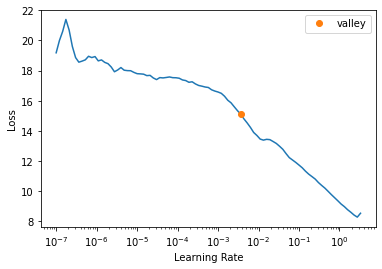

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.19       0.20
1   -0.42      -0.39
2    0.53       0.54
3   -0.51      -0.49
4    0.39       0.39
XGBoost RMSE:  0.03720759


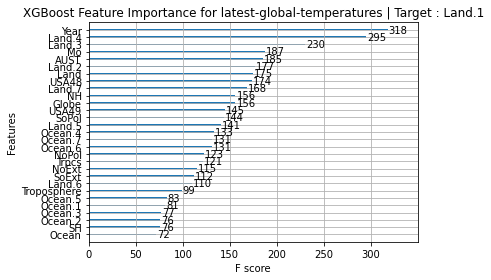

Target Variable: NH
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  5%|▍         | 2/42 [00:00<00:11,  3.60it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9718383250052702, 'Adjusted R-Squared': 0.9697388685146605, 'RMSE': 0.060834335175420085, 'Time taken': 0.3882887363433838}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9937255975179825, 'Adjusted R-Squared': 0.9932578400064697, 'RMSE': 0.028714794468903227, 'Time taken': 0.19999003410339355}


 10%|▉         | 4/42 [00:00<00:05,  6.72it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9984597121362134, 'Adjusted R-Squared': 0.9983448834779877, 'RMSE': 0.014227233915142752, 'Time taken': 0.03215384483337402}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9858033124025941, 'Adjusted R-Squared': 0.9847449475174405, 'RMSE': 0.04319296704989613, 'Time taken': 0.109161376953125}
{'Model': 'DummyRegressor', 'R-Squared': -0.00028663527330219374, 'Adjusted R-Squared': -0.0748581325044737, 'RMSE': 0.36256158, 'Time taken': 0.019744396209716797}
{'Model': 'ElasticNet', 'R-Squared': -0.00028663527330219374, 'Adjusted R-Squared': -0.0748581325044737, 'RMSE': 0.36256158, 'Time taken': 0.014670610427856445}


 17%|█▋        | 7/42 [00:00<00:03,  9.24it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999038247691807, 'Adjusted R-Squared': 0.9998966548933613, 'RMSE': 0.0035550944, 'Time taken': 0.19693446159362793}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9688606332727088, 'Adjusted R-Squared': 0.9665391894807, 'RMSE': 0.06396971462433795, 'Time taken': 0.03458905220031738}


 21%|██▏       | 9/42 [00:01<00:07,  4.16it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9969076775492551, 'Adjusted R-Squared': 0.9966771445130813, 'RMSE': 0.02015867169348498, 'Time taken': 0.9265975952148438}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:06,  4.50it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3574235928831504, 'Adjusted R-Squared': 0.30951943913922075, 'RMSE': 0.2905908351803553, 'Time taken': 0.3621091842651367}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9779534695246154, 'Adjusted R-Squared': 0.9763098978439312, 'RMSE': 0.053825695687246114, 'Time taken': 0.060598134994506836}


 31%|███       | 13/42 [00:03<00:12,  2.38it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9968145484896573, 'Adjusted R-Squared': 0.9965770726701202, 'RMSE': 0.020459971501929644, 'Time taken': 1.6048908233642578}


 33%|███▎      | 14/42 [00:04<00:13,  2.06it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9948203167863353, 'Adjusted R-Squared': 0.9944341707369876, 'RMSE': 0.02608982252709327, 'Time taken': 0.7676658630371094}


 38%|███▊      | 16/42 [00:05<00:09,  2.77it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.999914971600454, 'Adjusted R-Squared': 0.9999086327223387, 'RMSE': 0.003342731758379754, 'Time taken': 0.21975326538085938}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9469380583402309, 'Adjusted R-Squared': 0.9429822837691941, 'RMSE': 0.08350474, 'Time taken': 0.12757349014282227}


 45%|████▌     | 19/42 [00:05<00:04,  4.78it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9987279332231729, 'Adjusted R-Squared': 0.9986331004814557, 'RMSE': 0.012929284, 'Time taken': 0.16052532196044922}
{'Model': 'Lars', 'R-Squared': 0.9998208821144818, 'Adjusted R-Squared': 0.9998075288530935, 'RMSE': 0.004851644849231732, 'Time taken': 0.03554964065551758}
{'Model': 'LarsCV', 'R-Squared': 0.9999064112795466, 'Adjusted R-Squared': 0.9998994342284074, 'RMSE': 0.0035069637760184844, 'Time taken': 0.09230279922485352}
{'Model': 'Lasso', 'R-Squared': -0.00028663527330219374, 'Adjusted R-Squared': -0.0748581325044737, 'RMSE': 0.36256158, 'Time taken': 0.0509800910949707}


 55%|█████▍    | 23/42 [00:05<00:02,  6.87it/s]

{'Model': 'LassoCV', 'R-Squared': 0.999904627234609, 'Adjusted R-Squared': 0.9998975171826905, 'RMSE': 0.003540232, 'Time taken': 0.23800349235534668}
{'Model': 'LassoLars', 'R-Squared': -0.0002866325280519444, 'Adjusted R-Squared': -0.07485812955456472, 'RMSE': 0.36256156075229284, 'Time taken': 0.01770162582397461}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9999080351566197, 'Adjusted R-Squared': 0.9999011791657251, 'RMSE': 0.00347640561707467, 'Time taken': 0.11913490295410156}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9998519937533191, 'Adjusted R-Squared': 0.9998409598686051, 'RMSE': 0.004410212825386719, 'Time taken': 0.05382943153381348}


 60%|█████▉    | 25/42 [00:05<00:01,  8.63it/s]

{'Model': 'LinearRegression', 'R-Squared': 0.9942963210384136, 'Adjusted R-Squared': 0.9938711110387066, 'RMSE': 0.027377706, 'Time taken': 0.05323600769042969}
{'Model': 'LinearSVR', 'R-Squared': 0.9965592876830485, 'Adjusted R-Squared': 0.9963027821375688, 'RMSE': 0.021263938437969098, 'Time taken': 0.4109795093536377}


 64%|██████▍   | 27/42 [00:06<00:03,  4.02it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9575789432126905, 'Adjusted R-Squared': 0.9544164479766186, 'RMSE': 0.07466383049876625, 'Time taken': 0.6458139419555664}


 79%|███████▊  | 33/42 [00:12<00:05,  1.78it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9703497409090693, 'Adjusted R-Squared': 0.9681393102827531, 'RMSE': 0.06242143832553619, 'Time taken': 5.738622188568115}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9973935624610806, 'Adjusted R-Squared': 0.9971992522075365, 'RMSE': 0.018507305168214385, 'Time taken': 0.017277002334594727}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9996681781376254, 'Adjusted R-Squared': 0.9996434407751348, 'RMSE': 0.0066034671762711565, 'Time taken': 0.036878347396850586}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9914240067193515, 'Adjusted R-Squared': 0.9907846653179664, 'RMSE': 0.03357080390507275, 'Time taken': 0.022963285446166992}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9929375685435249, 'Adjusted R-Squared': 0.9924110633706771, 'RMSE': 0.03046468, 'Time taken': 0.03476905822753906}


 83%|████████▎ | 35/42 [00:15<00:04,  1.45it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.995739112402062, 'Adjusted R-Squared': 0.9954214626839638, 'RMSE': 0.023662986939916794, 'Time taken': 2.154179811477661}
{'Model': 'Ridge', 'R-Squared': 0.999906560339966, 'Adjusted R-Squared': 0.9998995944013003, 'RMSE': 0.0035041699, 'Time taken': 0.014708757400512695}
{'Model': 'RidgeCV', 'R-Squared': 0.9998858902665454, 'Adjusted R-Squared': 0.9998773833712493, 'RMSE': 0.00387240587775538, 'Time taken': 0.04683279991149902}
{'Model': 'SGDRegressor', 'R-Squared': 0.9994525188312058, 'Adjusted R-Squared': 0.9994117040397018, 'RMSE': 0.008482114253138813, 'Time taken': 0.04907798767089844}


 90%|█████████ | 38/42 [00:15<00:01,  2.11it/s]

{'Model': 'SVR', 'R-Squared': 0.9437767178649467, 'Adjusted R-Squared': 0.9395852649551355, 'RMSE': 0.08595628210725262, 'Time taken': 0.09632492065429688}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9942963210384136, 'Adjusted R-Squared': 0.9938711110387066, 'RMSE': 0.027377706, 'Time taken': 0.02342534065246582}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9779534695246154, 'Adjusted R-Squared': 0.9763098978439312, 'RMSE': 0.053825695687246114, 'Time taken': 0.025175094604492188}


 98%|█████████▊| 41/42 [00:15<00:00,  2.61it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9953277954470922, 'Adjusted R-Squared': 0.9949794819971325, 'RMSE': 0.02477881, 'Time taken': 0.5543315410614014}


100%|██████████| 42/42 [00:16<00:00,  2.59it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9951240149162611, 'Adjusted R-Squared': 0.9947605096015351, 'RMSE': 0.025313413261180213, 'Time taken': 0.36233973503112793}
Project: latest-global-temperatures
latest-global-temperatures
Target: NH
NH
Target Standard Deviation: 0.3634128272533417
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               1.00       1.00  0.00        0.22
LassoLarsCV                                  1.00       1.00  0.00        0.12
Ridge                                        1.00       1.00  0.00        0.01
LarsCV                                       1.00       1.00  0.00        0.09
LassoCV                                      1.00       1.00  0.00        0.24
ElasticNetCV                                 1.00       1.00  0.00        0.20
RidgeCV                                      1.00       1.00  0.00        0.05

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2.664041,1.958152,1.399340,00:01
1,1.746054,0.223643,0.472909,00:01
2,0.965567,0.039690,0.199224,00:01
3,0.566338,0.060156,0.245267,00:01


Better model found at epoch 0 with _rmse value: 1.3993399143218994.
Better model found at epoch 1 with _rmse value: 0.4729093313217163.
Better model found at epoch 2 with _rmse value: 0.19922351837158203.
No improvement since epoch 2: early stopping


,Year,Mo,Troposphere,Globe,Land,Ocean,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,NH,NH_pred
0,15.00,3.00,3.00,1.12,0.20,1.48,-0.42,1.59,1.17,1.30,1.05,-0.24,-0.21,-0.24,1.21,-0.39,2.76,1.50,1.57,1.37,0.30,0.04,0.51,0.83,0.58,0.97,3.62,4.19,3.57,0.29,-0.04
1,34.00,13.00,5.00,0.09,0.49,-0.08,0.43,0.01,-0.03,0.36,-0.12,-0.24,-0.29,-0.24,0.38,0.53,0.18,0.13,0.58,-0.01,0.43,0.56,0.28,0.94,0.89,0.93,-0.99,-1.33,-0.78,0.08,-0.00
2,43.00,2.00,2.00,0.44,0.98,0.15,1.20,0.65,-0.20,0.07,-0.27,-0.45,-0.33,-0.49,1.45,1.34,1.40,0.06,0.34,-0.03,0.75,0.75,0.71,0.03,0.32,-0.16,0.74,0.92,0.44,0.35,0.47
3,17.00,13.00,3.00,3.55,2.51,3.81,1.36,2.75,3.97,3.68,3.86,4.00,4.04,3.96,0.76,0.47,0.98,2.50,2.23,2.40,-0.34,-0.56,-0.11,0.40,0.85,0.08,-0.17,-0.54,3.46,0.84,0.16
4,37.00,5.00,4.00,-0.17,0.60,-0.50,0.93,-0.73,-0.26,-0.37,-0.21,-0.96,-0.76,-1.00,0.64,1.28,-0.09,0.13,-0.16,0.20,0.56,0.83,0.29,0.09,0.20,0.00,1.11,1.03,-0.55,0.01,-0.12
5,22.00,13.00,4.00,0.28,0.17,0.34,-0.11,0.62,0.20,0.65,0.05,1.02,0.70,1.13,-0.17,-0.33,0.01,-0.35,0.44,-0.56,0.06,0.06,0.05,-0.04,0.24,-0.23,-0.52,-0.47,0.41,0.13,-0.04
6,20.00,9.00,2.00,0.44,0.92,0.18,0.67,0.29,0.28,1.01,0.08,0.30,0.51,0.23,0.52,0.68,0.32,0.13,0.78,-0.08,0.30,0.32,0.27,0.33,0.37,0.29,1.94,1.56,1.02,0.19,-0.06
7,45.00,6.00,4.00,1.21,1.00,1.22,0.77,1.15,1.08,1.01,1.05,1.07,0.89,1.13,0.74,0.59,0.79,0.72,0.75,0.66,0.34,0.35,0.31,0.20,0.46,0.00,0.27,0.38,0.11,0.39,0.35
8,10.00,3.00,3.00,0.35,0.09,0.41,0.01,-0.51,0.91,0.25,1.05,0.19,-0.23,0.32,-0.48,0.13,-1.09,0.97,0.26,1.11,0.92,1.02,0.77,0.15,0.16,0.14,-0.84,-1.32,0.76,-0.10,-0.18


<Figure size 432x288 with 0 Axes>

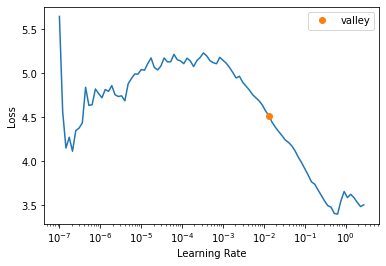

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.09       0.07
1    0.22       0.20
2    0.13       0.14
3    0.36       0.53
4    0.87       0.83
XGBoost RMSE:  0.024730613


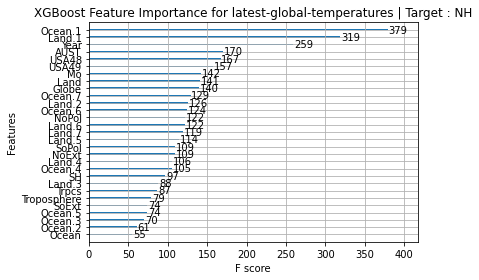

Target Variable: Ocean
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:15,  2.65it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9563599913103095, 'Adjusted R-Squared': 0.9531066230532375, 'RMSE': 0.061570619647986505, 'Time taken': 0.3772406578063965}


 12%|█▏        | 5/42 [00:00<00:03,  9.29it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.987445949875661, 'Adjusted R-Squared': 0.9865100438252604, 'RMSE': 0.033023495376819555, 'Time taken': 0.21717476844787598}
{'Model': 'BayesianRidge', 'R-Squared': 0.999891722029678, 'Adjusted R-Squared': 0.999883649893073, 'RMSE': 0.003066910930259386, 'Time taken': 0.019887924194335938}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9802928169977702, 'Adjusted R-Squared': 0.978823643971897, 'RMSE': 0.04137551237454619, 'Time taken': 0.07398700714111328}
{'Model': 'DummyRegressor', 'R-Squared': -0.0004259020479382425, 'Adjusted R-Squared': -0.07500778163505961, 'RMSE': 0.29479736, 'Time taken': 0.018194198608398438}
{'Model': 'ElasticNet', 'R-Squared': -0.0004259020479382425, 'Adjusted R-Squared': -0.07500778163505961, 'RMSE': 0.29479736, 'Time taken': 0.02048015594482422}


 17%|█▋        | 7/42 [00:00<00:04,  8.53it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9998315678288389, 'Adjusted R-Squared': 0.9998190111888294, 'RMSE': 0.0038251074, 'Time taken': 0.2411346435546875}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9757980500775285, 'Adjusted R-Squared': 0.9739937916000178, 'RMSE': 0.04585178941649902, 'Time taken': 0.04860830307006836}


 21%|██▏       | 9/42 [00:01<00:08,  4.03it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9941165865911654, 'Adjusted R-Squared': 0.993677977365314, 'RMSE': 0.02260714881581227, 'Time taken': 0.8974676132202148}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.42it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3278523229493385, 'Adjusted R-Squared': 0.27774362723090873, 'RMSE': 0.24163701446642352, 'Time taken': 0.35789060592651367}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9716499894914984, 'Adjusted R-Squared': 0.9695364925641293, 'RMSE': 0.049625823005963035, 'Time taken': 0.06810665130615234}


 31%|███       | 13/42 [00:03<00:09,  3.20it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9931755091371726, 'Adjusted R-Squared': 0.9926667424661648, 'RMSE': 0.024348165129593265, 'Time taken': 0.9072613716125488}


 33%|███▎      | 14/42 [00:03<00:10,  2.69it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9918103152376787, 'Adjusted R-Squared': 0.991199773185989, 'RMSE': 0.026672560123883294, 'Time taken': 0.6196064949035645}


 36%|███▌      | 15/42 [00:04<00:09,  2.80it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9998895380506232, 'Adjusted R-Squared': 0.999881303098099, 'RMSE': 0.003097686490604188, 'Time taken': 0.3034021854400635}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9481175454329327, 'Adjusted R-Squared': 0.9442497017762619, 'RMSE': 0.06713382, 'Time taken': 0.08348298072814941}


 40%|████      | 17/42 [00:04<00:06,  3.69it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9981832822878691, 'Adjusted R-Squared': 0.9980478457489185, 'RMSE': 0.012562464, 'Time taken': 0.1756763458251953}
{'Model': 'Lars', 'R-Squared': 0.9139995182745904, 'Adjusted R-Squared': 0.9075881713079146, 'RMSE': 0.08643339106411392, 'Time taken': 0.07471466064453125}


 45%|████▌     | 19/42 [00:04<00:04,  4.61it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9998542387258252, 'Adjusted R-Squared': 0.9998433722041001, 'RMSE': 0.003558378882238021, 'Time taken': 0.15566205978393555}
{'Model': 'Lasso', 'R-Squared': -0.0004259020479382425, 'Adjusted R-Squared': -0.07500778163505961, 'RMSE': 0.29479736, 'Time taken': 0.017139911651611328}


 50%|█████     | 21/42 [00:04<00:03,  5.40it/s]

{'Model': 'LassoCV', 'R-Squared': 0.9998273220365448, 'Adjusted R-Squared': 0.9998144488721741, 'RMSE': 0.0038730185, 'Time taken': 0.22344684600830078}
{'Model': 'LassoLars', 'R-Squared': -0.00042589962297046036, 'Adjusted R-Squared': -0.07500777902931022, 'RMSE': 0.2947973487586386, 'Time taken': 0.03696894645690918}


 55%|█████▍    | 23/42 [00:05<00:03,  6.31it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9998864680184816, 'Adjusted R-Squared': 0.9998780041946665, 'RMSE': 0.003140437966030937, 'Time taken': 0.16329264640808105}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9998054727675204, 'Adjusted R-Squared': 0.9997909707373356, 'RMSE': 0.004110752354847112, 'Time taken': 0.036212921142578125}
{'Model': 'LinearRegression', 'R-Squared': 0.9998916501215435, 'Adjusted R-Squared': 0.9998835726241778, 'RMSE': 0.0030679288, 'Time taken': 0.03437018394470215}


 62%|██████▏   | 26/42 [00:05<00:02,  6.32it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.999721537085029, 'Adjusted R-Squared': 0.9997007776389257, 'RMSE': 0.004918297474087896, 'Time taken': 0.3999142646789551}


 64%|██████▍   | 27/42 [00:06<00:03,  4.31it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9493967303608065, 'Adjusted R-Squared': 0.9456242501049283, 'RMSE': 0.06630104897704095, 'Time taken': 0.6071131229400635}


 79%|███████▊  | 33/42 [00:12<00:05,  1.74it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9813362554442291, 'Adjusted R-Squared': 0.9799448708886574, 'RMSE': 0.040265259379203014, 'Time taken': 5.955869197845459}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.988873827368288, 'Adjusted R-Squared': 0.9880443697684945, 'RMSE': 0.031088803452181193, 'Time taken': 0.014714956283569336}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9970872854866467, 'Adjusted R-Squared': 0.9968701422452914, 'RMSE': 0.015906699256371556, 'Time taken': 0.03487896919250488}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9912211304194706, 'Adjusted R-Squared': 0.9905666645638527, 'RMSE': 0.02761534089800359, 'Time taken': 0.022808551788330078}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9998914814746905, 'Adjusted R-Squared': 0.9998833914046803, 'RMSE': 0.0030703158, 'Time taken': 0.038133859634399414}


 88%|████████▊ | 37/42 [00:14<00:02,  1.93it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9901682691528186, 'Adjusted R-Squared': 0.9894353123544426, 'RMSE': 0.02922443344802813, 'Time taken': 1.9817821979522705}
{'Model': 'Ridge', 'R-Squared': 0.9998905213791031, 'Adjusted R-Squared': 0.9998823597338434, 'RMSE': 0.003083868, 'Time taken': 0.02347087860107422}
{'Model': 'RidgeCV', 'R-Squared': 0.9998905163295194, 'Adjusted R-Squared': 0.9998823543078127, 'RMSE': 0.0030839390385924677, 'Time taken': 0.05185222625732422}
{'Model': 'SGDRegressor', 'R-Squared': 0.9995146872299284, 'Adjusted R-Squared': 0.9994785071005401, 'RMSE': 0.006492948672063781, 'Time taken': 0.04901933670043945}


 93%|█████████▎| 39/42 [00:14<00:01,  2.54it/s]

{'Model': 'SVR', 'R-Squared': 0.9433659424858811, 'Adjusted R-Squared': 0.9391438662187617, 'RMSE': 0.07014067627871041, 'Time taken': 0.10193490982055664}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9998916501215435, 'Adjusted R-Squared': 0.9998835726241778, 'RMSE': 0.0030679288, 'Time taken': 0.02389383316040039}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9716499894914984, 'Adjusted R-Squared': 0.9695364925641293, 'RMSE': 0.049625823005963035, 'Time taken': 0.025887489318847656}


 98%|█████████▊| 41/42 [00:15<00:00,  2.70it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9926876203559806, 'Adjusted R-Squared': 0.9921424815136244, 'RMSE': 0.025203478, 'Time taken': 0.5944511890411377}


100%|██████████| 42/42 [00:15<00:00,  2.70it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9915276890062357, 'Adjusted R-Squared': 0.9908960771326646, 'RMSE': 0.02712889187891255, 'Time taken': 0.391402006149292}
Project: latest-global-temperatures
latest-global-temperatures
Target: Ocean
Ocean
Target Standard Deviation: 0.31555891036987305
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
BayesianRidge                                1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.02
RANSACRegressor                              1.00       1.00  0.00        0.04
Ridge                                        1.00       1.00  0.00        0.02
RidgeCV                                      1.00       1.00  0.00        0.05
HuberRegressor                               1.00       1.00  0.00        

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4.645323,1.767173,1.329350,00:01
1,3.251558,1.396107,1.181570,00:01
2,2.016491,0.216286,0.465065,00:01
3,1.150732,0.074633,0.273190,00:01
4,0.678927,0.044928,0.211963,00:01
5,0.414635,0.043584,0.208768,00:01
6,0.269015,0.039614,0.199034,00:01
7,0.179624,0.035696,0.188935,00:01
8,0.128927,0.034593,0.185991,00:01
9,0.094241,0.034372,0.185396,00:01


Better model found at epoch 0 with _rmse value: 1.3293503522872925.
Better model found at epoch 1 with _rmse value: 1.1815695762634277.
Better model found at epoch 2 with _rmse value: 0.4650653898715973.
Better model found at epoch 3 with _rmse value: 0.2731904983520508.
Better model found at epoch 4 with _rmse value: 0.21196289360523224.
Better model found at epoch 5 with _rmse value: 0.2087683528661728.
Better model found at epoch 6 with _rmse value: 0.19903363287448883.
Better model found at epoch 7 with _rmse value: 0.18893513083457947.
Better model found at epoch 8 with _rmse value: 0.1859910637140274.
Better model found at epoch 9 with _rmse value: 0.1853962540626526.
Better model found at epoch 10 with _rmse value: 0.16824239492416382.
Better model found at epoch 11 with _rmse value: 0.1674880087375641.
No improvement since epoch 11: early stopping


,Year,Mo,Troposphere,Globe,Land,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Ocean,Ocean_pred
0,23.00,13.00,5.00,-0.10,-0.04,0.69,0.72,0.59,-0.88,-1.53,-0.64,-0.16,-0.03,-0.19,1.04,0.83,1.16,-1.03,-1.76,-0.72,1.70,1.42,1.85,-1.80,-2.09,-1.75,-0.09,0.14,0.96,-0.03,0.02
1,11.00,11.00,4.00,-1.39,-1.52,-1.17,-1.18,-1.06,-1.25,-1.49,-1.13,-0.62,-0.98,-0.52,-1.25,-1.12,-1.23,-1.15,-1.11,-1.08,-0.30,-0.16,-0.39,-0.41,-0.44,-0.43,-0.93,-0.65,-1.66,-0.38,-0.20
2,8.00,11.00,4.00,-0.60,-0.44,-0.51,-0.05,-0.79,-0.52,-0.99,-0.36,-0.39,-0.52,-0.35,-0.49,0.00,-0.92,-0.38,-0.74,-0.23,-0.47,-0.41,-0.49,-0.62,-0.71,-0.63,0.39,0.15,-0.01,-0.18,-0.06
3,9.00,9.00,5.00,-0.85,-0.74,-0.95,-0.53,-1.14,-0.57,-0.83,-0.44,-1.09,-1.06,-1.09,-0.59,-0.29,-0.80,-0.09,-0.44,0.01,0.24,0.25,0.22,-0.10,-0.28,-0.01,-0.62,-0.44,0.09,-0.26,-0.10
4,22.00,10.00,2.00,-0.38,-0.42,0.04,-0.29,0.27,-0.71,-0.48,-0.73,0.57,0.70,0.53,-0.27,-0.53,0.02,-1.22,-0.89,-1.22,0.28,0.21,0.34,-0.64,-0.78,-0.60,0.98,1.08,-1.03,-0.09,-0.07
5,6.00,10.00,3.00,2.12,1.66,1.81,1.66,1.76,1.93,0.96,2.09,0.80,0.93,0.76,1.97,1.59,2.15,1.88,0.63,2.11,0.59,0.77,0.39,0.18,0.40,0.03,1.33,1.76,-0.66,0.71,0.22
6,35.00,13.00,2.00,-0.16,0.20,-0.32,0.33,-0.79,0.08,-0.13,0.11,-1.11,-0.57,-1.27,0.23,0.53,-0.10,0.70,0.13,0.83,0.47,0.54,0.38,-0.07,0.00,-0.13,-1.07,-1.18,0.02,-0.09,0.03
7,37.00,8.00,3.00,-0.47,-0.52,-0.59,-0.72,-0.44,-0.21,0.07,-0.30,-0.75,-0.82,-0.73,-0.30,-0.59,-0.00,0.14,0.49,0.01,-0.06,-0.21,0.08,0.22,0.26,0.20,-0.54,-0.39,1.15,-0.11,-0.07
8,25.00,13.00,4.00,-0.41,-0.34,-0.43,-0.56,-0.30,-0.29,0.26,-0.41,-0.41,-0.44,-0.42,-0.37,-0.51,-0.19,-0.06,0.49,-0.23,0.46,0.31,0.57,0.14,0.51,-0.13,-1.91,-1.43,0.29,-0.12,-0.06


<Figure size 432x288 with 0 Axes>

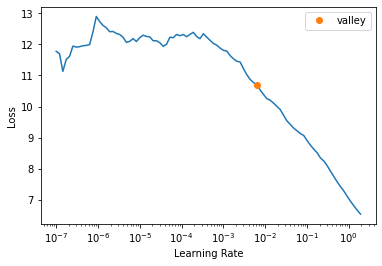

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.01      -0.03
1   -0.26      -0.26
2    0.32       0.31
3    0.38       0.37
4   -0.28      -0.28
XGBoost RMSE:  0.025234733


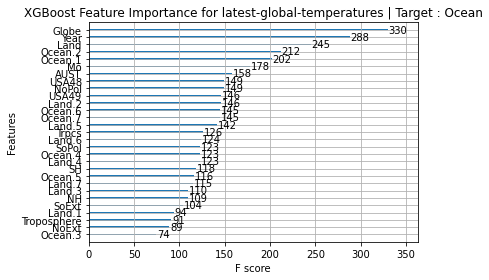

Target Variable: Land
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:16,  2.53it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9567919445670424, 'Adjusted R-Squared': 0.9535707784807808, 'RMSE': 0.07967444202082899, 'Time taken': 0.3952162265777588}


 12%|█▏        | 5/42 [00:00<00:04,  9.07it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9900576370324903, 'Adjusted R-Squared': 0.9893164325953238, 'RMSE': 0.038219189856134046, 'Time taken': 0.22416067123413086}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999261472670317, 'Adjusted R-Squared': 0.9999206415362962, 'RMSE': 0.0032939723976687114, 'Time taken': 0.018895387649536133}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9755013128993003, 'Adjusted R-Squared': 0.9736749326270117, 'RMSE': 0.059994035453458404, 'Time taken': 0.07271790504455566}
{'Model': 'DummyRegressor', 'R-Squared': -0.002883229074368776, 'Adjusted R-Squared': -0.07764830270716239, 'RMSE': 0.38385028, 'Time taken': 0.017999887466430664}
{'Model': 'ElasticNet', 'R-Squared': -0.002883229074368776, 'Adjusted R-Squared': -0.07764830270716239, 'RMSE': 0.38385028, 'Time taken': 0.019228219985961914}


 17%|█▋        | 7/42 [00:00<00:03,  9.38it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.999901736231823, 'Adjusted R-Squared': 0.9998944106552751, 'RMSE': 0.0037995605, 'Time taken': 0.18092894554138184}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9534019757684847, 'Adjusted R-Squared': 0.949928087072562, 'RMSE': 0.08274093445660348, 'Time taken': 0.03344273567199707}


 21%|██▏       | 9/42 [00:01<00:08,  4.06it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9934832270978962, 'Adjusted R-Squared': 0.9929974008404129, 'RMSE': 0.030942326425972427, 'Time taken': 0.941234827041626}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:08,  3.84it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.32135423997421975, 'Adjusted R-Squared': 0.27076111133476577, 'RMSE': 0.3157608191315535, 'Time taken': 0.5587687492370605}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9603641981268705, 'Adjusted R-Squared': 0.9574093440026525, 'RMSE': 0.07630983146484167, 'Time taken': 0.053598642349243164}


 31%|███       | 13/42 [00:03<00:10,  2.70it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9929510294851066, 'Adjusted R-Squared': 0.992425527827184, 'RMSE': 0.03218099863702702, 'Time taken': 1.1322340965270996}


 33%|███▎      | 14/42 [00:04<00:13,  2.14it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9922325027329227, 'Adjusted R-Squared': 0.9916534348132692, 'RMSE': 0.03378136736843406, 'Time taken': 0.8760521411895752}


 38%|███▊      | 16/42 [00:04<00:09,  2.86it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9999254561042907, 'Adjusted R-Squared': 0.9999198988472842, 'RMSE': 0.003309350089405282, 'Time taken': 0.226332426071167}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9327785718792563, 'Adjusted R-Squared': 0.9277672057725684, 'RMSE': 0.09937807, 'Time taken': 0.13028240203857422}


 40%|████      | 17/42 [00:05<00:08,  3.06it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9998887281726986, 'Adjusted R-Squared': 0.999880432843671, 'RMSE': 0.004043238, 'Time taken': 0.25667762756347656}
{'Model': 'Lars', 'R-Squared': 0.9923631359946843, 'Adjusted R-Squared': 0.991793806801486, 'RMSE': 0.03349609645062005, 'Time taken': 0.05951690673828125}


 45%|████▌     | 19/42 [00:05<00:05,  4.27it/s]

{'Model': 'LarsCV', 'R-Squared': 0.9999051594718497, 'Adjusted R-Squared': 0.9998980890982857, 'RMSE': 0.0037327908069470844, 'Time taken': 0.14656972885131836}
{'Model': 'Lasso', 'R-Squared': -0.002883229074368776, 'Adjusted R-Squared': -0.07764830270716239, 'RMSE': 0.38385028, 'Time taken': 0.030994892120361328}


 55%|█████▍    | 23/42 [00:05<00:03,  6.27it/s]

{'Model': 'LassoCV', 'R-Squared': 0.999904243047823, 'Adjusted R-Squared': 0.9998971043547301, 'RMSE': 0.003750782, 'Time taken': 0.23083090782165527}
{'Model': 'LassoLars', 'R-Squared': -0.002883238130243271, 'Adjusted R-Squared': -0.07764831243815329, 'RMSE': 0.3838502752130333, 'Time taken': 0.05018329620361328}
{'Model': 'LassoLarsCV', 'R-Squared': 0.9999254946665027, 'Adjusted R-Squared': 0.999919940284314, 'RMSE': 0.003308494000742168, 'Time taken': 0.12785625457763672}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999025683629573, 'Adjusted R-Squared': 0.9998953048218925, 'RMSE': 0.0037834384206490703, 'Time taken': 0.04190516471862793}
{'Model': 'LinearRegression', 'R-Squared': 0.9999260328844463, 'Adjusted R-Squared': 0.9999205186264744, 'RMSE': 0.0032965222, 'Time taken': 0.030538320541381836}


 62%|██████▏   | 26/42 [00:06<00:02,  5.74it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9997794717803322, 'Adjusted R-Squared': 0.9997630313732104, 'RMSE': 0.005692050646413823, 'Time taken': 0.5029711723327637}


 64%|██████▍   | 27/42 [00:06<00:03,  4.17it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9690585440421259, 'Adjusted R-Squared': 0.9667518545234155, 'RMSE': 0.06742284012202628, 'Time taken': 0.5620496273040771}


 79%|███████▊  | 33/42 [00:11<00:04,  2.02it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9740078486293273, 'Adjusted R-Squared': 0.9720701304037502, 'RMSE': 0.06179563278287726, 'Time taken': 4.8773205280303955}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9999058311928494, 'Adjusted R-Squared': 0.9998988108961724, 'RMSE': 0.00371954831687421, 'Time taken': 0.018166065216064453}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999058311928494, 'Adjusted R-Squared': 0.9998988108961724, 'RMSE': 0.00371954831687421, 'Time taken': 0.037502288818359375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9942786962133098, 'Adjusted R-Squared': 0.993852172280626, 'RMSE': 0.028992400416908825, 'Time taken': 0.02309393882751465}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9999257210477304, 'Adjusted R-Squared': 0.9999201835422913, 'RMSE': 0.0033034638, 'Time taken': 0.04013514518737793}


 88%|████████▊ | 37/42 [00:14<00:02,  2.11it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9903980953411956, 'Adjusted R-Squared': 0.9896822721147037, 'RMSE': 0.037559116224131876, 'Time taken': 1.9841504096984863}
{'Model': 'Ridge', 'R-Squared': 0.9999252257861865, 'Adjusted R-Squared': 0.9999196513589356, 'RMSE': 0.0033144585, 'Time taken': 0.014921426773071289}
{'Model': 'RidgeCV', 'R-Squared': 0.9999264311616053, 'Adjusted R-Squared': 0.9999209465952468, 'RMSE': 0.0032876351825909833, 'Time taken': 0.05892443656921387}
{'Model': 'SGDRegressor', 'R-Squared': 0.9995546968817757, 'Adjusted R-Squared': 0.9995214994770751, 'RMSE': 0.008088435713770242, 'Time taken': 0.06339406967163086}


 93%|█████████▎| 39/42 [00:14<00:01,  2.73it/s]

{'Model': 'SVR', 'R-Squared': 0.9537577767397238, 'Adjusted R-Squared': 0.9503104130519398, 'RMSE': 0.08242444339146203, 'Time taken': 0.12861013412475586}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999260328844463, 'Adjusted R-Squared': 0.9999205186264744, 'RMSE': 0.0032965222, 'Time taken': 0.027007579803466797}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9603641981268705, 'Adjusted R-Squared': 0.9574093440026525, 'RMSE': 0.07630983146484167, 'Time taken': 0.060526132583618164}


 98%|█████████▊| 41/42 [00:14<00:00,  2.85it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9905719750862693, 'Adjusted R-Squared': 0.9898691146171222, 'RMSE': 0.037217487, 'Time taken': 0.5578057765960693}


100%|██████████| 42/42 [00:15<00:00,  2.75it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.992734383186942, 'Adjusted R-Squared': 0.9921927305196446, 'RMSE': 0.032671788929967464, 'Time taken': 0.37197422981262207}
Project: latest-global-temperatures
latest-global-temperatures
Target: Land
Land
Target Standard Deviation: 0.3666529953479767
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RidgeCV                                      1.00       1.00  0.00        0.06
BayesianRidge                                1.00       1.00  0.00        0.02
LinearRegression                             1.00       1.00  0.00        0.03
TransformedTargetRegressor                   1.00       1.00  0.00        0.03
RANSACRegressor                              1.00       1.00  0.00        0.04
LassoLarsCV                                  1.00       1.00  0.00        0.13
HuberRegressor                               1.00       1.00  0.00        0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.116586,1.017964,1.008942,00:01
1,1.973061,2.964279,1.721708,00:01


Better model found at epoch 0 with _rmse value: 1.0089417695999146.
No improvement since epoch 0: early stopping


,Year,Mo,Troposphere,Globe,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Land,Land_pred
0,39.00,10.00,4.00,0.30,0.30,0.09,0.07,0.11,0.44,0.60,0.36,-0.01,0.08,-0.06,0.13,0.06,0.20,0.55,0.64,0.47,-0.19,-0.22,-0.15,0.39,0.19,0.54,0.95,0.81,0.60,0.11,0.00
1,21.00,5.00,3.00,-0.48,-0.33,-0.55,-0.39,-0.64,-0.29,-1.02,-0.03,-1.03,-1.10,-0.99,-0.04,-0.11,0.05,0.13,-0.73,0.40,0.25,0.20,0.27,-0.26,-0.77,0.05,-0.91,-0.89,0.01,-0.26,-0.65
2,25.00,10.00,2.00,-0.42,-0.16,-0.60,-0.85,-0.36,-0.11,-0.60,0.03,-0.10,-0.35,-0.02,-0.71,-0.85,-0.52,-0.10,-0.49,0.04,0.03,-0.14,0.19,-0.25,-0.53,-0.08,-0.53,-0.68,-0.39,-0.32,-0.19
3,21.00,8.00,3.00,-0.74,-0.26,-2.13,-1.57,-2.34,0.87,-1.17,1.46,-2.53,-2.60,-2.47,-1.31,-1.08,-1.40,2.45,-0.07,3.04,0.05,0.19,-0.09,0.90,0.35,1.33,-0.86,-0.79,-1.11,-0.62,-1.09
4,42.00,5.00,3.00,-0.39,-0.43,-0.02,-0.10,0.03,-0.69,-0.49,-0.69,0.40,0.49,0.35,-0.30,-0.26,-0.29,-1.01,-0.75,-1.01,-0.38,-0.28,-0.45,-0.78,-0.83,-0.82,0.37,0.40,0.50,-0.10,-0.58
5,31.00,8.00,3.00,0.01,-0.33,1.45,1.30,1.42,-1.48,-0.64,-1.67,1.37,1.39,1.36,1.00,1.06,0.84,-2.43,-1.36,-2.59,0.18,0.32,0.04,-1.16,-0.99,-1.38,0.39,0.57,-1.62,0.28,1.46
6,27.00,7.00,5.00,0.56,0.82,-0.10,-0.25,-0.00,1.14,0.29,1.31,-0.08,-0.26,-0.04,-0.11,-0.23,0.00,1.42,0.47,1.60,0.18,0.12,0.22,0.90,0.59,1.18,-0.29,-0.28,-0.09,-0.03,-0.35
7,38.00,5.00,5.00,0.17,0.07,0.43,0.74,0.17,-0.14,-0.45,-0.03,-0.06,0.02,-0.08,0.61,0.84,0.32,-0.16,-0.53,-0.03,-0.03,-0.01,-0.05,-0.50,-0.66,-0.44,0.17,0.13,0.39,0.15,-0.10
8,24.00,6.00,2.00,-0.97,-1.15,-0.38,-0.34,-0.39,-1.30,-0.39,-1.52,-1.01,-0.67,-1.12,0.08,-0.23,0.42,-1.01,-0.05,-1.23,0.04,-0.18,0.24,0.25,0.53,0.06,-0.46,-0.17,-0.98,-0.15,-0.57


<Figure size 432x288 with 0 Axes>

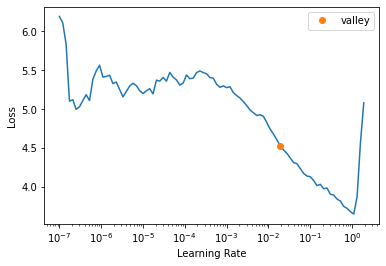

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.01       0.00
1   -0.11      -0.10
2   -0.21      -0.25
3   -0.02      -0.00
4   -0.25      -0.25
XGBoost RMSE:  0.038013905


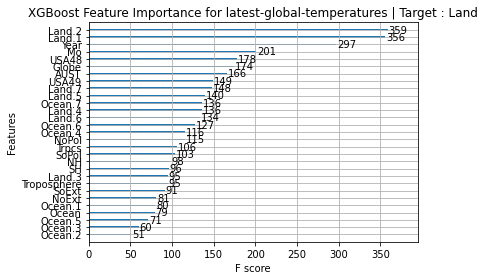

Target Variable: Globe
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
29
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  5%|▍         | 2/42 [00:00<00:11,  3.51it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9652653200526772, 'Adjusted R-Squared': 0.9626758451979924, 'RMSE': 0.055505426110480295, 'Time taken': 0.4053211212158203}
{'Model': 'BaggingRegressor', 'R-Squared': 0.9919240238813813, 'Adjusted R-Squared': 0.9913219588236951, 'RMSE': 0.02676401738333414, 'Time taken': 0.19967937469482422}


 12%|█▏        | 5/42 [00:00<00:03,  9.35it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.9997568609247894, 'Adjusted R-Squared': 0.9997387348754807, 'RMSE': 0.004643881942716773, 'Time taken': 0.0210418701171875}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9813744118824762, 'Adjusted R-Squared': 0.9799858718942803, 'RMSE': 0.0406451553380366, 'Time taken': 0.06876659393310547}
{'Model': 'DummyRegressor', 'R-Squared': -2.1450641873865806e-06, 'Adjusted R-Squared': -0.07455243351370267, 'RMSE': 0.29782027, 'Time taken': 0.017765283584594727}
{'Model': 'ElasticNet', 'R-Squared': -2.1450641873865806e-06, 'Adjusted R-Squared': -0.07455243351370267, 'RMSE': 0.29782027, 'Time taken': 0.02037978172302246}


 17%|█▋        | 7/42 [00:00<00:03,  9.14it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.999844256395059, 'Adjusted R-Squared': 0.9998326456892922, 'RMSE': 0.003716712, 'Time taken': 0.20020341873168945}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9778790878034187, 'Adjusted R-Squared': 0.9762299709558586, 'RMSE': 0.04429506121801116, 'Time taken': 0.06932973861694336}


 21%|██▏       | 9/42 [00:01<00:08,  4.08it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9975359912243432, 'Adjusted R-Squared': 0.9973522990534074, 'RMSE': 0.014783419997350115, 'Time taken': 0.8887200355529785}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:02<00:07,  4.26it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.30759840392742355, 'Adjusted R-Squared': 0.2559797759425786, 'RMSE': 0.24781798443077863, 'Time taken': 0.4193391799926758}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9879352747312691, 'Adjusted R-Squared': 0.9870358479117493, 'RMSE': 0.032712407581738955, 'Time taken': 0.06157660484313965}


 31%|███       | 13/42 [00:03<00:09,  3.04it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9976662994165361, 'Adjusted R-Squared': 0.9974923217380773, 'RMSE': 0.014387202543691639, 'Time taken': 0.973757266998291}


 33%|███▎      | 14/42 [00:04<00:13,  2.13it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9955939464030338, 'Adjusted R-Squared': 0.9952654745410492, 'RMSE': 0.019768725824679756, 'Time taken': 1.0660715103149414}


 38%|███▊      | 16/42 [00:04<00:09,  2.88it/s]

{'Model': 'HuberRegressor', 'R-Squared': 0.9998867632829187, 'Adjusted R-Squared': 0.9998783214711054, 'RMSE': 0.0031691837853095647, 'Time taken': 0.2167527675628662}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9641321039468456, 'Adjusted R-Squared': 0.9614581476858135, 'RMSE': 0.056403592, 'Time taken': 0.12074017524719238}


 45%|████▌     | 19/42 [00:05<00:04,  4.91it/s]

{'Model': 'KernelRidge', 'R-Squared': 0.9983862214514376, 'Adjusted R-Squared': 0.9982659140532157, 'RMSE': 0.011963982, 'Time taken': 0.12583088874816895}
{'Model': 'Lars', 'R-Squared': 0.9952491987209324, 'Adjusted R-Squared': 0.9948950258749351, 'RMSE': 0.02052755491556895, 'Time taken': 0.05271029472351074}
{'Model': 'LarsCV', 'R-Squared': 0.9998249901232421, 'Adjusted R-Squared': 0.999811943114435, 'RMSE': 0.0039398988276722, 'Time taken': 0.1023871898651123}


 50%|█████     | 21/42 [00:05<00:03,  5.91it/s]

{'Model': 'Lasso', 'R-Squared': -2.1450641873865806e-06, 'Adjusted R-Squared': -0.07455243351370267, 'RMSE': 0.29782027, 'Time taken': 0.058622121810913086}
{'Model': 'LassoCV', 'R-Squared': 0.9998278616160845, 'Adjusted R-Squared': 0.9998150286774379, 'RMSE': 0.003907443, 'Time taken': 0.16321516036987305}


 55%|█████▍    | 23/42 [00:05<00:02,  6.82it/s]

{'Model': 'LassoLars', 'R-Squared': -2.16024922417013e-06, 'Adjusted R-Squared': -0.0745524498307859, 'RMSE': 0.2978202743501966, 'Time taken': 0.03994131088256836}
{'Model': 'LassoLarsCV', 'R-Squared': 0.999884503978755, 'Adjusted R-Squared': 0.9998758937355259, 'RMSE': 0.0032006434889525637, 'Time taken': 0.16661787033081055}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9998145863181869, 'Adjusted R-Squared': 0.9998007637043757, 'RMSE': 0.004055315795346174, 'Time taken': 0.029581785202026367}
{'Model': 'LinearRegression', 'R-Squared': 0.9987251650247148, 'Adjusted R-Squared': 0.9986301259134467, 'RMSE': 0.010633611, 'Time taken': 0.021761178970336914}


 62%|██████▏   | 26/42 [00:05<00:02,  6.81it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9998068347188465, 'Adjusted R-Squared': 0.999792434222308, 'RMSE': 0.004139218243683215, 'Time taken': 0.3881871700286865}


 64%|██████▍   | 27/42 [00:06<00:03,  4.80it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.9291251825538756, 'Adjusted R-Squared': 0.9238414558033933, 'RMSE': 0.07928659493407529, 'Time taken': 0.5080039501190186}


 79%|███████▊  | 33/42 [00:12<00:05,  1.77it/s]

{'Model': 'NuSVR', 'R-Squared': 0.9762421344309662, 'Adjusted R-Squared': 0.9744709824990845, 'RMSE': 0.045904736685046944, 'Time taken': 5.892106056213379}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9905216370021859, 'Adjusted R-Squared': 0.9898150238224003, 'RMSE': 0.028994822792197335, 'Time taken': 0.01575160026550293}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9998346898635994, 'Adjusted R-Squared': 0.9998223659716826, 'RMSE': 0.003829160166008644, 'Time taken': 0.03780055046081543}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9900030964000391, 'Adjusted R-Squared': 0.989257825951713, 'RMSE': 0.029777384061224436, 'Time taken': 0.022748947143554688}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
{'Model': 'RANSACRegressor', 'R-Squared': 0.9986866748366334, 'Adjusted R-Squared': 0.9985887662768966, 'RMSE': 0.010792944, 'Time taken': 0.0374908447265625}


 83%|████████▎ | 35/42 [00:14<00:04,  1.46it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.992717563951304, 'Adjusted R-Squared': 0.9921746574078278, 'RMSE': 0.025415117976635235, 'Time taken': 2.0434951782226562}
{'Model': 'Ridge', 'R-Squared': 0.9998873798072788, 'Adjusted R-Squared': 0.9998789839574359, 'RMSE': 0.0031605444, 'Time taken': 0.026373624801635742}
{'Model': 'RidgeCV', 'R-Squared': 0.9998786451821547, 'Adjusted R-Squared': 0.9998695981648861, 'RMSE': 0.003280819228425932, 'Time taken': 0.04403853416442871}
{'Model': 'SGDRegressor', 'R-Squared': 0.9997980259467881, 'Adjusted R-Squared': 0.9997829687551605, 'RMSE': 0.004232544966648397, 'Time taken': 0.04220938682556152}


 90%|█████████ | 38/42 [00:14<00:01,  2.14it/s]

{'Model': 'SVR', 'R-Squared': 0.944008694185256, 'Adjusted R-Squared': 0.9398345351399409, 'RMSE': 0.07047159292821437, 'Time taken': 0.10656595230102539}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9987251650247148, 'Adjusted R-Squared': 0.9986301259134467, 'RMSE': 0.010633611, 'Time taken': 0.03394508361816406}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9879352747312691, 'Adjusted R-Squared': 0.9870358479117493, 'RMSE': 0.032712407581738955, 'Time taken': 0.04910397529602051}


 98%|█████████▊| 41/42 [00:15<00:00,  2.55it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.9956528493560223, 'Adjusted R-Squared': 0.995328768716754, 'RMSE': 0.019636141, 'Time taken': 0.6346473693847656}


100%|██████████| 42/42 [00:15<00:00,  2.65it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9956741826375219, 'Adjusted R-Squared': 0.9953516923971315, 'RMSE': 0.019587900080650575, 'Time taken': 0.37154674530029297}
Project: latest-global-temperatures
latest-global-temperatures
Target: Globe
Globe
Target Standard Deviation: 0.31672006845474243
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
Ridge                                        1.00       1.00  0.00        0.03
HuberRegressor                               1.00       1.00  0.00        0.22
LassoLarsCV                                  1.00       1.00  0.00        0.17
RidgeCV                                      1.00       1.00  0.00        0.04
ElasticNetCV                                 1.00       1.00  0.00        0.20
OrthogonalMatchingPursuitCV                  1.00       1.00  0.00        0.04
LassoCV                                      1.00       1.00  0.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.693273,0.587068,0.766203,00:01
1,2.517872,0.990292,0.995134,00:01


Better model found at epoch 0 with _rmse value: 0.7662034630775452.
No improvement since epoch 0: early stopping


,Year,Mo,Troposphere,Land,Ocean,NH,Land.1,Ocean.1,SH,Land.2,Ocean.2,Trpcs,Land.3,Ocean.3,NoExt,Land.4,Ocean.4,SoExt,Land.5,Ocean.5,NoPol,Land.6,Ocean.6,SoPol,Land.7,Ocean.7,USA48,USA49,AUST,Globe,Globe_pred
0,38.00,7.00,4.00,0.69,0.18,0.50,0.78,0.25,0.12,0.26,0.10,0.04,0.19,-0.01,0.64,0.83,0.40,0.13,0.16,0.11,0.35,0.51,0.21,-0.37,0.03,-0.62,0.40,0.68,0.26,0.13,0.12
1,32.00,10.00,5.00,-0.16,-0.33,-0.48,-0.13,-0.70,-0.02,-0.15,0.04,-0.55,-0.51,-0.57,-0.30,0.01,-0.58,0.31,0.07,0.35,-0.26,-0.22,-0.28,0.02,-0.00,0.03,-0.19,-0.18,0.38,-0.08,0.14
2,43.00,6.00,3.00,-0.69,-0.26,-0.86,-0.84,-0.78,0.15,-0.09,0.21,-0.17,-0.04,-0.22,-1.01,-0.90,-0.99,0.26,-0.09,0.35,-0.24,-0.16,-0.30,0.06,-0.18,0.23,-1.93,-1.67,0.62,-0.12,0.04
3,19.00,11.00,2.00,-0.88,-1.35,-0.67,-0.60,-0.67,-1.53,-1.05,-1.60,-0.72,-0.87,-0.66,-0.47,-0.42,-0.49,-1.49,-0.82,-1.57,-0.27,0.03,-0.52,-0.15,-0.14,-0.15,-0.48,-0.77,-1.57,-0.38,0.04
4,13.00,3.00,3.00,-0.93,1.78,-0.75,-2.28,0.46,2.49,2.11,2.46,2.34,2.19,2.37,-2.29,-3.10,-1.21,1.64,1.37,1.60,-6.26,-6.25,-6.06,0.79,0.67,0.83,-0.11,-1.60,1.66,0.31,1.01
5,45.00,3.00,3.00,0.29,1.87,-0.21,-0.53,0.08,2.77,1.78,2.93,1.64,1.55,1.66,-1.27,-1.05,-1.35,2.54,1.43,2.68,-4.21,-4.22,-4.06,0.51,0.50,0.50,3.40,2.81,2.10,0.46,1.70
6,17.00,10.00,2.00,-2.69,-1.41,-1.75,-2.16,-1.29,-1.58,-2.55,-1.25,-1.12,-1.41,-1.04,-1.77,-2.10,-1.23,-1.26,-2.17,-0.88,-0.82,-1.07,-0.57,-0.82,-1.30,-0.44,-0.52,-1.35,-1.77,-0.59,-1.26
7,29.00,6.00,4.00,0.05,0.06,0.31,0.28,0.33,-0.22,-0.40,-0.17,-0.09,-0.10,-0.09,0.45,0.31,0.57,-0.20,-0.36,-0.13,0.21,0.21,0.21,0.00,-0.01,0.01,0.35,0.70,-0.27,0.03,0.11
8,44.00,3.00,4.00,0.21,0.66,0.39,-0.08,0.71,0.58,0.68,0.53,0.65,0.53,0.69,0.15,-0.19,0.48,0.33,0.48,0.25,0.58,0.49,0.63,0.34,0.42,0.26,-0.30,-0.18,0.00,0.19,0.25


<Figure size 432x288 with 0 Axes>

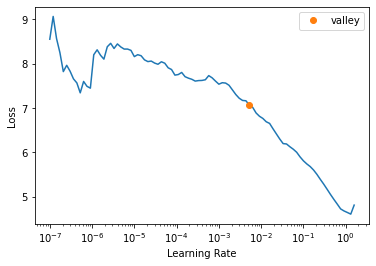

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.25      -0.25
1   -0.04      -0.04
2    0.35       0.35
3   -0.23      -0.12
4   -0.23      -0.24
XGBoost RMSE:  0.019625055


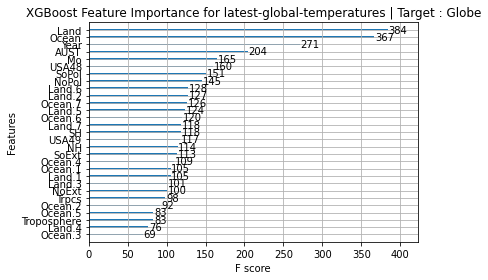

Target Variable: Mo
CATS=====================
['Year', 'Mo', 'Troposphere']
CONTS=====================
['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
30
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['Globe', 'Land', 'Ocean', 'NH', 'Land.1', 'Ocean.1', 'SH', 'Land.2', 'Ocean.2', 'Trpcs', 'Land.3', 'Ocean.3', 'NoExt', 'Land.4', 'Ocean.4', 'SoExt', 'Land.5', 'Ocean.5', 'NoPol', 'Land.6', 'Ocean.6', 'SoPol', 'Land.7', 'Ocean.7', 'USA48', 'USA49', 'AUST']
Categorical variables that made the cut : ['Year', 'Mo', 'Troposphere']
Tabular Object size: 2097


  2%|▏         | 1/42 [00:00<00:10,  3.81it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.20789413773716958, 'Adjusted R-Squared': 0.14884254389238272, 'RMSE': 3.1149157484321597, 'Time taken': 0.2625002861022949}


 10%|▉         | 4/42 [00:00<00:05,  7.28it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.3233639728619989, 'Adjusted R-Squared': 0.2729206700676492, 'RMSE': 2.878937585796485, 'Time taken': 0.27233457565307617}
{'Model': 'BayesianRidge', 'R-Squared': -0.0012403292870855065, 'Adjusted R-Squared': -0.07588292452956735, 'RMSE': 3.502062221035553, 'Time taken': 0.01966238021850586}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.1828694855591051, 'Adjusted R-Squared': -0.27105255774731596, 'RMSE': 3.8064760794201886, 'Time taken': 0.09719276428222656}
{'Model': 'DummyRegressor', 'R-Squared': -0.0003640561340334525, 'Adjusted R-Squared': -0.07494132510032392, 'RMSE': 3.5005294048151687, 'Time taken': 0.027884721755981445}
{'Model': 'ElasticNet', 'R-Squared': -0.0003640713115491412, 'Adjusted R-Squared': -0.07494134140932518, 'RMSE': 3.5005293, 'Time taken': 0.017720460891723633}


 17%|█▋        | 7/42 [00:01<00:10,  3.50it/s]

{'Model': 'ElasticNetCV', 'R-Squared': -0.0003640713115491412, 'Adjusted R-Squared': -0.07494134140932518, 'RMSE': 3.5005293, 'Time taken': 1.142960786819458}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.16533394714692928, 'Adjusted R-Squared': -0.2522097426925871, 'RMSE': 3.778156032664599, 'Time taken': 0.0352475643157959}


 21%|██▏       | 9/42 [00:02<00:12,  2.66it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.4410438410780798, 'Adjusted R-Squared': 0.39937358758518604, 'RMSE': 2.616637515102451, 'Time taken': 1.0376074314117432}
{'Model': 'GammaRegressor', 'R-Squared': -0.014659381204528366, 'Adjusted R-Squared': -0.09030236849226947, 'RMSE': 3.5254521805619596, 'Time taken': 0.024328947067260742}


 26%|██▌       | 11/42 [00:03<00:10,  3.08it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.2348025990740679, 'Adjusted R-Squared': -1.4014074200847308, 'RMSE': 5.232078780288858, 'Time taken': 0.4202115535736084}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': -0.012114600903909922, 'Adjusted R-Squared': -0.0875678744931474, 'RMSE': 3.5210284627830024, 'Time taken': 0.027223825454711914}


 31%|███       | 13/42 [00:04<00:10,  2.69it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3561149046520161, 'Adjusted R-Squared': 0.3081131880322435, 'RMSE': 2.808399433795343, 'Time taken': 0.916212797164917}


 33%|███▎      | 14/42 [00:04<00:11,  2.42it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.39555367479063575, 'Adjusted R-Squared': 0.350492123553948, 'RMSE': 2.721031450525095, 'Time taken': 0.5849401950836182}


 36%|███▌      | 15/42 [00:05<00:09,  2.72it/s]

{'Model': 'HuberRegressor', 'R-Squared': -0.045896109865054324, 'Adjusted R-Squared': -0.12386779928944147, 'RMSE': 3.5793071219037413, 'Time taken': 0.20107507705688477}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.2789074862008193, 'Adjusted R-Squared': 0.2251499466116773, 'RMSE': 2.9720094373109576, 'Time taken': 0.09304499626159668}


 45%|████▌     | 19/42 [00:05<00:05,  4.56it/s]

{'Model': 'KernelRidge', 'R-Squared': -4.634657370444534, 'Adjusted R-Squared': -5.054721801660193, 'RMSE': 8.307846, 'Time taken': 0.19478750228881836}
{'Model': 'Lars', 'R-Squared': -40.2489325166188, 'Adjusted R-Squared': -43.32404573765208, 'RMSE': 22.47817498222479, 'Time taken': 0.06588459014892578}
{'Model': 'LarsCV', 'R-Squared': -0.0003640545104732773, 'Adjusted R-Squared': -0.07494132335572701, 'RMSE': 3.5005294019745428, 'Time taken': 0.13016724586486816}
{'Model': 'Lasso', 'R-Squared': -0.0003640713115491412, 'Adjusted R-Squared': -0.07494134140932518, 'RMSE': 3.5005293, 'Time taken': 0.023837804794311523}


 55%|█████▍    | 23/42 [00:06<00:04,  4.17it/s]

{'Model': 'LassoCV', 'R-Squared': -0.0003640713115491412, 'Adjusted R-Squared': -0.07494134140932518, 'RMSE': 3.5005293, 'Time taken': 0.9762732982635498}
{'Model': 'LassoLars', 'R-Squared': -0.0003640545104732773, 'Adjusted R-Squared': -0.07494132335572701, 'RMSE': 3.5005294019745428, 'Time taken': 0.020065784454345703}
{'Model': 'LassoLarsCV', 'R-Squared': -0.0003640545104732773, 'Adjusted R-Squared': -0.07494132335572701, 'RMSE': 3.5005294019745428, 'Time taken': 0.14696931838989258}


 62%|██████▏   | 26/42 [00:06<00:02,  5.91it/s]

{'Model': 'LassoLarsIC', 'R-Squared': -0.0003640545104732773, 'Adjusted R-Squared': -0.07494132335572701, 'RMSE': 3.5005294019745428, 'Time taken': 0.05642294883728027}
{'Model': 'LinearRegression', 'R-Squared': -0.026201110161729435, 'Adjusted R-Squared': -0.10270453482674258, 'RMSE': 3.5454466, 'Time taken': 0.030324697494506836}
{'Model': 'LinearSVR', 'R-Squared': -0.1378052762000217, 'Adjusted R-Squared': -0.222628805788198, 'RMSE': 3.7332636560243406, 'Time taken': 0.11453914642333984}


 64%|██████▍   | 27/42 [00:09<00:08,  1.70it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.3018460467839641, 'Adjusted R-Squared': 0.24979857983469667, 'RMSE': 2.9243563407913067, 'Time taken': 2.7408556938171387}


 76%|███████▌  | 32/42 [00:10<00:02,  3.67it/s]

{'Model': 'NuSVR', 'R-Squared': 0.2644808780051653, 'Adjusted R-Squared': 0.20964783292071754, 'RMSE': 3.0015921072501714, 'Time taken': 0.2769620418548584}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.01910448008793386, 'Adjusted R-Squared': -0.09507885006878225, 'RMSE': 3.5331660292520035, 'Time taken': 0.017785072326660156}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.007838164248588742, 'Adjusted R-Squared': -0.0829726289355015, 'RMSE': 3.5135819768631573, 'Time taken': 0.03928875923156738}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.8392882749183026, 'Adjusted R-Squared': -2.050957580760541, 'RMSE': 5.897384380683524, 'Time taken': 0.027419090270996094}
{'Model': 'PoissonRegressor', 'R-Squared': -0.018124273536356483, 'Adjusted R-Squared': -0.09402556899279424, 'RMSE': 3.5314664657040957, 'Time taken': 0.048686981201171875}
{'Model': 'RANSACRegressor', 'R-Squared': -1.715757123880608, 'Adjusted R-Squared': -1.9182171665349461, 'RMSE': 5.767667, 'T

 88%|████████▊ | 37/42 [00:13<00:02,  2.43it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.3864545019972192, 'Adjusted R-Squared': 0.3407146062592227, 'RMSE': 2.741435785690491, 'Time taken': 2.902153968811035}
{'Model': 'Ridge', 'R-Squared': -0.02038311368613699, 'Adjusted R-Squared': -0.0964528059660803, 'RMSE': 3.5353818, 'Time taken': 0.02920246124267578}
{'Model': 'RidgeCV', 'R-Squared': -0.02257116943522619, 'Adjusted R-Squared': -0.09880398155250525, 'RMSE': 3.539170315668577, 'Time taken': 0.05438089370727539}
{'Model': 'SGDRegressor', 'R-Squared': -0.03676258295663115, 'Adjusted R-Squared': -0.11405336677601996, 'RMSE': 3.563644293214912, 'Time taken': 0.07154083251953125}


 93%|█████████▎| 39/42 [00:13<00:01,  2.87it/s]

{'Model': 'SVR', 'R-Squared': 0.2648362929170881, 'Adjusted R-Squared': 0.2100297440600073, 'RMSE': 3.0008668103348604, 'Time taken': 0.31822633743286133}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.026201110161729435, 'Adjusted R-Squared': -0.10270453482674258, 'RMSE': 3.5454466, 'Time taken': 0.015595436096191406}
{'Model': 'TweedieRegressor', 'R-Squared': -0.012114600903909922, 'Adjusted R-Squared': -0.0875678744931474, 'RMSE': 3.5210284627830024, 'Time taken': 0.02755260467529297}


 98%|█████████▊| 41/42 [00:14<00:00,  2.99it/s]

{'Model': 'XGBRegressor', 'R-Squared': 0.3890277797537526, 'Adjusted R-Squared': 0.3434797222032612, 'RMSE': 2.7356808, 'Time taken': 0.5618057250976562}


100%|██████████| 42/42 [00:14<00:00,  2.86it/s]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4026228176503496, 'Adjusted R-Squared': 0.3580882719224836, 'RMSE': 2.705073100656698, 'Time taken': 0.35249829292297363}
Project: latest-global-temperatures
latest-global-temperatures
Target: Mo
Mo
Target Standard Deviation: 3.444684981250055
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.40       0.44  2.62        1.04
LGBMRegressor                                0.36       0.40  2.71        0.35
HistGradientBoostingRegressor                0.35       0.40  2.72        0.58
XGBRegressor                                 0.34       0.39  2.74        0.56
RandomForestRegressor                        0.34       0.39  2.74        2.90
GradientBoostingRegressor                    0.31       0.36  2.81        0.92
BaggingRegressor                             0.27       0.32  2.88        0.27
MLP

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,24.399317,28.521084,5.340513,00:01
1,17.880436,17.400696,4.171414,00:01
2,14.094949,12.616066,3.551910,00:01
3,10.966738,12.378755,3.518346,00:01
4,8.470314,26.844479,5.181166,00:01


Better model found at epoch 0 with _rmse value: 5.340513229370117.
Better model found at epoch 1 with _rmse value: 4.171414375305176.
Better model found at epoch 2 with _rmse value: 3.551910161972046.
Better model found at epoch 3 with _rmse value: 3.518345832824707.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       8      10.44
1      12      12.27
2       3       2.30
3       7       5.11
4      10       9.29
XGBoost RMSE:  2.729626


<Figure size 432x288 with 0 Axes>

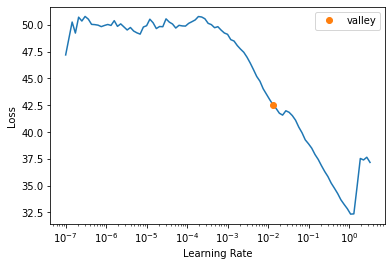

<Figure size 720x720 with 0 Axes>

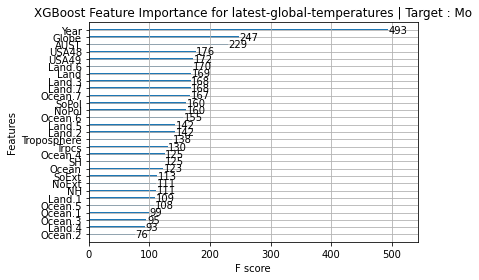

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

  feature  importance
0  Land.1         333
1   Trpcs         164
2  Land.3         230
3   NoExt         121
4      NH         117


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

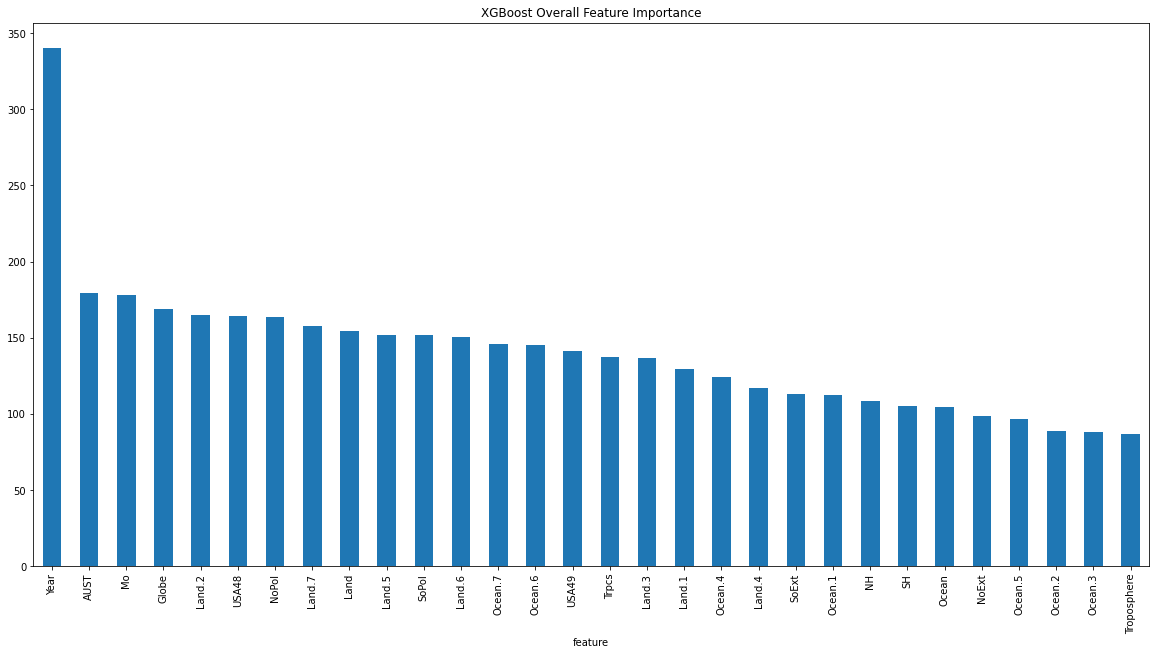

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

Year           0
Mo             0
Globe          0
Land           0
Ocean          0
NH             0
Land.1         0
Ocean.1        0
SH             0
Land.2         0
Ocean.2        0
Trpcs          0
Land.3         0
Ocean.3        0
NoExt          0
Land.4         0
Ocean.4        0
SoExt          0
Land.5         0
Ocean.5        0
NoPol          0
Land.6         0
Ocean.6        0
SoPol          0
Land.7         0
Ocean.7        0
USA48          0
USA49          0
AUST           0
Troposphere    0
dtype: int64

# **To Be Continued...**